In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/root/miniconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

In [5]:
data1 = pd.read_csv("from_dgx/TS_datasets/sml2010/NEW-DATA-1.T15.txt", sep=' ')
data2 = pd.read_csv("from_dgx/TS_datasets/sml2010/NEW-DATA-2.T15.txt", sep=' ')

In [7]:
data = pd.concat([data1, data2], axis=0)
data.reset_index(drop=True, inplace=True)

In [8]:
data.head()

,#,Unnamed: 1,1:Date,2:Time,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,6:CO2_Comedor_Sensor,7:CO2_Habitacion_Sensor,8:Humedad_Comedor_Sensor,...,15:Meteo_Exterior_Sol_Oest,16:Meteo_Exterior_Sol_Est,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro,19:Exterior_Entalpic_1,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week
0,13/03/2012,11:45,18.1875,17.8275,0.0,216.560,221.920,39.9125,42.4150,81.6650,...,95436.8,758.880,0,0,0,18.1150,48.3750,2.0,NaN,NaN
1,13/03/2012,12:00,18.4633,18.1207,6.8,219.947,220.363,39.9267,42.2453,81.7413,...,95436.8,762.069,0,0,0,18.4147,47.8080,2.0,NaN,NaN
2,13/03/2012,12:15,18.7673,18.4367,17.0,219.403,218.933,39.7720,42.2267,81.4240,...,95398.6,766.251,0,0,0,18.8533,47.4320,2.0,NaN,NaN
3,13/03/2012,12:30,19.0727,18.7513,18.0,218.613,217.045,39.7760,42.0987,81.5013,...,95360.3,766.037,0,0,0,19.2907,47.0240,2.0,NaN,NaN
4,13/03/2012,12:45,19.3721,19.0414,20.0,217.714,216.080,39.7757,42.0686,81.4657,...,95354.9,762.743,0,0,0,19.7400,45.4743,2.0,NaN,NaN


In [11]:
cols = ['3:Temperature_Comedor_Sensor',
 '4:Temperature_Habitacion_Sensor',
 '5:Weather_Temperature',
 '6:CO2_Comedor_Sensor',
 '7:CO2_Habitacion_Sensor',
 '8:Humedad_Comedor_Sensor',
 '9:Humedad_Habitacion_Sensor',
 '10:Lighting_Comedor_Sensor',
 '11:Lighting_Habitacion_Sensor',
 '12:Precipitacion',
 '13:Meteo_Exterior_Crepusculo',
 '14:Meteo_Exterior_Viento',
 '15:Meteo_Exterior_Sol_Oest',
 '16:Meteo_Exterior_Sol_Est',
 '17:Meteo_Exterior_Sol_Sud',
 '18:Meteo_Exterior_Piranometro',
 '19:Exterior_Entalpic_1',
 '20:Exterior_Entalpic_2',
 '21:Exterior_Entalpic_turbo',
 '22:Temperature_Exterior_Sensor',
 '23:Humedad_Exterior_Sensor']

In [12]:
target = '3:Temperature_Comedor_Sensor'

In [13]:
for name in data.columns:
    data[name] = data[name].interpolate().fillna(method='bfill').fillna(method='ffill')

In [14]:
from tqdm import tqdm_notebook
from PyEMD import EEMD

In [15]:
eemd = EEMD()

Process ForkPoolWorker-8:
Process ForkPoolWorker-7:
Process ForkPoolWorker-1:
Process ForkPoolWorker-10:
Process ForkPoolWorker-5:
Process ForkPoolWorker-4:
Process ForkPoolWorker-6:
Process ForkPoolWorker-3:
Process ForkPoolWorker-9:
Process ForkPoolWorker-2:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/root/miniconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/root/miniconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/root/miniconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/root/miniconda3/lib/python3.6/multiprocessing/process.py", 

In [16]:
imf = eemd(data[target].values)

In [17]:
imf.shape

(10, 4137)

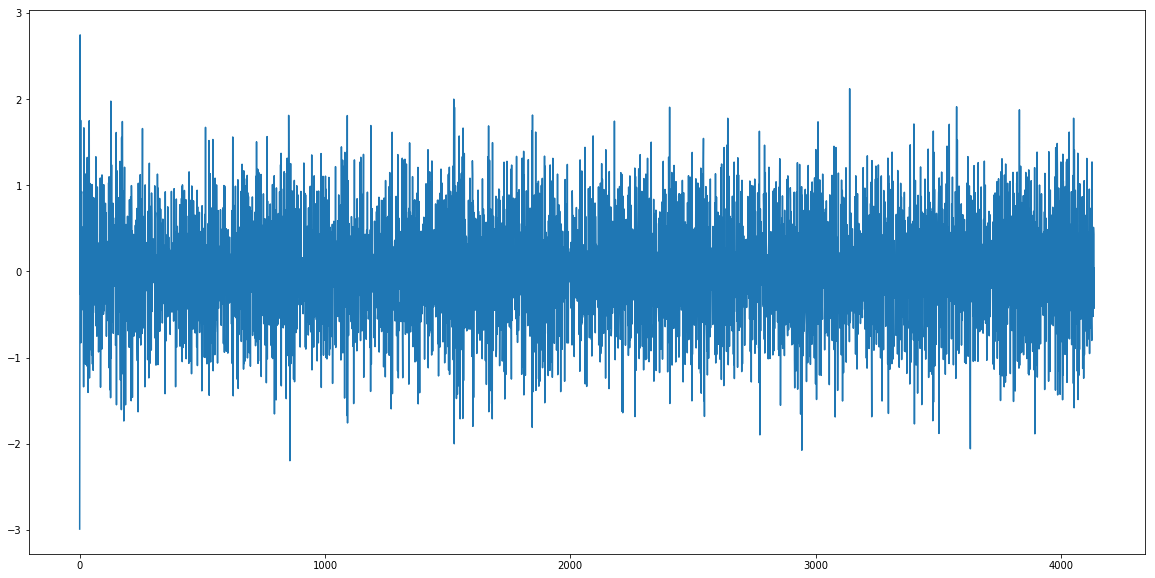

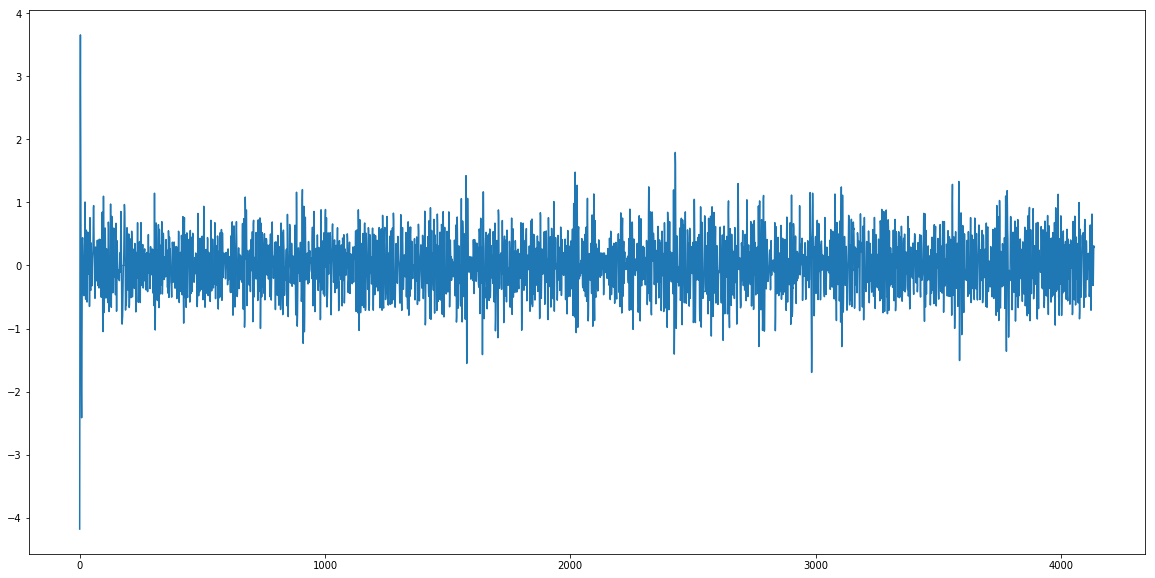

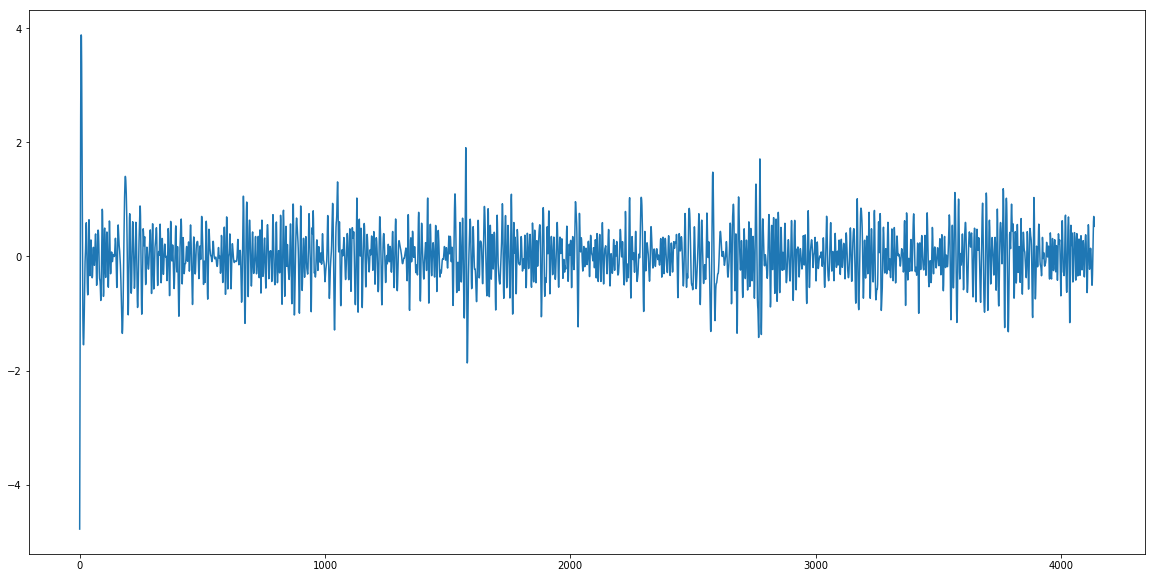

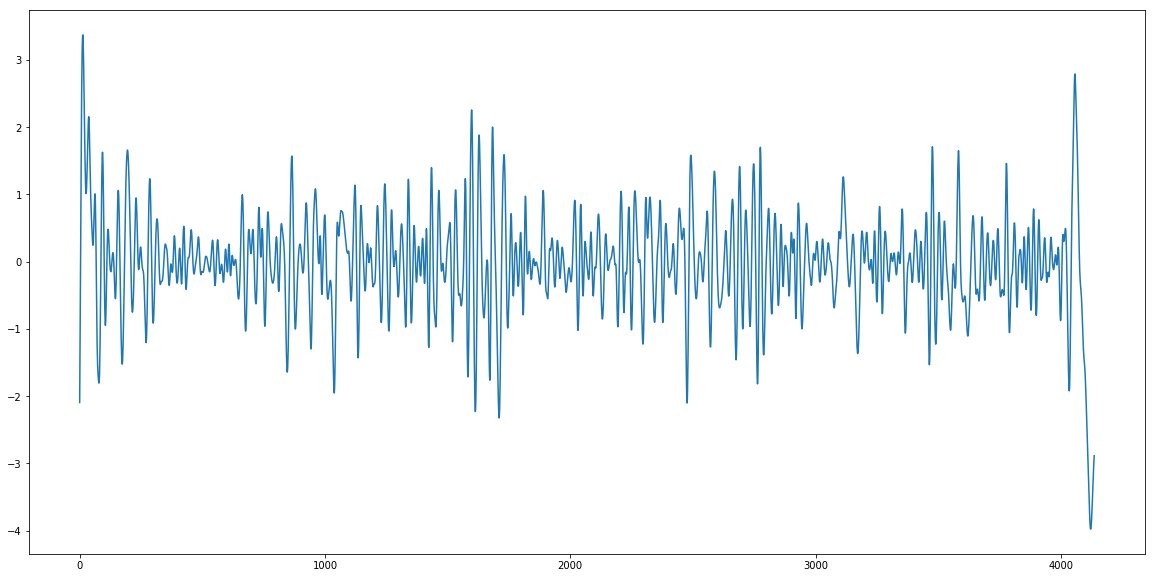

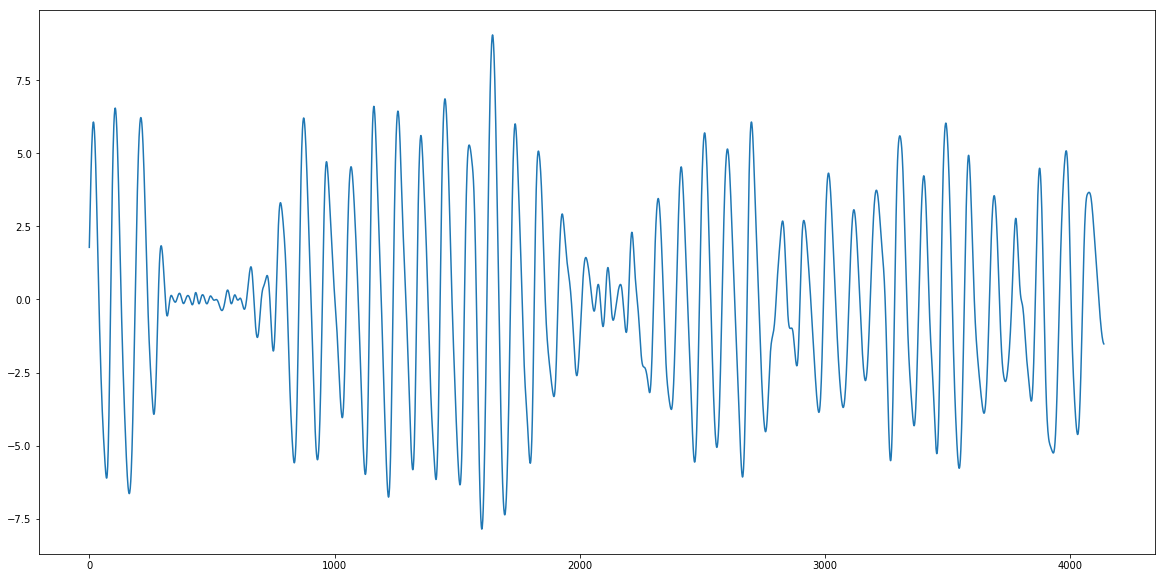

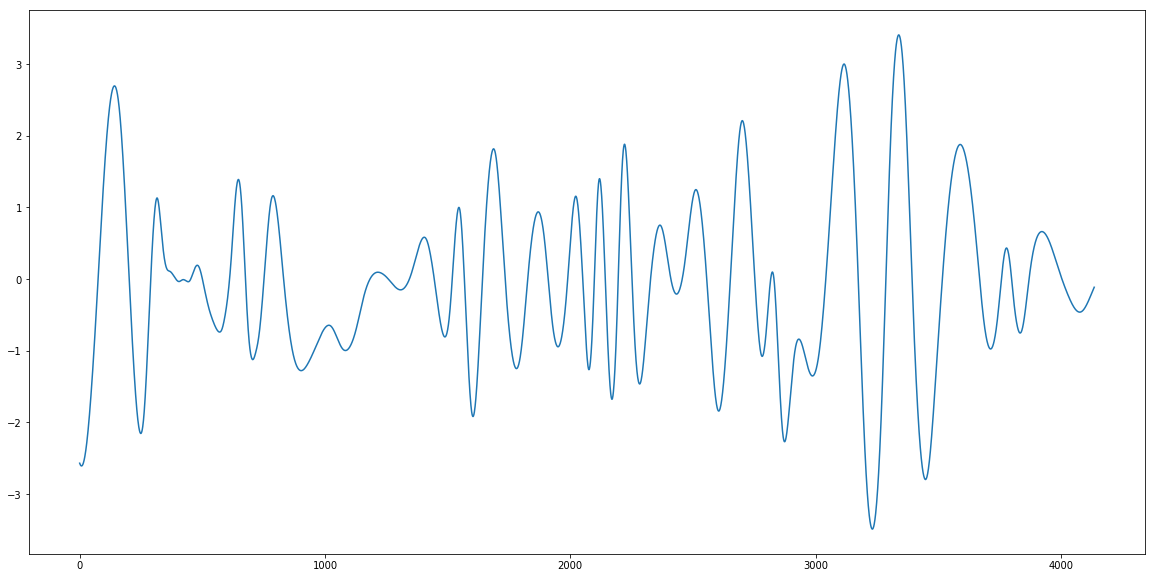

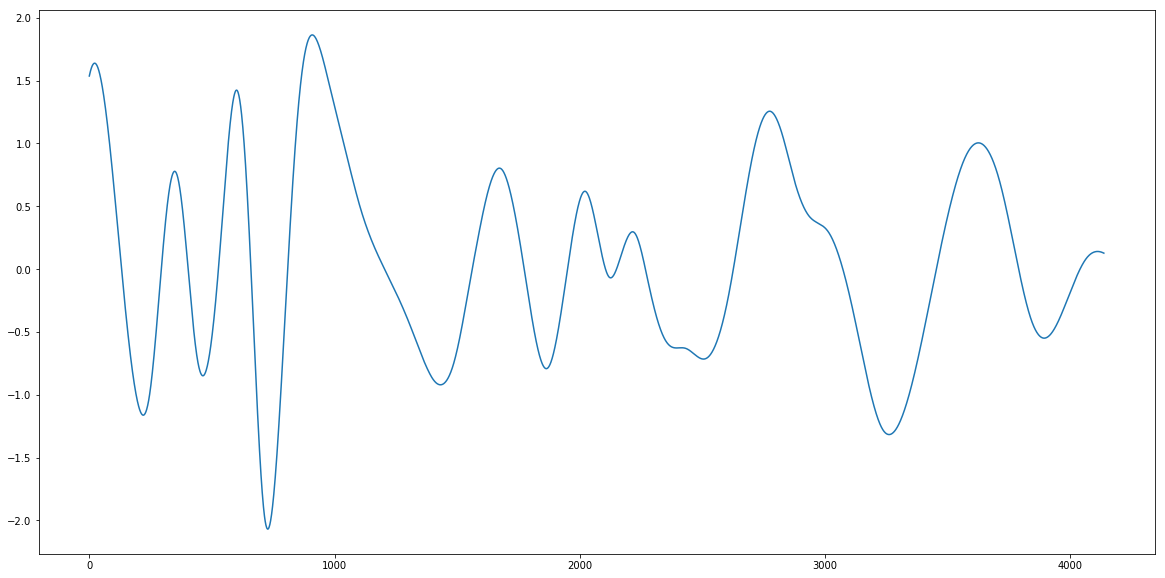

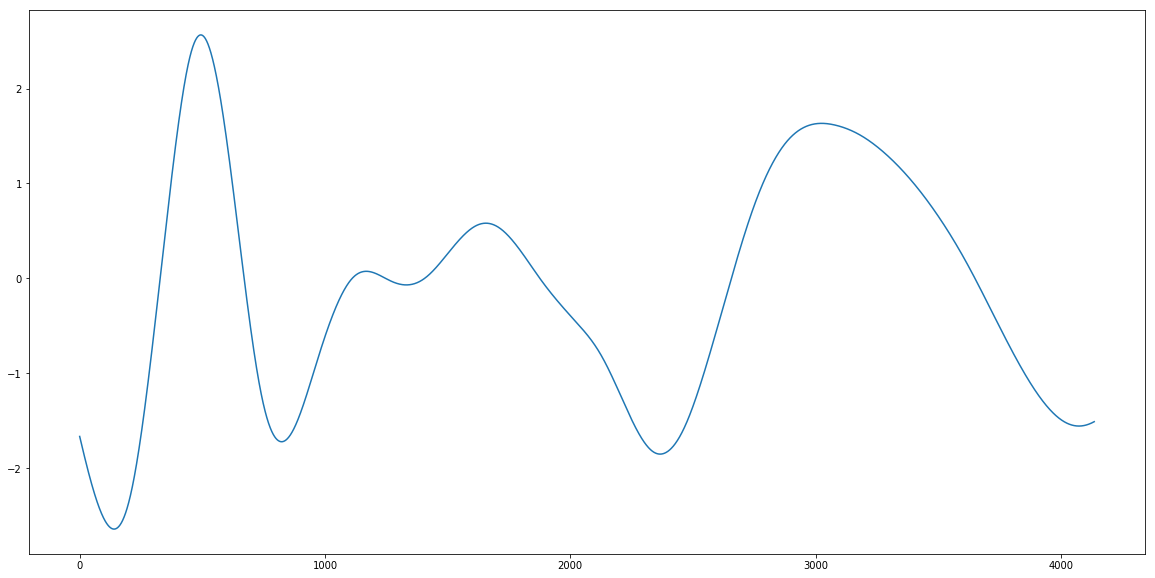

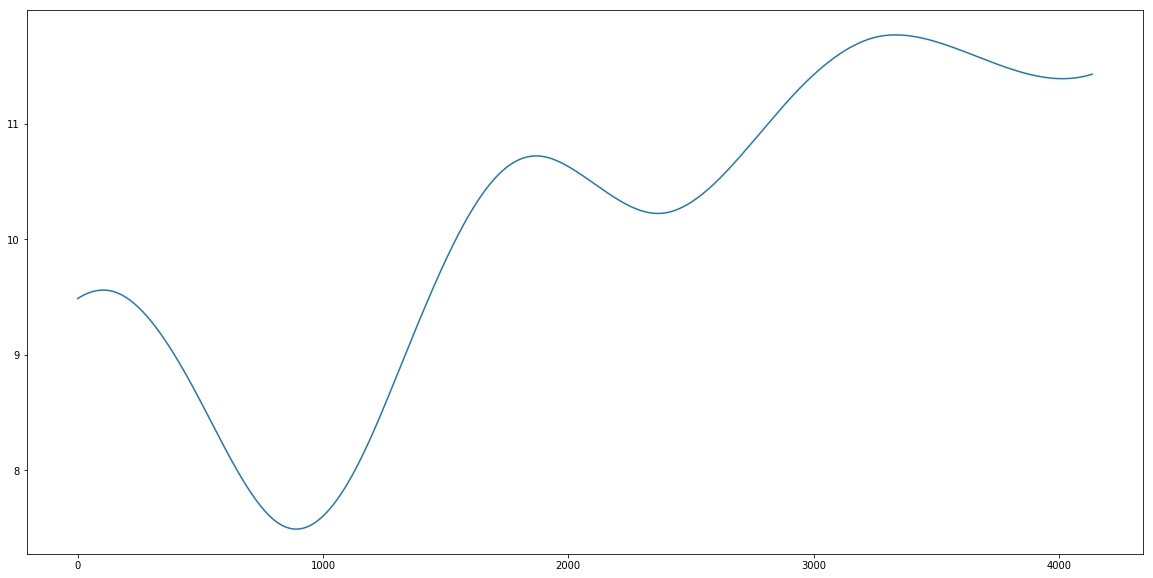

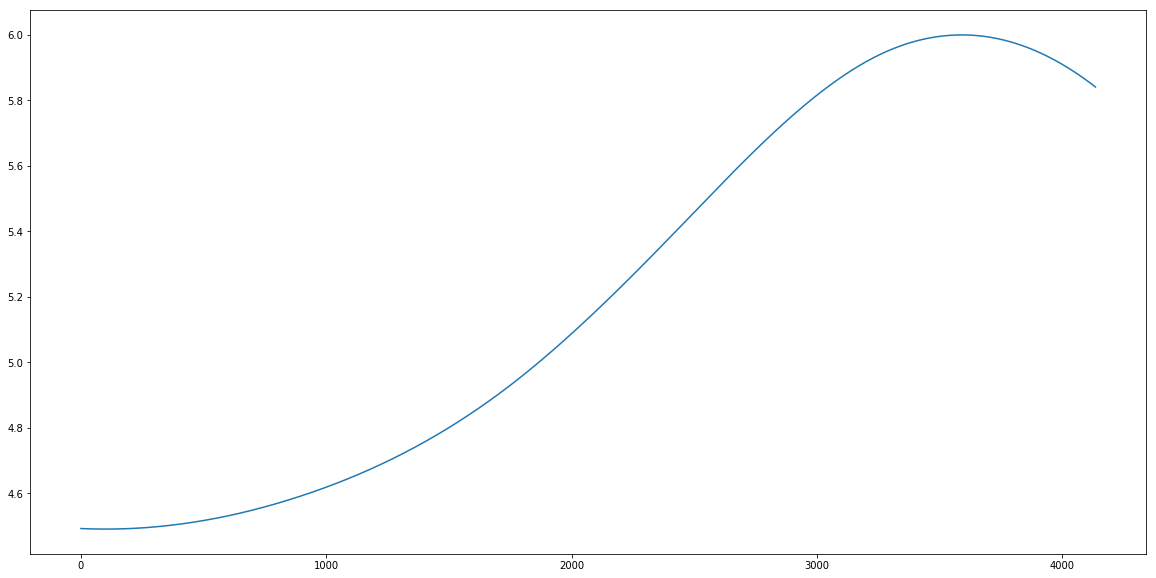

In [18]:
for i in range(10):
    plt.figure(figsize=(20, 10))
    plt.plot(imf[i])
    plt.show()

In [25]:
class SelfBoostedNet(nn.Module):
    def __init__(self, input_dim, aux_outputs, n_conv_channels, conv_kernel_size, n_gru_units):
        super().__init__()
        self.conv1 = nn.Conv1d(input_dim, n_conv_channels, conv_kernel_size)
        self.conv2 = nn.Conv1d(n_conv_channels, n_conv_channels, conv_kernel_size)
        self.conv3 = nn.Conv1d(n_conv_channels, n_conv_channels, conv_kernel_size)
        self.maxpool = nn.MaxPool1d(2, 2)
        self.gru = nn.GRU(n_conv_channels, n_gru_units, num_layers=2, batch_first=True)
        self.aux_output = nn.Linear(n_gru_units, aux_outputs)
        self.main_output = nn.Linear(n_gru_units, 1)
        
    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = torch.relu(self.conv3(x))
        x = self.maxpool(x)
        x = x.permute(0, 2, 1)
        output, h = self.gru(x)
        main_output = self.main_output(h[-1])
        aux_output = self.aux_output(h[-1])
        return main_output.squeeze(1), aux_output

In [37]:
depth = 20
alpha = 0.0001

In [38]:
imf_cols = ['imf_{}'.format(i) for i in range(imf.shape[0])]

In [39]:
for i, name in enumerate(imf_cols):
    data[name] = imf[i]

In [40]:
train_length = 3200
val_length = 400

In [41]:
y = data[target].shift(-1).fillna(method='ffill').values

#### Test with imf features and with multitask learning

In [42]:
res = {}
for i in range(1, imf.shape[0]+1):
    print("Step: ", i)
    X = np.zeros((len(data), depth, len(cols) + len(imf_cols[:i])))
    for j, name in enumerate(cols + imf_cols[:i]):
        for k in range(depth):
            X[:, k, j] = data[name].shift(depth - k - 1).fillna(method='bfill')
    y_aux = data[imf_cols[:i]].shift(-1).fillna(method='ffill').values
    
    X_train = X[:train_length]
    X_val = X[train_length:train_length+val_length]
    X_test = X[-val_length:]
    
    y_train = y[:train_length]
    y_val = y[train_length:train_length+val_length]
    y_test = y[-val_length:]
    
    y_aux_train = y_aux[:train_length]
    y_aux_val = y_aux[train_length:train_length+val_length]
    y_aux_test = y_aux[-val_length:]
    
    X_train_min, X_train_max = X_train.min(axis=0), X_train.max(axis=0)
    X_train = (X_train - X_train_min)/(X_train_max - X_train_min + 1e-9)
    X_val = (X_val - X_train_min)/(X_train_max - X_train_min + 1e-9)
    X_test = (X_test - X_train_min)/(X_train_max - X_train_min + 1e-9)
    
    y_train_min, y_train_max = y_train.min(axis=0), y_train.max(axis=0)
    y_train = (y_train - y_train_min)/(y_train_max - y_train_min + 1e-9)
    y_val = (y_val - y_train_min)/(y_train_max - y_train_min + 1e-9)
    y_test = (y_test - y_train_min)/(y_train_max - y_train_min + 1e-9)
    
    y_aux_train_min, y_aux_train_max = y_aux_train.min(axis=0), y_aux_train.max(axis=0)
    y_aux_train = (y_aux_train - y_aux_train_min)/(y_aux_train_max - y_aux_train_min + 1e-9)
    y_aux_val = (y_aux_val - y_aux_train_min)/(y_aux_train_max - y_aux_train_min + 1e-9)
    y_aux_test = (y_aux_test - y_aux_train_min)/(y_aux_train_max - y_aux_train_min + 1e-9)
    
    X_train_t = torch.Tensor(X_train)
    X_val_t = torch.Tensor(X_val)
    X_test_t = torch.Tensor(X_test)
    
    y_train_t = torch.Tensor(y_train)
    y_val_t = torch.Tensor(y_val)
    y_test_t = torch.Tensor(y_test)
    
    y_aux_train_t = torch.Tensor(y_aux_train)
    y_aux_val_t = torch.Tensor(y_aux_val)
    y_aux_test_t = torch.Tensor(y_aux_test)
    
    train_loader = DataLoader(TensorDataset(X_train_t, y_train_t, y_aux_train_t), shuffle=True, batch_size=64)
    val_loader = DataLoader(TensorDataset(X_val_t, y_val_t, y_aux_val_t), shuffle=False, batch_size=64)
    test_loader = DataLoader(TensorDataset(X_test_t, y_test_t, y_aux_test_t), shuffle=False, batch_size=64)
    
    model = SelfBoostedNet(X_train_t.shape[2], i, 32, 3, 64).cuda()
    opt = torch.optim.Adam(model.parameters(), lr=0.001)
    loss = nn.MSELoss()
    val_loss = 99999
    for e in range(100):
        train_main_loss, train_aux_loss = 0, 0
        for batch_x, batch_y, batch_y_aux in tqdm_notebook(train_loader):
            opt.zero_grad()
            batch_x = batch_x.cuda()
            batch_y = batch_y.cuda()
            batch_y_aux = batch_y_aux.cuda()
            main_output, aux_output = model(batch_x)
            main_loss = loss(main_output, batch_y)
            aux_loss = loss(aux_output, batch_y_aux)
            total_loss = main_loss + alpha*aux_loss
            total_loss.backward()
            opt.step()
            train_main_loss += main_loss.item()*batch_x.shape[0]
            train_aux_loss += aux_loss.item()*batch_x.shape[0]
        with torch.no_grad():
            val_main_loss, val_aux_loss = 0, 0
            for batch_x, batch_y, batch_y_aux in val_loader:
                batch_x = batch_x.cuda()
                batch_y = batch_y.cuda()
                batch_y_aux = batch_y_aux.cuda()
                main_output, aux_output = model(batch_x)
                main_loss = loss(main_output, batch_y)
                aux_loss = loss(aux_output, batch_y_aux)
                val_main_loss += main_loss.item()*batch_x.shape[0]
                val_aux_loss += aux_loss.item()*batch_x.shape[0]
            train_main_loss /= X_train_t.shape[0]
            train_aux_loss /= X_train_t.shape[0]
            val_main_loss /= X_val_t.shape[0]
            val_aux_loss /= X_val_t.shape[0]
            if val_loss > val_main_loss:
                val_loss = val_main_loss
                torch.save(model.state_dict(), 'self_boost_sml.pt')
            
        print("Iter: ", e,
              "train main loss: ", train_main_loss, 
              "train aux loss: ", train_aux_loss, 
              "val main loss: ", val_main_loss,
              "val aux loss: ", val_aux_loss)
        
    model.load_state_dict(torch.load('self_boost_sml.pt'))
    
    with torch.no_grad():
        val_main_loss, val_aux_loss = 0, 0
        for batch_x, batch_y, batch_y_aux in val_loader:
            batch_x = batch_x.cuda()
            batch_y = batch_y.cuda()
            batch_y_aux = batch_y_aux.cuda()
            main_output, aux_output = model(batch_x)
            main_loss = loss(main_output, batch_y)
            aux_loss = loss(aux_output, batch_y_aux)
            val_main_loss += main_loss.item()*batch_x.shape[0]
            val_aux_loss += aux_loss.item()*batch_x.shape[0]

        test_main_loss, test_aux_loss = 0, 0
        for batch_x, batch_y, batch_y_aux in test_loader:
            batch_x = batch_x.cuda()
            batch_y = batch_y.cuda()
            batch_y_aux = batch_y_aux.cuda()
            main_output, aux_output = model(batch_x)
            main_loss = loss(main_output, batch_y)
            aux_loss = loss(aux_output, batch_y_aux)
            test_main_loss += main_loss.item()*batch_x.shape[0]
            test_aux_loss += aux_loss.item()*batch_x.shape[0]
    
    res[i] = (val_main_loss/len(X_val_t), val_aux_loss/len(X_val_t), test_main_loss/len(X_test_t),
              test_aux_loss/len(X_test_t))

Step:  1



Iter:  0 train main loss:  0.05234468080103397 train aux loss:  0.09268527954816819 val main loss:  0.07098933815956116 val aux loss:  0.03677998051047325



Iter:  1 train main loss:  0.038943016156554225 train aux loss:  0.02327510677278042 val main loss:  0.06463610231876374 val aux loss:  0.020097761750221252



Iter:  2 train main loss:  0.03901872780174017 train aux loss:  0.018940608594566585 val main loss:  0.06374159872531891 val aux loss:  0.02006131123751402



Iter:  3 train main loss:  0.03900796849280596 train aux loss:  0.018954495787620543 val main loss:  0.07191411375999451 val aux loss:  0.02011429127305746



Iter:  4 train main loss:  0.039029063880443575 train aux loss:  0.01901208993047476 val main loss:  0.07615776658058167 val aux loss:  0.02020923964679241



Iter:  5 train main loss:  0.03928288612514734 train aux loss:  0.018997849225997926 val main loss:  0.06516071528196335 val aux loss:  0.020033331364393236



Iter:  6 train main loss:  0.03905423052608967 train aux loss:  0.01899082414805889 val main loss:  0.07161763072013855 val aux loss:  0.020084802955389024



Iter:  7 train main loss:  0.03895578760653734 train aux loss:  0.018922726400196554 val main loss:  0.06636119976639748 val aux loss:  0.02003006048500538



Iter:  8 train main loss:  0.03888928558677435 train aux loss:  0.0189716287702322 val main loss:  0.058389117419719694 val aux loss:  0.020181012749671937



Iter:  9 train main loss:  0.038912833593785764 train aux loss:  0.019030712116509675 val main loss:  0.07048636823892593 val aux loss:  0.02006517492234707



Iter:  10 train main loss:  0.03911632556468248 train aux loss:  0.019124442934989928 val main loss:  0.057171665132045746 val aux loss:  0.02022607609629631



Iter:  11 train main loss:  0.039338809475302695 train aux loss:  0.01919436203315854 val main loss:  0.07044887244701385 val aux loss:  0.020191663317382334



Iter:  12 train main loss:  0.038992266058921816 train aux loss:  0.018983964733779432 val main loss:  0.06262659072875977 val aux loss:  0.020065673403441908



Iter:  13 train main loss:  0.03900411866605282 train aux loss:  0.018975076247006655 val main loss:  0.06791247010231018 val aux loss:  0.02003028966486454



Iter:  14 train main loss:  0.03893836822360754 train aux loss:  0.018940418474376202 val main loss:  0.06934081822633743 val aux loss:  0.02005141168832779



Iter:  15 train main loss:  0.03896845825016498 train aux loss:  0.01904010696336627 val main loss:  0.06576324805617333 val aux loss:  0.020031300634145738



Iter:  16 train main loss:  0.03934141043573618 train aux loss:  0.019096135534346102 val main loss:  0.06605619519948959 val aux loss:  0.02005637254565954



Iter:  17 train main loss:  0.03889561098068953 train aux loss:  0.018943086117506027 val main loss:  0.06048826903104782 val aux loss:  0.02013960003852844



Iter:  18 train main loss:  0.038950375020504 train aux loss:  0.018981647454202177 val main loss:  0.07119547128677368 val aux loss:  0.020055292323231697



Iter:  19 train main loss:  0.03892492659389973 train aux loss:  0.018993820045143366 val main loss:  0.06643730714917183 val aux loss:  0.02004352904856205



Iter:  20 train main loss:  0.038987989500164986 train aux loss:  0.019060538094490768 val main loss:  0.06317354336380959 val aux loss:  0.020045975372195244



Iter:  21 train main loss:  0.03933526050299406 train aux loss:  0.01935150761157274 val main loss:  0.06587742954492569 val aux loss:  0.020036017298698427



Iter:  22 train main loss:  0.039012090899050236 train aux loss:  0.019071130398660898 val main loss:  0.06857712298631669 val aux loss:  0.020062095932662487



Iter:  23 train main loss:  0.03890424612909556 train aux loss:  0.018930737134069203 val main loss:  0.06714258283376694 val aux loss:  0.02003328822553158



Iter:  24 train main loss:  0.03889422941952944 train aux loss:  0.01899923538789153 val main loss:  0.07318542599678039 val aux loss:  0.020233566388487816



Iter:  25 train main loss:  0.03912386108189821 train aux loss:  0.018933223132044076 val main loss:  0.06891982153058052 val aux loss:  0.020037074759602546



Iter:  26 train main loss:  0.03949632469564676 train aux loss:  0.019088206104934214 val main loss:  0.07323501706123352 val aux loss:  0.020189126059412955



Iter:  27 train main loss:  0.039076949805021285 train aux loss:  0.0191054261662066 val main loss:  0.07791109383106232 val aux loss:  0.02032341290265322



Iter:  28 train main loss:  0.039004352912306785 train aux loss:  0.0190832095220685 val main loss:  0.07150217711925506 val aux loss:  0.02018213279545307



Iter:  29 train main loss:  0.03897635620087385 train aux loss:  0.018950260281562804 val main loss:  0.06790897250175476 val aux loss:  0.020033182725310326



Iter:  30 train main loss:  0.03889380507171154 train aux loss:  0.018990929629653694 val main loss:  0.07109205603599549 val aux loss:  0.02004642017185688



Iter:  31 train main loss:  0.03906624063849449 train aux loss:  0.019117177631706 val main loss:  0.06435019135475159 val aux loss:  0.020083691775798797



Iter:  32 train main loss:  0.03899793453514576 train aux loss:  0.019051740411669016 val main loss:  0.07031293869018555 val aux loss:  0.020145669505000116



Iter:  33 train main loss:  0.0388588273525238 train aux loss:  0.01894983299076557 val main loss:  0.07145781815052032 val aux loss:  0.020090203247964383



Iter:  34 train main loss:  0.038997728638350965 train aux loss:  0.01915100706741214 val main loss:  0.07603656172752381 val aux loss:  0.02082163866609335



Iter:  35 train main loss:  0.0390924146771431 train aux loss:  0.01906245544552803 val main loss:  0.06780885994434356 val aux loss:  0.02002990372478962



Iter:  36 train main loss:  0.03888946421444416 train aux loss:  0.019138713739812373 val main loss:  0.06686625361442566 val aux loss:  0.020036125928163527



Iter:  37 train main loss:  0.038845329247415065 train aux loss:  0.018961255680769683 val main loss:  0.07351263463497162 val aux loss:  0.020323116220533847



Iter:  38 train main loss:  0.038941533416509626 train aux loss:  0.019014947190880774 val main loss:  0.06441602990031242 val aux loss:  0.020068569108843803



Iter:  39 train main loss:  0.03903871439397335 train aux loss:  0.01918654976412654 val main loss:  0.06528483629226685 val aux loss:  0.020056563466787337



Iter:  40 train main loss:  0.03896096281707287 train aux loss:  0.01907470703125 val main loss:  0.06289809554815293 val aux loss:  0.020064770132303237



Iter:  41 train main loss:  0.03899435494095087 train aux loss:  0.019183709528297187 val main loss:  0.06691210553050041 val aux loss:  0.020036954805254935



Iter:  42 train main loss:  0.03887739859521389 train aux loss:  0.0190171667188406 val main loss:  0.06829169362783433 val aux loss:  0.020091105811297895



Iter:  43 train main loss:  0.03904388416558504 train aux loss:  0.019021640699356794 val main loss:  0.06603008940815926 val aux loss:  0.020166226141154767



Iter:  44 train main loss:  0.03887865349650383 train aux loss:  0.01901396259665489 val main loss:  0.06085968941450119 val aux loss:  0.020357177443802357



Iter:  45 train main loss:  0.038963681608438494 train aux loss:  0.01907889246940613 val main loss:  0.07464299708604813 val aux loss:  0.02025839302688837



Iter:  46 train main loss:  0.03896319139748812 train aux loss:  0.019061949830502273 val main loss:  0.0739385998249054 val aux loss:  0.02015653867274523



Iter:  47 train main loss:  0.03901281289756298 train aux loss:  0.019033880922943353 val main loss:  0.07057253777980804 val aux loss:  0.02012222871184349



Iter:  48 train main loss:  0.038990439735352996 train aux loss:  0.01909896209836006 val main loss:  0.06693428978323937 val aux loss:  0.020212157666683196



Iter:  49 train main loss:  0.0388914592564106 train aux loss:  0.01899003326892853 val main loss:  0.06668488696217537 val aux loss:  0.020076714009046554



Iter:  50 train main loss:  0.03911984536796808 train aux loss:  0.018964725509285928 val main loss:  0.07507527709007263 val aux loss:  0.02035948697477579



Iter:  51 train main loss:  0.03909640930593014 train aux loss:  0.01897993514314294 val main loss:  0.06812211453914642 val aux loss:  0.020033054165542127



Iter:  52 train main loss:  0.03891711860895157 train aux loss:  0.018996042758226396 val main loss:  0.07343589246273041 val aux loss:  0.020030254907906057



Iter:  53 train main loss:  0.03894110109657049 train aux loss:  0.01921716295182705 val main loss:  0.06991860657930374 val aux loss:  0.02006271168589592



Iter:  54 train main loss:  0.03886766918003559 train aux loss:  0.019117318633943794 val main loss:  0.07207237392663955 val aux loss:  0.02043703731149435



Iter:  55 train main loss:  0.03886928990483284 train aux loss:  0.019022309947758914 val main loss:  0.06582781195640564 val aux loss:  0.020047698244452475



Iter:  56 train main loss:  0.03894113279879093 train aux loss:  0.018990143928676845 val main loss:  0.07106886804103851 val aux loss:  0.020122912973165513



Iter:  57 train main loss:  0.039060768596827986 train aux loss:  0.019294987209141256 val main loss:  0.06597595408558846 val aux loss:  0.02014627605676651



Iter:  58 train main loss:  0.03893178831785917 train aux loss:  0.019359325151890518 val main loss:  0.06664298176765442 val aux loss:  0.020045604407787323



Iter:  59 train main loss:  0.03899378538131714 train aux loss:  0.018974960427731277 val main loss:  0.07176465064287185 val aux loss:  0.020305869430303575



Iter:  60 train main loss:  0.03890072587877512 train aux loss:  0.019032536633312704 val main loss:  0.06973261952400207 val aux loss:  0.0200348786264658



Iter:  61 train main loss:  0.038890155367553234 train aux loss:  0.018981479033827783 val main loss:  0.06982231229543685 val aux loss:  0.020029994547367095



Iter:  62 train main loss:  0.03889720898121595 train aux loss:  0.019058679416775703 val main loss:  0.07218526571989059 val aux loss:  0.020039866492152215



Iter:  63 train main loss:  0.03895080581307411 train aux loss:  0.019032160025089978 val main loss:  0.0690170669555664 val aux loss:  0.020039304345846175



Iter:  64 train main loss:  0.03908729925751686 train aux loss:  0.019059315584599973 val main loss:  0.07605410069227218 val aux loss:  0.020156854763627052



Iter:  65 train main loss:  0.03889859672635794 train aux loss:  0.01926956472918391 val main loss:  0.07087727189064026 val aux loss:  0.020081790685653685



Iter:  66 train main loss:  0.03883339334279299 train aux loss:  0.019266670625656842 val main loss:  0.06680509209632873 val aux loss:  0.020368212535977363



Iter:  67 train main loss:  0.03894082561135292 train aux loss:  0.01901788791641593 val main loss:  0.07580712348222733 val aux loss:  0.020429475605487822



Iter:  68 train main loss:  0.03889332056045532 train aux loss:  0.019123817421495916 val main loss:  0.06481775432825089 val aux loss:  0.0201206873357296



Iter:  69 train main loss:  0.03910427927970886 train aux loss:  0.019152078721672298 val main loss:  0.0687674856185913 val aux loss:  0.020043172985315324



Iter:  70 train main loss:  0.03885544870048761 train aux loss:  0.018957467675209047 val main loss:  0.06759349346160888 val aux loss:  0.02007600724697113



Iter:  71 train main loss:  0.03886915147304535 train aux loss:  0.019097733274102212 val main loss:  0.06643450677394867 val aux loss:  0.020296998396515845



Iter:  72 train main loss:  0.03884662631899118 train aux loss:  0.019008110910654068 val main loss:  0.06409969866275787 val aux loss:  0.02054604236036539



Iter:  73 train main loss:  0.03892531223595142 train aux loss:  0.019261822309345006 val main loss:  0.06632588416337967 val aux loss:  0.020029932372272016



Iter:  74 train main loss:  0.038898548372089864 train aux loss:  0.018991736862808466 val main loss:  0.07023101985454559 val aux loss:  0.02003021605312824



Iter:  75 train main loss:  0.03895875781774521 train aux loss:  0.019046703688800334 val main loss:  0.07384551525115966 val aux loss:  0.02056893300265074



Iter:  76 train main loss:  0.03918268155306578 train aux loss:  0.019077007453888656 val main loss:  0.07337396174669265 val aux loss:  0.020247931107878685



Iter:  77 train main loss:  0.03900004405528307 train aux loss:  0.019004879444837572 val main loss:  0.0713257822394371 val aux loss:  0.020070385932922364



Iter:  78 train main loss:  0.0388586226478219 train aux loss:  0.01895687209442258 val main loss:  0.07000651657581329 val aux loss:  0.020154337733983993



Iter:  79 train main loss:  0.03888689804822207 train aux loss:  0.018979086857289076 val main loss:  0.07326680839061737 val aux loss:  0.020593079291284084



Iter:  80 train main loss:  0.038914702907204626 train aux loss:  0.019107236210256815 val main loss:  0.07294153988361358 val aux loss:  0.020045352652668953



Iter:  81 train main loss:  0.039037768319249155 train aux loss:  0.019095815774053334 val main loss:  0.06618807017803192 val aux loss:  0.020097605884075165



Iter:  82 train main loss:  0.03885453935712576 train aux loss:  0.019022686779499053 val main loss:  0.061419448107481005 val aux loss:  0.020076460652053357



Iter:  83 train main loss:  0.03900147050619125 train aux loss:  0.019174535535275938 val main loss:  0.06970379710197448 val aux loss:  0.02004042260348797



Iter:  84 train main loss:  0.03883781477808952 train aux loss:  0.018917923383414744 val main loss:  0.07243731677532196 val aux loss:  0.020313788391649722



Iter:  85 train main loss:  0.03887955542653799 train aux loss:  0.019122693035751582 val main loss:  0.06967659682035446 val aux loss:  0.02029449164867401



Iter:  86 train main loss:  0.03886305220425129 train aux loss:  0.019036049041897058 val main loss:  0.07212078958749771 val aux loss:  0.020034669637680053



Iter:  87 train main loss:  0.03891308188438416 train aux loss:  0.01891813490539789 val main loss:  0.06230956926941872 val aux loss:  0.020178639739751817



Iter:  88 train main loss:  0.03890591062605381 train aux loss:  0.018985014148056506 val main loss:  0.07139351248741149 val aux loss:  0.02006377749145031



Iter:  89 train main loss:  0.03892868407070637 train aux loss:  0.018983080685138702 val main loss:  0.06586021482944489 val aux loss:  0.02003116324543953



Iter:  90 train main loss:  0.038905226327478885 train aux loss:  0.019098721574991942 val main loss:  0.07112575769424438 val aux loss:  0.020452248975634576



Iter:  91 train main loss:  0.03895702879875898 train aux loss:  0.01905803268775344 val main loss:  0.06939848750829697 val aux loss:  0.020069928355515004



Iter:  92 train main loss:  0.03901662316173315 train aux loss:  0.01899943230673671 val main loss:  0.06966935247182846 val aux loss:  0.0200416050106287



Iter:  93 train main loss:  0.03894948672503233 train aux loss:  0.018962263483554124 val main loss:  0.06653711840510368 val aux loss:  0.020045855455100535



Iter:  94 train main loss:  0.03892523810267448 train aux loss:  0.018992036264389753 val main loss:  0.07159260094165802 val aux loss:  0.020389023013412954



Iter:  95 train main loss:  0.03898870471864939 train aux loss:  0.019129916578531265 val main loss:  0.06477975472807884 val aux loss:  0.020121888294816016



Iter:  96 train main loss:  0.03895023934543133 train aux loss:  0.018970436956733464 val main loss:  0.06510944649577141 val aux loss:  0.02010138750076294



Iter:  97 train main loss:  0.038910880759358404 train aux loss:  0.019111988544464113 val main loss:  0.07379907846450806 val aux loss:  0.020378167182207106



Iter:  98 train main loss:  0.039147724322974684 train aux loss:  0.01918059779331088 val main loss:  0.07173886597156524 val aux loss:  0.02003519669175148



Iter:  99 train main loss:  0.03896868839859963 train aux loss:  0.019141817465424538 val main loss:  0.06320656806230546 val aux loss:  0.02045118197798729
Step:  2



Iter:  0 train main loss:  0.04803673207759857 train aux loss:  0.13059223651885987 val main loss:  0.06757095843553543 val aux loss:  0.05029956221580505



Iter:  1 train main loss:  0.03894267916679382 train aux loss:  0.02572067555040121 val main loss:  0.06925823837518692 val aux loss:  0.014589235782623292



Iter:  2 train main loss:  0.038955153338611125 train aux loss:  0.012710387036204338 val main loss:  0.07035479873418808 val aux loss:  0.012508242838084698



Iter:  3 train main loss:  0.03908140201121569 train aux loss:  0.012171838153153657 val main loss:  0.07044007062911987 val aux loss:  0.01242472492158413



Iter:  4 train main loss:  0.03907944716513157 train aux loss:  0.012086280267685651 val main loss:  0.07086445957422256 val aux loss:  0.012442148923873901



Iter:  5 train main loss:  0.03887875389307737 train aux loss:  0.012118656858801842 val main loss:  0.06415452539920807 val aux loss:  0.012415636219084264



Iter:  6 train main loss:  0.03927498210221529 train aux loss:  0.01219456372782588 val main loss:  0.07432114839553833 val aux loss:  0.01264385312795639



Iter:  7 train main loss:  0.03909542866051197 train aux loss:  0.012097524236887694 val main loss:  0.06854746103286743 val aux loss:  0.01238620474934578



Iter:  8 train main loss:  0.039107051119208334 train aux loss:  0.01220209002494812 val main loss:  0.06804254308342933 val aux loss:  0.012391164898872375



Iter:  9 train main loss:  0.03886629913002253 train aux loss:  0.012060453128069639 val main loss:  0.0741622880101204 val aux loss:  0.012507302984595299



Iter:  10 train main loss:  0.038953462094068525 train aux loss:  0.01209061037749052 val main loss:  0.06823181748390197 val aux loss:  0.012382705360651017



Iter:  11 train main loss:  0.03905705370008945 train aux loss:  0.012269194591790438 val main loss:  0.06864762842655182 val aux loss:  0.01239063672721386



Iter:  12 train main loss:  0.038948311358690264 train aux loss:  0.012134196329861879 val main loss:  0.06686246335506439 val aux loss:  0.012379643693566322



Iter:  13 train main loss:  0.03929282013326883 train aux loss:  0.012294924845919012 val main loss:  0.07166681408882142 val aux loss:  0.012505519650876522



Iter:  14 train main loss:  0.03894606452435255 train aux loss:  0.012070032022893428 val main loss:  0.07267205268144608 val aux loss:  0.01246538057923317



Iter:  15 train main loss:  0.03910100944340229 train aux loss:  0.012319499719887972 val main loss:  0.05884062439203262 val aux loss:  0.012626554779708386



Iter:  16 train main loss:  0.038983960933983326 train aux loss:  0.012187076658010483 val main loss:  0.06137607991695404 val aux loss:  0.012556294612586498



Iter:  17 train main loss:  0.03896466135978699 train aux loss:  0.012095822654664516 val main loss:  0.07143814533948899 val aux loss:  0.01242336206138134



Iter:  18 train main loss:  0.03897775549441576 train aux loss:  0.012091756351292133 val main loss:  0.06433921739459038 val aux loss:  0.01243101418018341



Iter:  19 train main loss:  0.039073945358395576 train aux loss:  0.01215904138982296 val main loss:  0.06821991637349129 val aux loss:  0.012390285953879357



Iter:  20 train main loss:  0.038969127535820006 train aux loss:  0.012091724965721369 val main loss:  0.06524524241685867 val aux loss:  0.012407183200120925



Iter:  21 train main loss:  0.03890968140214682 train aux loss:  0.012093033492565155 val main loss:  0.06685368523001671 val aux loss:  0.012387172430753707



Iter:  22 train main loss:  0.03901523176580667 train aux loss:  0.012072269096970558 val main loss:  0.0707167774438858 val aux loss:  0.012397848293185234



Iter:  23 train main loss:  0.03890280351042748 train aux loss:  0.012096148114651442 val main loss:  0.06636830538511276 val aux loss:  0.012378874197602273



Iter:  24 train main loss:  0.038916067034006116 train aux loss:  0.012155405823141336 val main loss:  0.06798258811235428 val aux loss:  0.012390060424804688



Iter:  25 train main loss:  0.03890345755964517 train aux loss:  0.012045121677219868 val main loss:  0.06734331876039505 val aux loss:  0.01238642267882824



Iter:  26 train main loss:  0.03906117107719183 train aux loss:  0.012226671408861876 val main loss:  0.06997836291790009 val aux loss:  0.012465503215789795



Iter:  27 train main loss:  0.039058032557368276 train aux loss:  0.01209496397525072 val main loss:  0.07112205147743225 val aux loss:  0.012402443550527095



Iter:  28 train main loss:  0.03877028971910477 train aux loss:  0.012155304830521345 val main loss:  0.07128057509660721 val aux loss:  0.012379123009741306



Iter:  29 train main loss:  0.03889702718704939 train aux loss:  0.012086075954139233 val main loss:  0.0629696136713028 val aux loss:  0.012475809901952744



Iter:  30 train main loss:  0.039056273624300954 train aux loss:  0.012287158444523811 val main loss:  0.06546905860304833 val aux loss:  0.01245367679744959



Iter:  31 train main loss:  0.03897087775170803 train aux loss:  0.012083855457603931 val main loss:  0.06663038223981857 val aux loss:  0.01240800466388464



Iter:  32 train main loss:  0.03896148324012756 train aux loss:  0.012169215697795152 val main loss:  0.06268378973007202 val aux loss:  0.012629931420087814



Iter:  33 train main loss:  0.039149595089256764 train aux loss:  0.012230554614216089 val main loss:  0.07736065119504928 val aux loss:  0.012686562687158585



Iter:  34 train main loss:  0.03926917888224125 train aux loss:  0.012387763410806656 val main loss:  0.07194766879081727 val aux loss:  0.01239831130951643



Iter:  35 train main loss:  0.039042226672172546 train aux loss:  0.012064722664654255 val main loss:  0.06962799191474915 val aux loss:  0.012411003820598126



Iter:  36 train main loss:  0.038865071684122086 train aux loss:  0.012072103656828403 val main loss:  0.0664462111890316 val aux loss:  0.012385555692017079



Iter:  37 train main loss:  0.03896877128630877 train aux loss:  0.012142368014901877 val main loss:  0.0642933675646782 val aux loss:  0.01254274807870388



Iter:  38 train main loss:  0.038838744647800925 train aux loss:  0.01222688464447856 val main loss:  0.06535210222005844 val aux loss:  0.012391986548900604



Iter:  39 train main loss:  0.038913170024752614 train aux loss:  0.012116128914058208 val main loss:  0.07906806945800782 val aux loss:  0.012586187049746513



Iter:  40 train main loss:  0.03905512187629938 train aux loss:  0.012305446844547986 val main loss:  0.07153181672096252 val aux loss:  0.012504281625151634



Iter:  41 train main loss:  0.03920634645968676 train aux loss:  0.01231231227517128 val main loss:  0.06857923477888107 val aux loss:  0.01243267834186554



Iter:  42 train main loss:  0.03884945165365934 train aux loss:  0.012211829349398613 val main loss:  0.06381862938404083 val aux loss:  0.012392106167972088



Iter:  43 train main loss:  0.038936685733497144 train aux loss:  0.012212516665458679 val main loss:  0.07301936775445939 val aux loss:  0.0125217205286026



Iter:  44 train main loss:  0.03893584482371807 train aux loss:  0.012092781104147434 val main loss:  0.0679811504483223 val aux loss:  0.012409807369112968



Iter:  45 train main loss:  0.039009357988834384 train aux loss:  0.012241592649370431 val main loss:  0.061943662762641905 val aux loss:  0.012755281627178192



Iter:  46 train main loss:  0.03889781456440687 train aux loss:  0.012112253047525882 val main loss:  0.06796522051095963 val aux loss:  0.012414827756583691



Iter:  47 train main loss:  0.03888577602803707 train aux loss:  0.012195848282426596 val main loss:  0.06825552031397819 val aux loss:  0.012516711056232453



Iter:  48 train main loss:  0.0390204956009984 train aux loss:  0.012226531580090523 val main loss:  0.07284002244472504 val aux loss:  0.012394539080560207



Iter:  49 train main loss:  0.03901571974158287 train aux loss:  0.012337775975465775 val main loss:  0.06714866787195206 val aux loss:  0.012413830645382404



Iter:  50 train main loss:  0.03887662976980209 train aux loss:  0.012125502191483974 val main loss:  0.06549287497997285 val aux loss:  0.012386422157287597



Iter:  51 train main loss:  0.03890881951898337 train aux loss:  0.012149727903306484 val main loss:  0.0608227875828743 val aux loss:  0.012542489878833295



Iter:  52 train main loss:  0.038964997082948684 train aux loss:  0.01213763516396284 val main loss:  0.06598798215389251 val aux loss:  0.012393184006214142



Iter:  53 train main loss:  0.03891756825149059 train aux loss:  0.012235855571925641 val main loss:  0.06063999265432358 val aux loss:  0.012485261037945748



Iter:  54 train main loss:  0.03891836710274219 train aux loss:  0.01219091372564435 val main loss:  0.07141614705324173 val aux loss:  0.012397262230515481



Iter:  55 train main loss:  0.03895263884216547 train aux loss:  0.012097390871495008 val main loss:  0.060652969181537626 val aux loss:  0.01259711004793644



Iter:  56 train main loss:  0.038883531726896764 train aux loss:  0.012133883889764547 val main loss:  0.07340051859617233 val aux loss:  0.012453740611672402



Iter:  57 train main loss:  0.03906390529125929 train aux loss:  0.012171982638537884 val main loss:  0.070993372797966 val aux loss:  0.012380942404270172



Iter:  58 train main loss:  0.03885601781308651 train aux loss:  0.01209237977862358 val main loss:  0.06854279175400733 val aux loss:  0.0124746223539114



Iter:  59 train main loss:  0.03893991246819496 train aux loss:  0.012143179122358561 val main loss:  0.06557590037584304 val aux loss:  0.012488128319382667



Iter:  60 train main loss:  0.03886733707040548 train aux loss:  0.012123875003308058 val main loss:  0.07197434157133102 val aux loss:  0.01246264047920704



Iter:  61 train main loss:  0.038934048488736155 train aux loss:  0.012085307575762271 val main loss:  0.07011336296796798 val aux loss:  0.012379214093089104



Iter:  62 train main loss:  0.03892090380191803 train aux loss:  0.012109336741268635 val main loss:  0.07302943885326385 val aux loss:  0.012435968592762947



Iter:  63 train main loss:  0.038881692923605445 train aux loss:  0.012111486475914717 val main loss:  0.07594888269901276 val aux loss:  0.012530858255922794



Iter:  64 train main loss:  0.03890238981693983 train aux loss:  0.012110705692321063 val main loss:  0.0703249704837799 val aux loss:  0.012469586282968521



Iter:  65 train main loss:  0.03889469485729933 train aux loss:  0.012108023092150689 val main loss:  0.06658899307250976 val aux loss:  0.012385684959590436



Iter:  66 train main loss:  0.03896012995392084 train aux loss:  0.012079943921416997 val main loss:  0.07020440250635147 val aux loss:  0.01248956385999918



Iter:  67 train main loss:  0.03895323012024164 train aux loss:  0.012198065975680947 val main loss:  0.06879254400730134 val aux loss:  0.012411376908421517



Iter:  68 train main loss:  0.038937549367547036 train aux loss:  0.01212145058438182 val main loss:  0.07404911935329438 val aux loss:  0.012546334564685822



Iter:  69 train main loss:  0.039007169269025324 train aux loss:  0.012109275944530963 val main loss:  0.07717029452323913 val aux loss:  0.01247096437960863



Iter:  70 train main loss:  0.03899084601551294 train aux loss:  0.012143356427550316 val main loss:  0.0698938912153244 val aux loss:  0.012385826781392098



Iter:  71 train main loss:  0.0390127969533205 train aux loss:  0.01212141552940011 val main loss:  0.07503418147563934 val aux loss:  0.012630958184599876



Iter:  72 train main loss:  0.038874138034880164 train aux loss:  0.012124306298792362 val main loss:  0.07212494492530823 val aux loss:  0.01247918140143156



Iter:  73 train main loss:  0.03892470605671406 train aux loss:  0.01210247091948986 val main loss:  0.07071448475122452 val aux loss:  0.01238182544708252



Iter:  74 train main loss:  0.03906180739402771 train aux loss:  0.01231954390183091 val main loss:  0.06824323654174805 val aux loss:  0.012577150985598563



Iter:  75 train main loss:  0.038856136091053484 train aux loss:  0.012095982749015093 val main loss:  0.07383633196353913 val aux loss:  0.012506216391921043



Iter:  76 train main loss:  0.03894842527806759 train aux loss:  0.012097006719559432 val main loss:  0.06402040898799896 val aux loss:  0.012425622940063476



Iter:  77 train main loss:  0.038888542465865615 train aux loss:  0.012082377336919308 val main loss:  0.07068778187036515 val aux loss:  0.012393924966454506



Iter:  78 train main loss:  0.03888429444283247 train aux loss:  0.012121608518064021 val main loss:  0.06741109877824783 val aux loss:  0.012480482012033462



Iter:  79 train main loss:  0.03901001874357462 train aux loss:  0.01225745951756835 val main loss:  0.07048527508974076 val aux loss:  0.012411012388765812



Iter:  80 train main loss:  0.03880900893360376 train aux loss:  0.012193925939500331 val main loss:  0.07445554047822953 val aux loss:  0.012550875432789326



Iter:  81 train main loss:  0.03906050719320774 train aux loss:  0.012228350825607777 val main loss:  0.07702809363603592 val aux loss:  0.01242589794099331



Iter:  82 train main loss:  0.03882836151868105 train aux loss:  0.01225285343825817 val main loss:  0.07398806422948838 val aux loss:  0.012432917729020119



Iter:  83 train main loss:  0.03894575513899326 train aux loss:  0.012155166007578372 val main loss:  0.0653158412873745 val aux loss:  0.012440611273050309



Iter:  84 train main loss:  0.038955660797655584 train aux loss:  0.012170986905694008 val main loss:  0.07180781781673432 val aux loss:  0.012404631078243255



Iter:  85 train main loss:  0.038851385116577146 train aux loss:  0.012113145347684621 val main loss:  0.06892043873667716 val aux loss:  0.012390020154416561



Iter:  86 train main loss:  0.038861850276589394 train aux loss:  0.012146713808178902 val main loss:  0.06974913418293 val aux loss:  0.012394944019615651



Iter:  87 train main loss:  0.03882669348269701 train aux loss:  0.012220637388527394 val main loss:  0.07523362576961518 val aux loss:  0.012817628644406796



Iter:  88 train main loss:  0.03890666924417019 train aux loss:  0.012184798959642648 val main loss:  0.06537554934620857 val aux loss:  0.012440206594765186



Iter:  89 train main loss:  0.038997733853757384 train aux loss:  0.012157407253980637 val main loss:  0.0718931359052658 val aux loss:  0.012587380781769752



Iter:  90 train main loss:  0.03906285770237446 train aux loss:  0.012220074124634266 val main loss:  0.07287771344184875 val aux loss:  0.012577625289559365



Iter:  91 train main loss:  0.03896348021924496 train aux loss:  0.01218180000782013 val main loss:  0.06724635437130928 val aux loss:  0.012403686866164207



Iter:  92 train main loss:  0.03918337650597095 train aux loss:  0.012213382851332426 val main loss:  0.06790558576583862 val aux loss:  0.012543480210006237



Iter:  93 train main loss:  0.038882789649069306 train aux loss:  0.012140299621969462 val main loss:  0.0701350075006485 val aux loss:  0.012435414269566536



Iter:  94 train main loss:  0.03907863862812519 train aux loss:  0.012188132777810097 val main loss:  0.0679571184515953 val aux loss:  0.012388472706079482



Iter:  95 train main loss:  0.038992416970431806 train aux loss:  0.012151563018560409 val main loss:  0.07078351497650147 val aux loss:  0.012435071915388108



Iter:  96 train main loss:  0.038996031768620015 train aux loss:  0.012440915424376727 val main loss:  0.06928567975759506 val aux loss:  0.01241641454398632



Iter:  97 train main loss:  0.03894179549068213 train aux loss:  0.012265905439853668 val main loss:  0.06753986954689026 val aux loss:  0.012433325983583926



Iter:  98 train main loss:  0.03893153343349695 train aux loss:  0.012141085918992758 val main loss:  0.07298127532005311 val aux loss:  0.012520529702305794



Iter:  99 train main loss:  0.03883975382894277 train aux loss:  0.012066644076257944 val main loss:  0.06412387028336525 val aux loss:  0.012529544904828072
Step:  3



Iter:  0 train main loss:  0.07275850467383861 train aux loss:  0.04390066782012582 val main loss:  0.06439638689160347 val aux loss:  0.010469509102404118



Iter:  1 train main loss:  0.03894688997417688 train aux loss:  0.009797016568481922 val main loss:  0.06377787247300148 val aux loss:  0.00944088626652956



Iter:  2 train main loss:  0.03899038724601269 train aux loss:  0.009555626809597016 val main loss:  0.06029024690389633 val aux loss:  0.009509338401257991



Iter:  3 train main loss:  0.03913738653063774 train aux loss:  0.00957168936729431 val main loss:  0.07499639719724654 val aux loss:  0.009483251571655273



Iter:  4 train main loss:  0.038926472514867784 train aux loss:  0.009581569554284216 val main loss:  0.06905687719583511 val aux loss:  0.009421035908162593



Iter:  5 train main loss:  0.03905173532664776 train aux loss:  0.009582931138575078 val main loss:  0.06662241131067276 val aux loss:  0.009415367431938649



Iter:  6 train main loss:  0.039159308187663555 train aux loss:  0.009570426968857647 val main loss:  0.07102438747882843 val aux loss:  0.00940726164728403



Iter:  7 train main loss:  0.03895623784512282 train aux loss:  0.00956265483982861 val main loss:  0.07443834096193314 val aux loss:  0.00948342241346836



Iter:  8 train main loss:  0.039031379856169224 train aux loss:  0.009575586803257465 val main loss:  0.07371121048927307 val aux loss:  0.009459091983735561



Iter:  9 train main loss:  0.039087786339223385 train aux loss:  0.009567474480718374 val main loss:  0.08073628425598145 val aux loss:  0.009500496610999108



Iter:  10 train main loss:  0.03942924365401268 train aux loss:  0.009670277079567313 val main loss:  0.06755803972482681 val aux loss:  0.009415233694016933



Iter:  11 train main loss:  0.039037552252411845 train aux loss:  0.009591177180409432 val main loss:  0.06671816796064377 val aux loss:  0.009394789524376392



Iter:  12 train main loss:  0.039140470661222934 train aux loss:  0.009571212958544493 val main loss:  0.06404588311910629 val aux loss:  0.009440993778407574



Iter:  13 train main loss:  0.03894664485007524 train aux loss:  0.009633362982422114 val main loss:  0.06496636867523194 val aux loss:  0.00943396519869566



Iter:  14 train main loss:  0.039243253655731676 train aux loss:  0.009601966524496675 val main loss:  0.07241140812635422 val aux loss:  0.009457578845322133



Iter:  15 train main loss:  0.039021065644919875 train aux loss:  0.00959047551266849 val main loss:  0.07188205033540726 val aux loss:  0.009441302195191383



Iter:  16 train main loss:  0.039692124240100386 train aux loss:  0.00967015334405005 val main loss:  0.07008149921894073 val aux loss:  0.009395796693861485



Iter:  17 train main loss:  0.03939575493335724 train aux loss:  0.009716590121388435 val main loss:  0.07241485893726349 val aux loss:  0.009395349733531476



Iter:  18 train main loss:  0.03919432509690523 train aux loss:  0.009593658605590463 val main loss:  0.0768038684129715 val aux loss:  0.009434085562825203



Iter:  19 train main loss:  0.039061414636671545 train aux loss:  0.009595806440338493 val main loss:  0.06604782968759537 val aux loss:  0.009426306523382664



Iter:  20 train main loss:  0.0390168971195817 train aux loss:  0.00956817865371704 val main loss:  0.06781172960996627 val aux loss:  0.009418030828237533



Iter:  21 train main loss:  0.039115952402353285 train aux loss:  0.009626091923564672 val main loss:  0.07167142748832703 val aux loss:  0.009543048553168773



Iter:  22 train main loss:  0.03897370602935553 train aux loss:  0.009617277821525931 val main loss:  0.07509430199861526 val aux loss:  0.009427608847618103



Iter:  23 train main loss:  0.038995635770261286 train aux loss:  0.009596398938447237 val main loss:  0.06204642683267594 val aux loss:  0.009447054453194142



Iter:  24 train main loss:  0.03918142952024937 train aux loss:  0.009687837837263942 val main loss:  0.05855387017130852 val aux loss:  0.0097141158208251



Iter:  25 train main loss:  0.03921598739922047 train aux loss:  0.009613777995109558 val main loss:  0.06569750487804413 val aux loss:  0.009427953995764255



Iter:  26 train main loss:  0.03934789407998324 train aux loss:  0.009717281041666866 val main loss:  0.07467859894037247 val aux loss:  0.009462467841804028



Iter:  27 train main loss:  0.03932762857526541 train aux loss:  0.009617046359926463 val main loss:  0.09015054404735565 val aux loss:  0.010176563374698163



Iter:  28 train main loss:  0.04015801981091499 train aux loss:  0.009833411602303386 val main loss:  0.06326663628220558 val aux loss:  0.009459282942116261



Iter:  29 train main loss:  0.03912770487368107 train aux loss:  0.009697553003206849 val main loss:  0.07066911965608597 val aux loss:  0.00948084745556116



Iter:  30 train main loss:  0.038916667364537715 train aux loss:  0.009557060021907092 val main loss:  0.0734393209218979 val aux loss:  0.009440464600920677



Iter:  31 train main loss:  0.03915124673396349 train aux loss:  0.009592626420781016 val main loss:  0.07841988533735275 val aux loss:  0.009514593407511712



Iter:  32 train main loss:  0.03900200694799423 train aux loss:  0.009633207442238927 val main loss:  0.06241043269634247 val aux loss:  0.009689021334052085



Iter:  33 train main loss:  0.039339428022503856 train aux loss:  0.009628204070031643 val main loss:  0.07125784635543823 val aux loss:  0.009530688636004925



Iter:  34 train main loss:  0.039007444828748704 train aux loss:  0.009594687987118959 val main loss:  0.06776910409331321 val aux loss:  0.009487891457974911



Iter:  35 train main loss:  0.038998720087111 train aux loss:  0.009620377589017152 val main loss:  0.06678416788578033 val aux loss:  0.009420498944818974



Iter:  36 train main loss:  0.03899614579975605 train aux loss:  0.009598718145862222 val main loss:  0.07085632383823395 val aux loss:  0.00944541398435831



Iter:  37 train main loss:  0.03905098296701908 train aux loss:  0.009656394086778163 val main loss:  0.07246634989976883 val aux loss:  0.009657690897583962



Iter:  38 train main loss:  0.03928140636533499 train aux loss:  0.009677752554416656 val main loss:  0.06745749309659005 val aux loss:  0.0094710723310709



Iter:  39 train main loss:  0.03910482726991177 train aux loss:  0.00958692753687501 val main loss:  0.07143539249897003 val aux loss:  0.009415700621902943



Iter:  40 train main loss:  0.03891448780894279 train aux loss:  0.009594690082594752 val main loss:  0.0747714763879776 val aux loss:  0.00942855689674616



Iter:  41 train main loss:  0.03897517286241055 train aux loss:  0.009608021965250372 val main loss:  0.058933331966400146 val aux loss:  0.00965522427111864



Iter:  42 train main loss:  0.039050169959664344 train aux loss:  0.009623709293082356 val main loss:  0.06959580838680267 val aux loss:  0.009468369260430336



Iter:  43 train main loss:  0.038956817276775836 train aux loss:  0.009610499870032072 val main loss:  0.0641836017370224 val aux loss:  0.009459610506892204



Iter:  44 train main loss:  0.039214709550142286 train aux loss:  0.0097166917193681 val main loss:  0.0683110624551773 val aux loss:  0.009408349506556987



Iter:  45 train main loss:  0.03893860887736082 train aux loss:  0.00959192033857107 val main loss:  0.06782038360834122 val aux loss:  0.009457896687090397



Iter:  46 train main loss:  0.03916097909212112 train aux loss:  0.009614261565729976 val main loss:  0.06901781678199768 val aux loss:  0.009477547854185104



Iter:  47 train main loss:  0.038853704258799554 train aux loss:  0.009630689974874257 val main loss:  0.06409665152430534 val aux loss:  0.009413628950715064



Iter:  48 train main loss:  0.039038701988756655 train aux loss:  0.009599952371791004 val main loss:  0.06193805813789368 val aux loss:  0.009445403926074505



Iter:  49 train main loss:  0.039360920302569866 train aux loss:  0.009630173202604056 val main loss:  0.06664512842893601 val aux loss:  0.009465377554297447



Iter:  50 train main loss:  0.03888247344642878 train aux loss:  0.009576648250222206 val main loss:  0.07019542336463928 val aux loss:  0.009438788816332817



Iter:  51 train main loss:  0.03891344327479601 train aux loss:  0.009543848922476172 val main loss:  0.07620353937149048 val aux loss:  0.009430335350334645



Iter:  52 train main loss:  0.039163420163095 train aux loss:  0.009630257440730929 val main loss:  0.06815515488386154 val aux loss:  0.009410473816096783



Iter:  53 train main loss:  0.03891517762094736 train aux loss:  0.009582960046827793 val main loss:  0.05963643699884415 val aux loss:  0.009529322758316994



Iter:  54 train main loss:  0.039123625010251996 train aux loss:  0.00971193882636726 val main loss:  0.07220987468957901 val aux loss:  0.009406397379934787



Iter:  55 train main loss:  0.03892843883484602 train aux loss:  0.009582034088671207 val main loss:  0.06676627337932586 val aux loss:  0.009466426111757756



Iter:  56 train main loss:  0.039119961373507976 train aux loss:  0.009598396131768822 val main loss:  0.07291312992572785 val aux loss:  0.009403547160327435



Iter:  57 train main loss:  0.03897136747837067 train aux loss:  0.009628456346690654 val main loss:  0.06871388003230094 val aux loss:  0.009481931738555431



Iter:  58 train main loss:  0.039157871827483176 train aux loss:  0.009766927510499955 val main loss:  0.06292645961046218 val aux loss:  0.009430524595081806



Iter:  59 train main loss:  0.03903782270848751 train aux loss:  0.00962570277042687 val main loss:  0.08021616637706756 val aux loss:  0.009488482736051082



Iter:  60 train main loss:  0.03913202296942472 train aux loss:  0.009663253584876656 val main loss:  0.06499312207102775 val aux loss:  0.00940033171325922



Iter:  61 train main loss:  0.03898166611790657 train aux loss:  0.009577483450993896 val main loss:  0.07059320449829101 val aux loss:  0.009441279135644435



Iter:  62 train main loss:  0.03892808627337217 train aux loss:  0.009637679681181907 val main loss:  0.07170293271541596 val aux loss:  0.009611949138343335



Iter:  63 train main loss:  0.03885308664292097 train aux loss:  0.00967388268560171 val main loss:  0.06529037028551102 val aux loss:  0.009499132074415684



Iter:  64 train main loss:  0.03887004338204861 train aux loss:  0.00957559552974999 val main loss:  0.07527718782424926 val aux loss:  0.009457496404647827



Iter:  65 train main loss:  0.038964790254831315 train aux loss:  0.009599916748702525 val main loss:  0.07832937896251678 val aux loss:  0.009730113036930561



Iter:  66 train main loss:  0.03904186546802521 train aux loss:  0.009708891557529568 val main loss:  0.07235042572021484 val aux loss:  0.009443595670163632



Iter:  67 train main loss:  0.03896475296467543 train aux loss:  0.009608547873795033 val main loss:  0.07241678833961487 val aux loss:  0.009429852031171321



Iter:  68 train main loss:  0.03894766125828028 train aux loss:  0.00959169389680028 val main loss:  0.07396688431501389 val aux loss:  0.009435561299324036



Iter:  69 train main loss:  0.03894911389797926 train aux loss:  0.00964686413295567 val main loss:  0.0636807718873024 val aux loss:  0.00942791111767292



Iter:  70 train main loss:  0.0389356878772378 train aux loss:  0.009625403406098486 val main loss:  0.07633231550455094 val aux loss:  0.009442594312131404



Iter:  71 train main loss:  0.039192706272006037 train aux loss:  0.009709700671955944 val main loss:  0.07166773587465286 val aux loss:  0.009597000144422054



Iter:  72 train main loss:  0.038992517106235025 train aux loss:  0.009804066149517893 val main loss:  0.06254692003130913 val aux loss:  0.009415433406829835



Iter:  73 train main loss:  0.03914607360959053 train aux loss:  0.009702568156644702 val main loss:  0.06214017748832703 val aux loss:  0.009461304061114789



Iter:  74 train main loss:  0.038879348300397396 train aux loss:  0.009643165692687035 val main loss:  0.07350137650966644 val aux loss:  0.00939884088933468



Iter:  75 train main loss:  0.03915990669280291 train aux loss:  0.009653662033379078 val main loss:  0.06091399610042572 val aux loss:  0.009471686519682408



Iter:  76 train main loss:  0.03922848504036665 train aux loss:  0.009603594951331616 val main loss:  0.06217828422784805 val aux loss:  0.00956079300493002



Iter:  77 train main loss:  0.03898813061416149 train aux loss:  0.009724816875532269 val main loss:  0.07014476537704467 val aux loss:  0.009492153786122799



Iter:  78 train main loss:  0.038876690715551374 train aux loss:  0.009573079021647573 val main loss:  0.06437397003173828 val aux loss:  0.00943431992083788



Iter:  79 train main loss:  0.038867041394114496 train aux loss:  0.00955979473888874 val main loss:  0.06105680465698242 val aux loss:  0.009472606517374516



Iter:  80 train main loss:  0.0391591963917017 train aux loss:  0.009629763830453157 val main loss:  0.06766863852739334 val aux loss:  0.009459203667938709



Iter:  81 train main loss:  0.03936879482120276 train aux loss:  0.009661278026178478 val main loss:  0.06318387031555175 val aux loss:  0.009530324824154376



Iter:  82 train main loss:  0.03911328475922346 train aux loss:  0.00958927970379591 val main loss:  0.06833142355084419 val aux loss:  0.009431548751890659



Iter:  83 train main loss:  0.03887875869870186 train aux loss:  0.009603884238749742 val main loss:  0.0725642892718315 val aux loss:  0.009429486952722072



Iter:  84 train main loss:  0.038851861692965034 train aux loss:  0.009564652210101485 val main loss:  0.06206420540809631 val aux loss:  0.009482596032321454



Iter:  85 train main loss:  0.03914250858128071 train aux loss:  0.009639423349872231 val main loss:  0.0676380541920662 val aux loss:  0.009419594518840313



Iter:  86 train main loss:  0.03900188833475113 train aux loss:  0.009633754007518291 val main loss:  0.06463450863957405 val aux loss:  0.009490778259932995



Iter:  87 train main loss:  0.038936486430466176 train aux loss:  0.009575214460492134 val main loss:  0.06759589836001396 val aux loss:  0.00941015187650919



Iter:  88 train main loss:  0.038931958936154844 train aux loss:  0.00959567933343351 val main loss:  0.06582332819700241 val aux loss:  0.00941320527344942



Iter:  89 train main loss:  0.038929536454379556 train aux loss:  0.009679808653891087 val main loss:  0.07485563576221466 val aux loss:  0.009515142999589443



Iter:  90 train main loss:  0.03890356943011284 train aux loss:  0.009596737958490848 val main loss:  0.07113515019416809 val aux loss:  0.009435707442462445



Iter:  91 train main loss:  0.03893304653465748 train aux loss:  0.009586386680603028 val main loss:  0.07466980844736099 val aux loss:  0.009576016664505005



Iter:  92 train main loss:  0.038990996591746804 train aux loss:  0.009643439082428812 val main loss:  0.06668012529611587 val aux loss:  0.009488742649555206



Iter:  93 train main loss:  0.03887265004217624 train aux loss:  0.009626039676368237 val main loss:  0.06923160552978516 val aux loss:  0.009415887929499149



Iter:  94 train main loss:  0.03924695063382387 train aux loss:  0.009743346981704235 val main loss:  0.06354298204183578 val aux loss:  0.009416888505220412



Iter:  95 train main loss:  0.03886506449431181 train aux loss:  0.009602654287591576 val main loss:  0.06539752781391144 val aux loss:  0.009518554396927358



Iter:  96 train main loss:  0.03899519518017769 train aux loss:  0.009597717663273215 val main loss:  0.06525710105895996 val aux loss:  0.009423005990684033



Iter:  97 train main loss:  0.03887338895350695 train aux loss:  0.009565427843481302 val main loss:  0.07032590538263321 val aux loss:  0.00948506411164999



Iter:  98 train main loss:  0.038929475285112855 train aux loss:  0.009601041907444596 val main loss:  0.06538998886942864 val aux loss:  0.009460263773798943



Iter:  99 train main loss:  0.03892222739756107 train aux loss:  0.009562569009140133 val main loss:  0.06608831241726876 val aux loss:  0.009435994066298008
Step:  4



Iter:  0 train main loss:  0.056924636289477346 train aux loss:  0.07507532089948654 val main loss:  0.0727454662322998 val aux loss:  0.01694362238049507



Iter:  1 train main loss:  0.03898643855005503 train aux loss:  0.01211652671918273 val main loss:  0.07332023173570633 val aux loss:  0.009366234876215457



Iter:  2 train main loss:  0.0390081400051713 train aux loss:  0.010749965291470289 val main loss:  0.06737376123666763 val aux loss:  0.009358442425727843



Iter:  3 train main loss:  0.03890282891690731 train aux loss:  0.01073834091424942 val main loss:  0.06384203553199769 val aux loss:  0.009428281486034393



Iter:  4 train main loss:  0.03897891078144312 train aux loss:  0.010761321559548377 val main loss:  0.06249334499239922 val aux loss:  0.009410355128347874



Iter:  5 train main loss:  0.038891732208430764 train aux loss:  0.010775489136576652 val main loss:  0.07078483462333679 val aux loss:  0.009348794706165791



Iter:  6 train main loss:  0.03939384933561087 train aux loss:  0.010883270669728518 val main loss:  0.07048115164041518 val aux loss:  0.00935985717922449



Iter:  7 train main loss:  0.03893337730318308 train aux loss:  0.010747079569846392 val main loss:  0.07549907028675079 val aux loss:  0.009496826827526093



Iter:  8 train main loss:  0.039183765724301337 train aux loss:  0.010766301974654198 val main loss:  0.06985236674547196 val aux loss:  0.009348882026970387



Iter:  9 train main loss:  0.03901495642960071 train aux loss:  0.010776206701993942 val main loss:  0.07059144407510758 val aux loss:  0.00935276411473751



Iter:  10 train main loss:  0.03938170179724693 train aux loss:  0.01079342907294631 val main loss:  0.07169288992881775 val aux loss:  0.009352274909615517



Iter:  11 train main loss:  0.038990602754056455 train aux loss:  0.010819552186876535 val main loss:  0.07536413162946701 val aux loss:  0.009464844316244125



Iter:  12 train main loss:  0.03945358470082283 train aux loss:  0.010873995143920184 val main loss:  0.0575881239771843 val aux loss:  0.009690051153302192



Iter:  13 train main loss:  0.039010838195681574 train aux loss:  0.0107681524194777 val main loss:  0.07264862149953842 val aux loss:  0.009361150376498699



Iter:  14 train main loss:  0.038911577984690665 train aux loss:  0.010850752536207438 val main loss:  0.06528394028544426 val aux loss:  0.009402594789862632



Iter:  15 train main loss:  0.039260885864496234 train aux loss:  0.010833027586340905 val main loss:  0.07534042924642563 val aux loss:  0.009370620101690293



Iter:  16 train main loss:  0.03924555286765099 train aux loss:  0.010794259943068027 val main loss:  0.07141076385974884 val aux loss:  0.009355931207537652



Iter:  17 train main loss:  0.03900027621537447 train aux loss:  0.010828101728111505 val main loss:  0.07213228970766067 val aux loss:  0.009393160454928875



Iter:  18 train main loss:  0.03907842114567757 train aux loss:  0.010776862278580665 val main loss:  0.0741836068034172 val aux loss:  0.009385232962667942



Iter:  19 train main loss:  0.039027249850332735 train aux loss:  0.010766198504716157 val main loss:  0.06706262856721878 val aux loss:  0.009390534907579422



Iter:  20 train main loss:  0.03894081223756075 train aux loss:  0.010716333296149969 val main loss:  0.0755976802110672 val aux loss:  0.009471051134169102



Iter:  21 train main loss:  0.038949938490986824 train aux loss:  0.010778510440140963 val main loss:  0.07355510920286179 val aux loss:  0.009414789937436581



Iter:  22 train main loss:  0.039151101000607015 train aux loss:  0.010766303166747093 val main loss:  0.07606080204248428 val aux loss:  0.00934784259647131



Iter:  23 train main loss:  0.03903006862848997 train aux loss:  0.010785681214183569 val main loss:  0.06600152030587196 val aux loss:  0.009365527369081974



Iter:  24 train main loss:  0.039375928826630116 train aux loss:  0.010896402392536402 val main loss:  0.07772019267082214 val aux loss:  0.00972208872437477



Iter:  25 train main loss:  0.03882296673953533 train aux loss:  0.010782921481877565 val main loss:  0.06824451625347137 val aux loss:  0.00939056895673275



Iter:  26 train main loss:  0.038959915228188036 train aux loss:  0.01080304615199566 val main loss:  0.06751524776220322 val aux loss:  0.009360693693161011



Iter:  27 train main loss:  0.0389912723377347 train aux loss:  0.010769815370440482 val main loss:  0.062472975850105285 val aux loss:  0.009466686323285102



Iter:  28 train main loss:  0.0391978532448411 train aux loss:  0.010810648202896117 val main loss:  0.07509061217308044 val aux loss:  0.009413669630885125



Iter:  29 train main loss:  0.0391277764737606 train aux loss:  0.010935191065073013 val main loss:  0.07954995393753052 val aux loss:  0.00974964678287506



Iter:  30 train main loss:  0.0391840349137783 train aux loss:  0.01088316572830081 val main loss:  0.06954951971769333 val aux loss:  0.009349296130239963



Iter:  31 train main loss:  0.038867689333856106 train aux loss:  0.010850856890901922 val main loss:  0.06055817663669586 val aux loss:  0.009667343199253083



Iter:  32 train main loss:  0.03888860516250134 train aux loss:  0.01084045278839767 val main loss:  0.07785702049732209 val aux loss:  0.009425269290804863



Iter:  33 train main loss:  0.039060861617326734 train aux loss:  0.010819455254822969 val main loss:  0.07391855597496033 val aux loss:  0.009447811543941498



Iter:  34 train main loss:  0.03906409226357937 train aux loss:  0.010785529483109712 val main loss:  0.07135882019996644 val aux loss:  0.00937253512442112



Iter:  35 train main loss:  0.03929137490689755 train aux loss:  0.010783468950539827 val main loss:  0.06870473921298981 val aux loss:  0.009356988966464997



Iter:  36 train main loss:  0.03904418900609016 train aux loss:  0.010779209285974502 val main loss:  0.07306697577238083 val aux loss:  0.00937487106770277



Iter:  37 train main loss:  0.03889219176024199 train aux loss:  0.010749664427712559 val main loss:  0.06760553881525994 val aux loss:  0.009356150478124619



Iter:  38 train main loss:  0.03926847357302904 train aux loss:  0.01079537557438016 val main loss:  0.07425615191459656 val aux loss:  0.009444949254393577



Iter:  39 train main loss:  0.039008752182126044 train aux loss:  0.01083591602742672 val main loss:  0.07351878970861435 val aux loss:  0.00969863958656788



Iter:  40 train main loss:  0.03918928686529398 train aux loss:  0.010881242211908101 val main loss:  0.069144946038723 val aux loss:  0.00941960833966732



Iter:  41 train main loss:  0.03891961202025414 train aux loss:  0.010814359169453383 val main loss:  0.06554939940571786 val aux loss:  0.00935772817581892



Iter:  42 train main loss:  0.03925691924989223 train aux loss:  0.010778874214738608 val main loss:  0.0832220283150673 val aux loss:  0.00956046774983406



Iter:  43 train main loss:  0.03925226613879204 train aux loss:  0.010946522178128361 val main loss:  0.07163504511117935 val aux loss:  0.009509475007653236



Iter:  44 train main loss:  0.038914083316922185 train aux loss:  0.010817653983831405 val main loss:  0.06690450116991997 val aux loss:  0.009367140382528305



Iter:  45 train main loss:  0.03889645226299763 train aux loss:  0.010760080926120281 val main loss:  0.06982013523578644 val aux loss:  0.009346806779503822



Iter:  46 train main loss:  0.038855566531419757 train aux loss:  0.010775573700666428 val main loss:  0.07228364408016205 val aux loss:  0.009437047988176345



Iter:  47 train main loss:  0.03890321921557188 train aux loss:  0.010817513465881348 val main loss:  0.06672829031944275 val aux loss:  0.00940389920026064



Iter:  48 train main loss:  0.03889901842921972 train aux loss:  0.010745173245668411 val main loss:  0.07144284129142761 val aux loss:  0.009361545369029046



Iter:  49 train main loss:  0.0390313833579421 train aux loss:  0.010887144692242145 val main loss:  0.06368574261665344 val aux loss:  0.009468245208263398



Iter:  50 train main loss:  0.03886318203061819 train aux loss:  0.010796751752495766 val main loss:  0.06372874885797501 val aux loss:  0.00953927617520094



Iter:  51 train main loss:  0.038956273272633554 train aux loss:  0.010777044538408519 val main loss:  0.06803907841444015 val aux loss:  0.009391193203628063



Iter:  52 train main loss:  0.03894664045423269 train aux loss:  0.010861149681732058 val main loss:  0.06178426325321198 val aux loss:  0.009398502558469772



Iter:  53 train main loss:  0.03898437239229679 train aux loss:  0.010775584131479263 val main loss:  0.06391790568828583 val aux loss:  0.009475826397538184



Iter:  54 train main loss:  0.03894877720624208 train aux loss:  0.01076318365521729 val main loss:  0.06594654381275177 val aux loss:  0.009370334297418594



Iter:  55 train main loss:  0.039153619445860384 train aux loss:  0.010783478477969765 val main loss:  0.07349171102046967 val aux loss:  0.009563770331442355



Iter:  56 train main loss:  0.039242581874132154 train aux loss:  0.01082379687577486 val main loss:  0.06766862452030181 val aux loss:  0.009442700520157814



Iter:  57 train main loss:  0.038917520307004454 train aux loss:  0.010733269099146127 val main loss:  0.07122642815113067 val aux loss:  0.009371078684926032



Iter:  58 train main loss:  0.03916237991303206 train aux loss:  0.010863092262297869 val main loss:  0.07337853848934174 val aux loss:  0.009529565274715424



Iter:  59 train main loss:  0.03893369451165199 train aux loss:  0.010856220033019781 val main loss:  0.07203464508056641 val aux loss:  0.00937184490263462



Iter:  60 train main loss:  0.0390112966299057 train aux loss:  0.010836115423589945 val main loss:  0.06960727214813232 val aux loss:  0.009367286935448646



Iter:  61 train main loss:  0.03909102216362953 train aux loss:  0.010744780842214823 val main loss:  0.07433513551950455 val aux loss:  0.009379455000162124



Iter:  62 train main loss:  0.038995312191545964 train aux loss:  0.010785628575831652 val main loss:  0.06868634015321731 val aux loss:  0.00940064799040556



Iter:  63 train main loss:  0.038963810838758946 train aux loss:  0.010773961469531058 val main loss:  0.07058069944381713 val aux loss:  0.009409527070820331



Iter:  64 train main loss:  0.03890799194574356 train aux loss:  0.010787740722298622 val main loss:  0.0652700375020504 val aux loss:  0.009407720379531383



Iter:  65 train main loss:  0.03899506699293852 train aux loss:  0.010764148700982332 val main loss:  0.06779313951730728 val aux loss:  0.009409253224730492



Iter:  66 train main loss:  0.03891116388142109 train aux loss:  0.010792545210570097 val main loss:  0.08044279098510743 val aux loss:  0.00947537925094366



Iter:  67 train main loss:  0.03899578303098679 train aux loss:  0.0108285603672266 val main loss:  0.07663238227367401 val aux loss:  0.009549558386206627



Iter:  68 train main loss:  0.039031628705561164 train aux loss:  0.010795372426509858 val main loss:  0.07501683324575424 val aux loss:  0.009464770704507828



Iter:  69 train main loss:  0.03932556346058846 train aux loss:  0.010909589510411023 val main loss:  0.06677253574132919 val aux loss:  0.00939756229519844



Iter:  70 train main loss:  0.03917410120368004 train aux loss:  0.010949727334082126 val main loss:  0.05923451453447342 val aux loss:  0.00958143413066864



Iter:  71 train main loss:  0.038899788223207 train aux loss:  0.01083176927641034 val main loss:  0.07690811038017273 val aux loss:  0.009623879417777061



Iter:  72 train main loss:  0.03911886684596538 train aux loss:  0.010999324042350054 val main loss:  0.06714996129274368 val aux loss:  0.00945100501179695



Iter:  73 train main loss:  0.03896549355238676 train aux loss:  0.010750745441764593 val main loss:  0.06684261322021484 val aux loss:  0.009378866702318191



Iter:  74 train main loss:  0.03887832924723625 train aux loss:  0.010736679136753082 val main loss:  0.07303780257701874 val aux loss:  0.009357350505888462



Iter:  75 train main loss:  0.0388422854244709 train aux loss:  0.01073546115309 val main loss:  0.06682200074195861 val aux loss:  0.009387957826256753



Iter:  76 train main loss:  0.03885846674442291 train aux loss:  0.010791446734219789 val main loss:  0.06791007339954376 val aux loss:  0.009379468150436878



Iter:  77 train main loss:  0.03889032401144504 train aux loss:  0.010751918368041515 val main loss:  0.0721600216627121 val aux loss:  0.009427145197987557



Iter:  78 train main loss:  0.03883967258036137 train aux loss:  0.010796488523483276 val main loss:  0.06689191073179244 val aux loss:  0.009591889157891274



Iter:  79 train main loss:  0.03888919085264206 train aux loss:  0.010811421852558852 val main loss:  0.0634689286351204 val aux loss:  0.00951066479086876



Iter:  80 train main loss:  0.0392087733745575 train aux loss:  0.010874752029776573 val main loss:  0.0714369398355484 val aux loss:  0.009375752955675125



Iter:  81 train main loss:  0.0389395547285676 train aux loss:  0.010795091483742 val main loss:  0.06569048255681992 val aux loss:  0.009367274269461632



Iter:  82 train main loss:  0.03886538326740265 train aux loss:  0.01075915003195405 val main loss:  0.06803112536668778 val aux loss:  0.009371068924665452



Iter:  83 train main loss:  0.03887766025960446 train aux loss:  0.01074254646897316 val main loss:  0.07208970487117768 val aux loss:  0.009355237856507301



Iter:  84 train main loss:  0.03895321778953075 train aux loss:  0.010746581107378006 val main loss:  0.06885388284921647 val aux loss:  0.00937335029244423



Iter:  85 train main loss:  0.03880848743021488 train aux loss:  0.010732328277081251 val main loss:  0.07555918067693711 val aux loss:  0.009426753148436546



Iter:  86 train main loss:  0.0394243336096406 train aux loss:  0.01090350104495883 val main loss:  0.07197442889213562 val aux loss:  0.009415817968547345



Iter:  87 train main loss:  0.039082903414964676 train aux loss:  0.010822470048442483 val main loss:  0.0779393607378006 val aux loss:  0.00943426601588726



Iter:  88 train main loss:  0.03892086632549763 train aux loss:  0.010758296102285386 val main loss:  0.07024879038333892 val aux loss:  0.009427251741290093



Iter:  89 train main loss:  0.03887648079544306 train aux loss:  0.01073956759646535 val main loss:  0.06447551935911179 val aux loss:  0.009379819706082345



Iter:  90 train main loss:  0.03895358137786389 train aux loss:  0.010756701473146677 val main loss:  0.07319080173969268 val aux loss:  0.009379132352769375



Iter:  91 train main loss:  0.03907220810651779 train aux loss:  0.010811254009604454 val main loss:  0.07879212617874146 val aux loss:  0.00941905677318573



Iter:  92 train main loss:  0.03900718029588461 train aux loss:  0.010865248218178749 val main loss:  0.07671942532062531 val aux loss:  0.009512608423829078



Iter:  93 train main loss:  0.03897513817995787 train aux loss:  0.010813137721270323 val main loss:  0.07145908385515214 val aux loss:  0.009366450682282448



Iter:  94 train main loss:  0.03908476237207651 train aux loss:  0.010783300064504146 val main loss:  0.07001126229763031 val aux loss:  0.0093881706148386



Iter:  95 train main loss:  0.038907808288931846 train aux loss:  0.010828204061836004 val main loss:  0.06676037430763244 val aux loss:  0.009671491906046867



Iter:  96 train main loss:  0.03884725227952004 train aux loss:  0.010764622837305069 val main loss:  0.06923966079950333 val aux loss:  0.009359589964151382



Iter:  97 train main loss:  0.03903218179941177 train aux loss:  0.010804237220436335 val main loss:  0.07382834643125534 val aux loss:  0.009425616413354874



Iter:  98 train main loss:  0.03892739724367857 train aux loss:  0.010743734259158373 val main loss:  0.07031383991241455 val aux loss:  0.009372968599200249



Iter:  99 train main loss:  0.039032626301050186 train aux loss:  0.010812877118587494 val main loss:  0.06239988058805466 val aux loss:  0.009988372549414634
Step:  5



Iter:  0 train main loss:  0.07034217607229948 train aux loss:  0.11726954989135266 val main loss:  0.0706478089094162 val aux loss:  0.034752782881259915



Iter:  1 train main loss:  0.03920784045010805 train aux loss:  0.020622870940715073 val main loss:  0.0835494139790535 val aux loss:  0.017622079849243164



Iter:  2 train main loss:  0.039317462034523486 train aux loss:  0.016253241505473852 val main loss:  0.07597196877002715 val aux loss:  0.016847026199102402



Iter:  3 train main loss:  0.03901200015097857 train aux loss:  0.015998291913419962 val main loss:  0.06413756489753723 val aux loss:  0.016695569455623626



Iter:  4 train main loss:  0.038995635770261286 train aux loss:  0.016010142397135496 val main loss:  0.061359660774469374 val aux loss:  0.01678220920264721



Iter:  5 train main loss:  0.03921771362423897 train aux loss:  0.016076846662908793 val main loss:  0.06988004952669144 val aux loss:  0.016672914624214174



Iter:  6 train main loss:  0.03913706138730049 train aux loss:  0.016024763118475675 val main loss:  0.06701162546873092 val aux loss:  0.01663757398724556



Iter:  7 train main loss:  0.03923399303108454 train aux loss:  0.0160520002245903 val main loss:  0.0751587826013565 val aux loss:  0.01679570898413658



Iter:  8 train main loss:  0.03898700132966042 train aux loss:  0.01610325325280428 val main loss:  0.06439295575022698 val aux loss:  0.01664879634976387



Iter:  9 train main loss:  0.03902246952056885 train aux loss:  0.016008365210145713 val main loss:  0.06329546540975571 val aux loss:  0.01678496763110161



Iter:  10 train main loss:  0.03900550279766321 train aux loss:  0.01601199110969901 val main loss:  0.07098165333271027 val aux loss:  0.01663945436477661



Iter:  11 train main loss:  0.0390390770509839 train aux loss:  0.016021559983491897 val main loss:  0.06917199477553368 val aux loss:  0.01668952137231827



Iter:  12 train main loss:  0.03935543857514858 train aux loss:  0.01617013957351446 val main loss:  0.07269328564405442 val aux loss:  0.016730812266469



Iter:  13 train main loss:  0.03908593136817217 train aux loss:  0.016074819061905145 val main loss:  0.0780420345067978 val aux loss:  0.016948580741882324



Iter:  14 train main loss:  0.039031977504491805 train aux loss:  0.01602109657600522 val main loss:  0.06616987198591233 val aux loss:  0.01662065997719765



Iter:  15 train main loss:  0.03902770228683949 train aux loss:  0.01603959109634161 val main loss:  0.06826719656586647 val aux loss:  0.01666457697749138



Iter:  16 train main loss:  0.039023985974490645 train aux loss:  0.01603210501372814 val main loss:  0.06492643386125564 val aux loss:  0.016621766611933708



Iter:  17 train main loss:  0.03916531909257173 train aux loss:  0.01610091894865036 val main loss:  0.07233218997716903 val aux loss:  0.016655879169702528



Iter:  18 train main loss:  0.03986016910523176 train aux loss:  0.016376659180969 val main loss:  0.07549131482839584 val aux loss:  0.016931177750229835



Iter:  19 train main loss:  0.039221019074320795 train aux loss:  0.016106312908232213 val main loss:  0.0661179929971695 val aux loss:  0.016631791293621065



Iter:  20 train main loss:  0.03916163429617882 train aux loss:  0.01607867334038019 val main loss:  0.07571406602859497 val aux loss:  0.01685448355972767



Iter:  21 train main loss:  0.039059396907687186 train aux loss:  0.016087034586817026 val main loss:  0.055059182047843935 val aux loss:  0.01718188889324665



Iter:  22 train main loss:  0.039213709235191345 train aux loss:  0.016077015232294798 val main loss:  0.06865141615271568 val aux loss:  0.016646577715873717



Iter:  23 train main loss:  0.039218022525310516 train aux loss:  0.016090404242277145 val main loss:  0.05949403792619705 val aux loss:  0.017092716470360755



Iter:  24 train main loss:  0.03915187943726778 train aux loss:  0.016116084102541207 val main loss:  0.06812223345041275 val aux loss:  0.016641708239912987



Iter:  25 train main loss:  0.0390397509932518 train aux loss:  0.016049065925180912 val main loss:  0.07964060187339783 val aux loss:  0.017031251564621926



Iter:  26 train main loss:  0.03910597935318947 train aux loss:  0.016052757296711205 val main loss:  0.06414651781320573 val aux loss:  0.01668059401214123



Iter:  27 train main loss:  0.03897590011358261 train aux loss:  0.016010109689086675 val main loss:  0.0695793530344963 val aux loss:  0.016649394184350966



Iter:  28 train main loss:  0.03908303190022707 train aux loss:  0.016094521190971135 val main loss:  0.06106895953416824 val aux loss:  0.016707865670323372



Iter:  29 train main loss:  0.03896130092442036 train aux loss:  0.0160382129997015 val main loss:  0.06798259109258652 val aux loss:  0.016750797033309936



Iter:  30 train main loss:  0.03907687742263079 train aux loss:  0.016089261807501316 val main loss:  0.0575214010477066 val aux loss:  0.01699912890791893



Iter:  31 train main loss:  0.039119508787989615 train aux loss:  0.016053703278303147 val main loss:  0.07608784347772599 val aux loss:  0.017031860053539277



Iter:  32 train main loss:  0.03907278381288051 train aux loss:  0.016067547835409642 val main loss:  0.0699997878074646 val aux loss:  0.01667768746614456



Iter:  33 train main loss:  0.039062071964144705 train aux loss:  0.01611223353073001 val main loss:  0.07013818770647048 val aux loss:  0.016667139381170273



Iter:  34 train main loss:  0.039008502960205076 train aux loss:  0.016070619374513626 val main loss:  0.06299410581588745 val aux loss:  0.016668237298727035



Iter:  35 train main loss:  0.03892762053757906 train aux loss:  0.016028619688004255 val main loss:  0.0822780203819275 val aux loss:  0.017099941372871397



Iter:  36 train main loss:  0.03917138375341892 train aux loss:  0.016138808131217958 val main loss:  0.06330793112516403 val aux loss:  0.01684857815504074



Iter:  37 train main loss:  0.03912287514656782 train aux loss:  0.016194482538849114 val main loss:  0.06366636306047439 val aux loss:  0.016664167940616606



Iter:  38 train main loss:  0.038953359611332415 train aux loss:  0.01600446045398712 val main loss:  0.07932400703430176 val aux loss:  0.01707916222512722



Iter:  39 train main loss:  0.03938124869018793 train aux loss:  0.01619915898889303 val main loss:  0.06495960742235184 val aux loss:  0.01691498026251793



Iter:  40 train main loss:  0.03981176596134901 train aux loss:  0.01641561420634389 val main loss:  0.07733652174472809 val aux loss:  0.01753405973315239



Iter:  41 train main loss:  0.039304845333099366 train aux loss:  0.01620658278465271 val main loss:  0.06852438926696777 val aux loss:  0.01669104188680649



Iter:  42 train main loss:  0.039057004749774936 train aux loss:  0.016019306108355523 val main loss:  0.07327023565769196 val aux loss:  0.0167024664580822



Iter:  43 train main loss:  0.03906795490533113 train aux loss:  0.016079176627099515 val main loss:  0.07292676091194153 val aux loss:  0.016698892563581466



Iter:  44 train main loss:  0.03917027942836285 train aux loss:  0.01614354217424989 val main loss:  0.060300578773021696 val aux loss:  0.017060415223240852



Iter:  45 train main loss:  0.03918759744614363 train aux loss:  0.01613765547052026 val main loss:  0.0711296832561493 val aux loss:  0.01666289396584034



Iter:  46 train main loss:  0.03904399622231722 train aux loss:  0.016081721484661103 val main loss:  0.08002911388874054 val aux loss:  0.017044717967510222



Iter:  47 train main loss:  0.03934235610067845 train aux loss:  0.01612143537029624 val main loss:  0.06850063771009446 val aux loss:  0.016686887219548224



Iter:  48 train main loss:  0.03901611283421516 train aux loss:  0.01608139880001545 val main loss:  0.06920045375823974 val aux loss:  0.016621518209576608



Iter:  49 train main loss:  0.039215018041431904 train aux loss:  0.016121612265706062 val main loss:  0.06666671246290207 val aux loss:  0.016677272766828538



Iter:  50 train main loss:  0.03932033985853195 train aux loss:  0.016132561862468718 val main loss:  0.05875568434596062 val aux loss:  0.017106651216745376



Iter:  51 train main loss:  0.0389571550488472 train aux loss:  0.016044745109975337 val main loss:  0.07646694391965866 val aux loss:  0.016932859122753142



Iter:  52 train main loss:  0.039251455403864384 train aux loss:  0.016174335461109877 val main loss:  0.07051581054925919 val aux loss:  0.01663564957678318



Iter:  53 train main loss:  0.038982600681483744 train aux loss:  0.016038109324872495 val main loss:  0.0746639260649681 val aux loss:  0.016767484843730928



Iter:  54 train main loss:  0.03913359574973583 train aux loss:  0.01612791560590267 val main loss:  0.0602647066116333 val aux loss:  0.017449133917689322



Iter:  55 train main loss:  0.03964876223355532 train aux loss:  0.01629049651324749 val main loss:  0.07519702672958374 val aux loss:  0.01672274336218834



Iter:  56 train main loss:  0.039095855727791784 train aux loss:  0.016018275190144777 val main loss:  0.07130543291568756 val aux loss:  0.016665152683854104



Iter:  57 train main loss:  0.03908332258462906 train aux loss:  0.016106855031102894 val main loss:  0.07320115357637405 val aux loss:  0.016857657432556152



Iter:  58 train main loss:  0.039097762443125246 train aux loss:  0.016064140275120736 val main loss:  0.06985742092132569 val aux loss:  0.016606736332178115



Iter:  59 train main loss:  0.03889575645327568 train aux loss:  0.015975705720484255 val main loss:  0.06824427962303162 val aux loss:  0.016651574596762656



Iter:  60 train main loss:  0.038825947344303134 train aux loss:  0.01596204660832882 val main loss:  0.07225444614887237 val aux loss:  0.01667801834642887



Iter:  61 train main loss:  0.038978639133274554 train aux loss:  0.01604498418048024 val main loss:  0.06607772827148438 val aux loss:  0.01662680573761463



Iter:  62 train main loss:  0.03890275947749615 train aux loss:  0.016032097805291416 val main loss:  0.07480571508407592 val aux loss:  0.016948687210679055



Iter:  63 train main loss:  0.03902416203171015 train aux loss:  0.01601899951696396 val main loss:  0.07366373181343079 val aux loss:  0.016691223457455634



Iter:  64 train main loss:  0.03903572056442499 train aux loss:  0.015984081625938416 val main loss:  0.0666866049170494 val aux loss:  0.016643376648426057



Iter:  65 train main loss:  0.03905862983316183 train aux loss:  0.015991903934627773 val main loss:  0.05982582211494446 val aux loss:  0.016847817674279213



Iter:  66 train main loss:  0.03949471462517977 train aux loss:  0.016368823293596506 val main loss:  0.0598699688911438 val aux loss:  0.0167062795907259



Iter:  67 train main loss:  0.03920868143439293 train aux loss:  0.016187534742057322 val main loss:  0.0767799773812294 val aux loss:  0.016960291862487792



Iter:  68 train main loss:  0.03895756155252457 train aux loss:  0.016072149761021136 val main loss:  0.06797392413020134 val aux loss:  0.016627461537718772



Iter:  69 train main loss:  0.039098160304129125 train aux loss:  0.016041542496532203 val main loss:  0.06890765607357024 val aux loss:  0.016720342934131622



Iter:  70 train main loss:  0.03890592932701111 train aux loss:  0.016060517132282258 val main loss:  0.06771190971136093 val aux loss:  0.016675292178988457



Iter:  71 train main loss:  0.03883262731134891 train aux loss:  0.0159870882704854 val main loss:  0.07095032274723052 val aux loss:  0.016729884222149848



Iter:  72 train main loss:  0.03901480481028557 train aux loss:  0.01608210416510701 val main loss:  0.06371202811598778 val aux loss:  0.016702606827020645



Iter:  73 train main loss:  0.03902181163430214 train aux loss:  0.01605174511671066 val main loss:  0.06223888203501701 val aux loss:  0.01668151929974556



Iter:  74 train main loss:  0.03883857160806656 train aux loss:  0.015997190289199353 val main loss:  0.06347533240914345 val aux loss:  0.016593403220176696



Iter:  75 train main loss:  0.03893969666212797 train aux loss:  0.01604985347017646 val main loss:  0.06339755535125732 val aux loss:  0.01713308908045292



Iter:  76 train main loss:  0.03898479618132114 train aux loss:  0.01613103995099664 val main loss:  0.0695628833770752 val aux loss:  0.016662828475236893



Iter:  77 train main loss:  0.03900685481727123 train aux loss:  0.016027625519782304 val main loss:  0.07153485774993897 val aux loss:  0.016619427129626274



Iter:  78 train main loss:  0.03893023822456598 train aux loss:  0.015995206460356712 val main loss:  0.06610526368021966 val aux loss:  0.016615532487630844



Iter:  79 train main loss:  0.0389390854164958 train aux loss:  0.016147503945976496 val main loss:  0.06834842711687088 val aux loss:  0.016914289370179178



Iter:  80 train main loss:  0.03888647720217705 train aux loss:  0.0160098641179502 val main loss:  0.07495355725288391 val aux loss:  0.016870290488004685



Iter:  81 train main loss:  0.03931057870388031 train aux loss:  0.016304781306535007 val main loss:  0.07825702369213104 val aux loss:  0.01734696187078953



Iter:  82 train main loss:  0.03897876095026732 train aux loss:  0.016137754581868648 val main loss:  0.06679715245962142 val aux loss:  0.016822645664215086



Iter:  83 train main loss:  0.03896909717470407 train aux loss:  0.015986452605575324 val main loss:  0.07594434916973114 val aux loss:  0.016815448626875878



Iter:  84 train main loss:  0.03892287362366915 train aux loss:  0.016102151423692704 val main loss:  0.060934982895851135 val aux loss:  0.016639790162444115



Iter:  85 train main loss:  0.038969922848045825 train aux loss:  0.016064015049487353 val main loss:  0.0668602591753006 val aux loss:  0.016681025102734566



Iter:  86 train main loss:  0.03884228460490704 train aux loss:  0.015982774700969458 val main loss:  0.06025826990604401 val aux loss:  0.01671272985637188



Iter:  87 train main loss:  0.03888991206884384 train aux loss:  0.016045034565031528 val main loss:  0.06428155109286308 val aux loss:  0.016661335080862046



Iter:  88 train main loss:  0.03901628792285919 train aux loss:  0.016027763858437537 val main loss:  0.06698067277669907 val aux loss:  0.01661050260066986



Iter:  89 train main loss:  0.03897529486566782 train aux loss:  0.016105550285428764 val main loss:  0.07205950945615769 val aux loss:  0.016690874993801116



Iter:  90 train main loss:  0.0389326399192214 train aux loss:  0.016054506469517945 val main loss:  0.0642147010564804 val aux loss:  0.016652519106864928



Iter:  91 train main loss:  0.03891589060425758 train aux loss:  0.01604585915803909 val main loss:  0.07501129865646362 val aux loss:  0.017001740485429764



Iter:  92 train main loss:  0.03909578796476126 train aux loss:  0.016113477032631635 val main loss:  0.06735553681850433 val aux loss:  0.01670577883720398



Iter:  93 train main loss:  0.03911474581807852 train aux loss:  0.016170812752097845 val main loss:  0.06750683099031449 val aux loss:  0.016619161441922187



Iter:  94 train main loss:  0.039132483266294 train aux loss:  0.01634178452193737 val main loss:  0.06566738367080688 val aux loss:  0.016698052659630775



Iter:  95 train main loss:  0.0389166696369648 train aux loss:  0.016067704502493143 val main loss:  0.06899459898471832 val aux loss:  0.01663957580924034



Iter:  96 train main loss:  0.03893245965242386 train aux loss:  0.01598397521302104 val main loss:  0.06746921539306641 val aux loss:  0.016648789271712303



Iter:  97 train main loss:  0.03908009421080351 train aux loss:  0.016133625600486992 val main loss:  0.07253526359796524 val aux loss:  0.016721379905939103



Iter:  98 train main loss:  0.03891877166926861 train aux loss:  0.016016534995287657 val main loss:  0.06888811945915223 val aux loss:  0.016676455587148666



Iter:  99 train main loss:  0.03916182443499565 train aux loss:  0.01630415504798293 val main loss:  0.06659178718924523 val aux loss:  0.016616486608982087
Step:  6



Iter:  0 train main loss:  0.059818187840282915 train aux loss:  0.10808064587414265 val main loss:  0.0697882479429245 val aux loss:  0.06445433050394059



Iter:  1 train main loss:  0.03899006098508835 train aux loss:  0.02923687659204006 val main loss:  0.06876526594161987 val aux loss:  0.04172205910086632



Iter:  2 train main loss:  0.038944586291909215 train aux loss:  0.020283965542912483 val main loss:  0.07234091013669967 val aux loss:  0.039470024853944775



Iter:  3 train main loss:  0.0390279196575284 train aux loss:  0.019601429142057897 val main loss:  0.06007586508989334 val aux loss:  0.03929867014288902



Iter:  4 train main loss:  0.03934103589504957 train aux loss:  0.019724505692720412 val main loss:  0.06765778541564942 val aux loss:  0.03914276450872421



Iter:  5 train main loss:  0.03933461509644985 train aux loss:  0.019686768110841513 val main loss:  0.06141618326306343 val aux loss:  0.03935257270932198



Iter:  6 train main loss:  0.039022188261151315 train aux loss:  0.019601842444390057 val main loss:  0.08399299383163453 val aux loss:  0.03960221961140633



Iter:  7 train main loss:  0.03910767648369074 train aux loss:  0.01964800098910928 val main loss:  0.06888077884912491 val aux loss:  0.03910739466547966



Iter:  8 train main loss:  0.03916723031550646 train aux loss:  0.01962600216269493 val main loss:  0.06592640042304992 val aux loss:  0.039136612862348555



Iter:  9 train main loss:  0.039209461510181426 train aux loss:  0.019666195921599863 val main loss:  0.06451505944132804 val aux loss:  0.039316682368516924



Iter:  10 train main loss:  0.03894729901105166 train aux loss:  0.019587459433823826 val main loss:  0.06980810046195984 val aux loss:  0.03916744872927666



Iter:  11 train main loss:  0.03927150957286358 train aux loss:  0.01965763047337532 val main loss:  0.06385836273431778 val aux loss:  0.03921768859028816



Iter:  12 train main loss:  0.039004712365567684 train aux loss:  0.01963349923491478 val main loss:  0.06224257588386536 val aux loss:  0.039310697615146634



Iter:  13 train main loss:  0.03914789859205484 train aux loss:  0.019674041364341973 val main loss:  0.07848070979118348 val aux loss:  0.039337963461875916



Iter:  14 train main loss:  0.03906696479767561 train aux loss:  0.019632106199860572 val main loss:  0.06945429503917694 val aux loss:  0.039096205681562426



Iter:  15 train main loss:  0.03891428984701634 train aux loss:  0.01958062533289194 val main loss:  0.07306874930858612 val aux loss:  0.03919942826032639



Iter:  16 train main loss:  0.03905749015510082 train aux loss:  0.019605074338614942 val main loss:  0.07658704340457917 val aux loss:  0.039221691638231276



Iter:  17 train main loss:  0.039012175239622596 train aux loss:  0.01964126169681549 val main loss:  0.0706265127658844 val aux loss:  0.03914892911911011



Iter:  18 train main loss:  0.039169041886925694 train aux loss:  0.019639811143279076 val main loss:  0.07483267307281494 val aux loss:  0.03919984981417656



Iter:  19 train main loss:  0.03942845311015844 train aux loss:  0.019727097488939763 val main loss:  0.0728695160150528 val aux loss:  0.03920099824666977



Iter:  20 train main loss:  0.03932440306991339 train aux loss:  0.019738352969288827 val main loss:  0.05781307399272919 val aux loss:  0.039541841000318524



Iter:  21 train main loss:  0.03961055979132652 train aux loss:  0.019942893516272306 val main loss:  0.06290738940238953 val aux loss:  0.03934121057391167



Iter:  22 train main loss:  0.0391300206258893 train aux loss:  0.019664368629455566 val main loss:  0.06468537211418152 val aux loss:  0.03912064954638481



Iter:  23 train main loss:  0.03888423968106508 train aux loss:  0.019599762447178364 val main loss:  0.0792229899764061 val aux loss:  0.0393418388068676



Iter:  24 train main loss:  0.038964707404375076 train aux loss:  0.019638966135680676 val main loss:  0.06857844188809395 val aux loss:  0.039082644134759904



Iter:  25 train main loss:  0.038992265798151494 train aux loss:  0.019582123793661595 val main loss:  0.06797303020954132 val aux loss:  0.03917887076735496



Iter:  26 train main loss:  0.038925879448652265 train aux loss:  0.019599731732159852 val main loss:  0.06935291647911072 val aux loss:  0.03923332631587982



Iter:  27 train main loss:  0.03898561552166939 train aux loss:  0.01961539851501584 val main loss:  0.0724751016497612 val aux loss:  0.039126716703176495



Iter:  28 train main loss:  0.03895080547779799 train aux loss:  0.01957535682246089 val main loss:  0.07486912429332733 val aux loss:  0.03916986599564552



Iter:  29 train main loss:  0.03931822925806046 train aux loss:  0.019732567500323057 val main loss:  0.07769325613975525 val aux loss:  0.03929877638816834



Iter:  30 train main loss:  0.03960770960897207 train aux loss:  0.01980962947010994 val main loss:  0.05882242918014526 val aux loss:  0.03956375241279602



Iter:  31 train main loss:  0.0391454516723752 train aux loss:  0.01963658384978771 val main loss:  0.07243597060441971 val aux loss:  0.03912135645747185



Iter:  32 train main loss:  0.03920483730733395 train aux loss:  0.01969791265204549 val main loss:  0.06566569611430167 val aux loss:  0.03935683652758598



Iter:  33 train main loss:  0.03890743676573038 train aux loss:  0.01960091818124056 val main loss:  0.07512721717357636 val aux loss:  0.03920555278658867



Iter:  34 train main loss:  0.03920388799160719 train aux loss:  0.01966412242501974 val main loss:  0.07393998801708221 val aux loss:  0.039233748018741604



Iter:  35 train main loss:  0.03892238434404135 train aux loss:  0.019601783007383345 val main loss:  0.06958840161561966 val aux loss:  0.039091950207948686



Iter:  36 train main loss:  0.03884219843894243 train aux loss:  0.01961191192269325 val main loss:  0.06439020901918412 val aux loss:  0.039146245568990705



Iter:  37 train main loss:  0.03887439653277397 train aux loss:  0.019619325641542673 val main loss:  0.07973414957523346 val aux loss:  0.03961562678217888



Iter:  38 train main loss:  0.038960875496268275 train aux loss:  0.019706315100193023 val main loss:  0.06696432948112488 val aux loss:  0.03908245906233788



Iter:  39 train main loss:  0.03891373004764318 train aux loss:  0.01957947827875614 val main loss:  0.06693025559186935 val aux loss:  0.03913594171404838



Iter:  40 train main loss:  0.03894535206258297 train aux loss:  0.019619891606271266 val main loss:  0.07409092366695404 val aux loss:  0.039163483530282976



Iter:  41 train main loss:  0.039156417548656466 train aux loss:  0.01969580627977848 val main loss:  0.06069483757019043 val aux loss:  0.039428779929876326



Iter:  42 train main loss:  0.03915379643440246 train aux loss:  0.019651455730199816 val main loss:  0.06230717286467552 val aux loss:  0.0392523692548275



Iter:  43 train main loss:  0.03916140425950289 train aux loss:  0.0197209170460701 val main loss:  0.06737777709960938 val aux loss:  0.0391013965010643



Iter:  44 train main loss:  0.038857084661722184 train aux loss:  0.019582116529345512 val main loss:  0.06945794939994812 val aux loss:  0.03928163155913353



Iter:  45 train main loss:  0.038889555484056475 train aux loss:  0.019579580500721932 val main loss:  0.07157819926738739 val aux loss:  0.039096626043319704



Iter:  46 train main loss:  0.03897001817822456 train aux loss:  0.019610901121050118 val main loss:  0.066744025349617 val aux loss:  0.039100564867258075



Iter:  47 train main loss:  0.03895643156021834 train aux loss:  0.019605328738689424 val main loss:  0.06916200280189515 val aux loss:  0.03911719307303429



Iter:  48 train main loss:  0.039031585454940794 train aux loss:  0.019649838227778674 val main loss:  0.06949348717927933 val aux loss:  0.03913488313555717



Iter:  49 train main loss:  0.03885007668286562 train aux loss:  0.019598866198211908 val main loss:  0.07639206796884537 val aux loss:  0.03935101196169853



Iter:  50 train main loss:  0.039051267169415954 train aux loss:  0.01974693413823843 val main loss:  0.06742984443902969 val aux loss:  0.039198986738920215



Iter:  51 train main loss:  0.03904964048415423 train aux loss:  0.01974066726863384 val main loss:  0.07498246610164643 val aux loss:  0.039229645878076556



Iter:  52 train main loss:  0.039027909487485885 train aux loss:  0.019686755649745466 val main loss:  0.06942622810602188 val aux loss:  0.0392020146548748



Iter:  53 train main loss:  0.03887447886168957 train aux loss:  0.019600688591599465 val main loss:  0.06339709967374801 val aux loss:  0.03915532737970352



Iter:  54 train main loss:  0.038824938870966434 train aux loss:  0.019640088267624378 val main loss:  0.07034381002187728 val aux loss:  0.03926751121878624



Iter:  55 train main loss:  0.039077514670789244 train aux loss:  0.01978232018649578 val main loss:  0.06592777356505394 val aux loss:  0.039234695583581926



Iter:  56 train main loss:  0.038978755697607996 train aux loss:  0.01965137366205454 val main loss:  0.06712433874607086 val aux loss:  0.03931975811719894



Iter:  57 train main loss:  0.03895753521472216 train aux loss:  0.01958741607144475 val main loss:  0.07069873005151749 val aux loss:  0.03917483612895012



Iter:  58 train main loss:  0.038934390246868136 train aux loss:  0.019631368033587934 val main loss:  0.07374474465847015 val aux loss:  0.03906327903270721



Iter:  59 train main loss:  0.038986866883933546 train aux loss:  0.019636370055377484 val main loss:  0.06763448402285575 val aux loss:  0.03906710371375084



Iter:  60 train main loss:  0.039162378609180454 train aux loss:  0.019761853870004415 val main loss:  0.0679250654578209 val aux loss:  0.03915362372994423



Iter:  61 train main loss:  0.03894244905561209 train aux loss:  0.019645791053771972 val main loss:  0.06606266111135482 val aux loss:  0.039376181811094285



Iter:  62 train main loss:  0.03899430155754089 train aux loss:  0.019650143794715403 val main loss:  0.06791445598006249 val aux loss:  0.039152425080537796



Iter:  63 train main loss:  0.03907495371997356 train aux loss:  0.019780412912368775 val main loss:  0.059776333570480344 val aux loss:  0.03968511298298836



Iter:  64 train main loss:  0.03908556643873453 train aux loss:  0.019831288903951645 val main loss:  0.06389682069420814 val aux loss:  0.03936869069933891



Iter:  65 train main loss:  0.0390954888984561 train aux loss:  0.01964831955730915 val main loss:  0.07016363263130188 val aux loss:  0.03907692611217499



Iter:  66 train main loss:  0.038999302797019485 train aux loss:  0.01969848044216633 val main loss:  0.07756645888090134 val aux loss:  0.0394481897354126



Iter:  67 train main loss:  0.03902325231581926 train aux loss:  0.01966394394636154 val main loss:  0.07081336975097656 val aux loss:  0.03919833168387413



Iter:  68 train main loss:  0.038933309502899645 train aux loss:  0.019646025188267233 val main loss:  0.061763638854026796 val aux loss:  0.039449907392263416



Iter:  69 train main loss:  0.038999576233327386 train aux loss:  0.019662546291947365 val main loss:  0.06377427354454994 val aux loss:  0.03938515350222588



Iter:  70 train main loss:  0.038964377157390116 train aux loss:  0.019651141278445722 val main loss:  0.07534312635660172 val aux loss:  0.03928283855319023



Iter:  71 train main loss:  0.03917419619858265 train aux loss:  0.01970027418807149 val main loss:  0.07161336451768875 val aux loss:  0.03914550080895424



Iter:  72 train main loss:  0.0388966653868556 train aux loss:  0.019604110419750215 val main loss:  0.06924073278903961 val aux loss:  0.039105418771505356



Iter:  73 train main loss:  0.03901266548782587 train aux loss:  0.019649046286940575 val main loss:  0.06467941775918007 val aux loss:  0.03944510400295258



Iter:  74 train main loss:  0.039026809819042683 train aux loss:  0.01963221862912178 val main loss:  0.06463616043329239 val aux loss:  0.03940930023789406



Iter:  75 train main loss:  0.038881315924227236 train aux loss:  0.019587763231247664 val main loss:  0.07326476007699967 val aux loss:  0.03918289542198181



Iter:  76 train main loss:  0.038974067270755766 train aux loss:  0.019641338884830474 val main loss:  0.07528790652751922 val aux loss:  0.039292819350957874



Iter:  77 train main loss:  0.03886686973273754 train aux loss:  0.019637957271188496 val main loss:  0.06678241789340973 val aux loss:  0.03924664184451103



Iter:  78 train main loss:  0.03890735767781735 train aux loss:  0.01959852872416377 val main loss:  0.06613202601671218 val aux loss:  0.03924635946750641



Iter:  79 train main loss:  0.038869460262358185 train aux loss:  0.01959195125848055 val main loss:  0.0747912248969078 val aux loss:  0.03919393271207809



Iter:  80 train main loss:  0.03903472527861595 train aux loss:  0.019699750859290363 val main loss:  0.07331722795963287 val aux loss:  0.039208630472421645



Iter:  81 train main loss:  0.039009600542485715 train aux loss:  0.019643587544560432 val main loss:  0.06743944942951202 val aux loss:  0.03925170332193375



Iter:  82 train main loss:  0.0388704926148057 train aux loss:  0.019584186524152756 val main loss:  0.07376092076301574 val aux loss:  0.03917380020022392



Iter:  83 train main loss:  0.03896589819341898 train aux loss:  0.019622503332793712 val main loss:  0.06766958966851234 val aux loss:  0.039128439873456954



Iter:  84 train main loss:  0.03883481565862894 train aux loss:  0.019577420614659787 val main loss:  0.0770838987827301 val aux loss:  0.03922044366598129



Iter:  85 train main loss:  0.03905208177864552 train aux loss:  0.019660899564623833 val main loss:  0.0649917271733284 val aux loss:  0.039260979145765304



Iter:  86 train main loss:  0.03895039848983288 train aux loss:  0.01960745461285114 val main loss:  0.06413587510585785 val aux loss:  0.03924014911055565



Iter:  87 train main loss:  0.038917369581758975 train aux loss:  0.0196566860191524 val main loss:  0.06270066618919373 val aux loss:  0.039421125054359435



Iter:  88 train main loss:  0.03892837204039097 train aux loss:  0.019649963080883025 val main loss:  0.06681081488728523 val aux loss:  0.03910799726843834



Iter:  89 train main loss:  0.03904405910521746 train aux loss:  0.01966234289109707 val main loss:  0.06737593054771424 val aux loss:  0.039179268330335616



Iter:  90 train main loss:  0.03892407961189747 train aux loss:  0.01966641966253519 val main loss:  0.0746262487769127 val aux loss:  0.03922870993614197



Iter:  91 train main loss:  0.0389757564291358 train aux loss:  0.019672075882554055 val main loss:  0.06506113559007645 val aux loss:  0.03925981268286705



Iter:  92 train main loss:  0.03886409904807806 train aux loss:  0.019580916352570057 val main loss:  0.06767652869224548 val aux loss:  0.039077988117933275



Iter:  93 train main loss:  0.03891021654009819 train aux loss:  0.019576188940554858 val main loss:  0.066826331615448 val aux loss:  0.03919302761554718



Iter:  94 train main loss:  0.0389310809224844 train aux loss:  0.019610664397478102 val main loss:  0.07636302769184113 val aux loss:  0.03935835912823677



Iter:  95 train main loss:  0.038957080692052844 train aux loss:  0.019677319265902042 val main loss:  0.07162965357303619 val aux loss:  0.03909510239958763



Iter:  96 train main loss:  0.03883369218558073 train aux loss:  0.019581656213849784 val main loss:  0.07133105635643006 val aux loss:  0.03906209632754326



Iter:  97 train main loss:  0.038882786110043525 train aux loss:  0.019580192416906356 val main loss:  0.06566645711660385 val aux loss:  0.03910872891545296



Iter:  98 train main loss:  0.038902521654963496 train aux loss:  0.019606331028044224 val main loss:  0.06315155446529389 val aux loss:  0.0392415401339531



Iter:  99 train main loss:  0.03893087584525347 train aux loss:  0.01961115725338459 val main loss:  0.07310521602630615 val aux loss:  0.03914148345589638
Step:  7



Iter:  0 train main loss:  0.05730549886822701 train aux loss:  0.14871303416788578 val main loss:  0.07919558584690094 val aux loss:  0.07228909820318222



Iter:  1 train main loss:  0.03922008652240038 train aux loss:  0.034763265401124954 val main loss:  0.06869217738509178 val aux loss:  0.041326647400856016



Iter:  2 train main loss:  0.039004851579666135 train aux loss:  0.023082429505884648 val main loss:  0.06578565552830697 val aux loss:  0.04159421354532242



Iter:  3 train main loss:  0.03919658284634352 train aux loss:  0.02275175988674164 val main loss:  0.07203632771968842 val aux loss:  0.04125581160187721



Iter:  4 train main loss:  0.03917963780462742 train aux loss:  0.022745641097426415 val main loss:  0.07594127327203751 val aux loss:  0.041083085238933566



Iter:  5 train main loss:  0.03893353331834078 train aux loss:  0.022664027661085127 val main loss:  0.06525683999061585 val aux loss:  0.04177252486348152



Iter:  6 train main loss:  0.0391264683380723 train aux loss:  0.022760110311210155 val main loss:  0.062027109563350676 val aux loss:  0.04198294073343277



Iter:  7 train main loss:  0.03911939740180969 train aux loss:  0.022721087262034416 val main loss:  0.07020955681800842 val aux loss:  0.0413091616332531



Iter:  8 train main loss:  0.038879711963236335 train aux loss:  0.022624617107212544 val main loss:  0.07820522606372833 val aux loss:  0.04105729982256889



Iter:  9 train main loss:  0.03900361027568579 train aux loss:  0.022739541456103324 val main loss:  0.06700413435697555 val aux loss:  0.04179187536239624



Iter:  10 train main loss:  0.03899951953440905 train aux loss:  0.022716272175312042 val main loss:  0.06353782385587692 val aux loss:  0.041699784696102145



Iter:  11 train main loss:  0.039173210561275484 train aux loss:  0.022769518904387952 val main loss:  0.05971201285719872 val aux loss:  0.04232444018125534



Iter:  12 train main loss:  0.03906026743352413 train aux loss:  0.022736883126199245 val main loss:  0.06736795961856842 val aux loss:  0.0415579055249691



Iter:  13 train main loss:  0.03895522233098745 train aux loss:  0.022668947987258433 val main loss:  0.06964064687490464 val aux loss:  0.04140720501542092



Iter:  14 train main loss:  0.03918462682515383 train aux loss:  0.022759523540735245 val main loss:  0.06961451917886734 val aux loss:  0.04132798507809639



Iter:  15 train main loss:  0.038939848020672796 train aux loss:  0.02274322457611561 val main loss:  0.07718326479196548 val aux loss:  0.041082667708396914



Iter:  16 train main loss:  0.038833496980369094 train aux loss:  0.02265884283930063 val main loss:  0.07804961800575257 val aux loss:  0.04109133690595627



Iter:  17 train main loss:  0.03927980866283178 train aux loss:  0.02278938617557287 val main loss:  0.07350730299949645 val aux loss:  0.040986302196979525



Iter:  18 train main loss:  0.03921518374234438 train aux loss:  0.022764440812170505 val main loss:  0.06657472178339958 val aux loss:  0.04180729880928993



Iter:  19 train main loss:  0.03898924957960844 train aux loss:  0.022759149447083474 val main loss:  0.0734170001745224 val aux loss:  0.04116711109876633



Iter:  20 train main loss:  0.03888112109154463 train aux loss:  0.02268667109310627 val main loss:  0.06914369806647301 val aux loss:  0.04140410393476486



Iter:  21 train main loss:  0.039277592487633226 train aux loss:  0.022848575748503207 val main loss:  0.07848324924707413 val aux loss:  0.041072537153959275



Iter:  22 train main loss:  0.03917514253407717 train aux loss:  0.022818823978304863 val main loss:  0.06518371671438217 val aux loss:  0.042062419205904006



Iter:  23 train main loss:  0.03900759156793356 train aux loss:  0.02277918979525566 val main loss:  0.07447428703308105 val aux loss:  0.04126410186290741



Iter:  24 train main loss:  0.039213432036340236 train aux loss:  0.02274595618247986 val main loss:  0.06182901531457901 val aux loss:  0.042400776594877246



Iter:  25 train main loss:  0.039096514582633975 train aux loss:  0.022832731530070306 val main loss:  0.06256522655487061 val aux loss:  0.04223364412784576



Iter:  26 train main loss:  0.03889155849814415 train aux loss:  0.022683764845132827 val main loss:  0.0658469820022583 val aux loss:  0.042096041440963745



Iter:  27 train main loss:  0.03901492953300476 train aux loss:  0.022724463231861593 val main loss:  0.06823796093463898 val aux loss:  0.04153640225529671



Iter:  28 train main loss:  0.03942505851387978 train aux loss:  0.022858938090503215 val main loss:  0.06772013753652573 val aux loss:  0.04157543197274208



Iter:  29 train main loss:  0.038791628517210484 train aux loss:  0.022675568982958794 val main loss:  0.0767337566614151 val aux loss:  0.041069351732730866



Iter:  30 train main loss:  0.03915742311626673 train aux loss:  0.022800507098436354 val main loss:  0.07243268191814423 val aux loss:  0.04132623106241226



Iter:  31 train main loss:  0.03891818385571241 train aux loss:  0.022705767787992954 val main loss:  0.06706929057836533 val aux loss:  0.041677535474300385



Iter:  32 train main loss:  0.03891004610806704 train aux loss:  0.022705594189465047 val main loss:  0.0676449665427208 val aux loss:  0.04139636814594269



Iter:  33 train main loss:  0.03901318483054638 train aux loss:  0.022745625153183936 val main loss:  0.0698713105916977 val aux loss:  0.04171204075217247



Iter:  34 train main loss:  0.0391605206951499 train aux loss:  0.022858801670372485 val main loss:  0.07083869487047195 val aux loss:  0.04126173198223114



Iter:  35 train main loss:  0.039105715416371825 train aux loss:  0.022762325331568717 val main loss:  0.06296882525086403 val aux loss:  0.04163125887513161



Iter:  36 train main loss:  0.03905617836862803 train aux loss:  0.022824135944247245 val main loss:  0.07499241113662719 val aux loss:  0.04097249463200569



Iter:  37 train main loss:  0.03895258337259293 train aux loss:  0.02270571477711201 val main loss:  0.06815339297056199 val aux loss:  0.04179942160844803



Iter:  38 train main loss:  0.0389035664871335 train aux loss:  0.02266390461474657 val main loss:  0.07330124378204346 val aux loss:  0.041236490309238434



Iter:  39 train main loss:  0.03912486456334591 train aux loss:  0.022783429734408854 val main loss:  0.07285911351442337 val aux loss:  0.04116792812943459



Iter:  40 train main loss:  0.039069334156811235 train aux loss:  0.022731683626770974 val main loss:  0.06846634671092033 val aux loss:  0.04134298533201217



Iter:  41 train main loss:  0.03877378594130278 train aux loss:  0.022676572985947132 val main loss:  0.06119990766048431 val aux loss:  0.04166617467999458



Iter:  42 train main loss:  0.03885462574660778 train aux loss:  0.022745629586279393 val main loss:  0.06112200886011124 val aux loss:  0.042953419089317324



Iter:  43 train main loss:  0.03898381065577269 train aux loss:  0.022687401399016382 val main loss:  0.0689697214961052 val aux loss:  0.04107911452651024



Iter:  44 train main loss:  0.038974457830190656 train aux loss:  0.022700725607573986 val main loss:  0.06900356501340867 val aux loss:  0.04163720995187759



Iter:  45 train main loss:  0.038910081051290034 train aux loss:  0.02271039742976427 val main loss:  0.06513531237840653 val aux loss:  0.04146146580576897



Iter:  46 train main loss:  0.03896687898784876 train aux loss:  0.022680456079542638 val main loss:  0.06957367032766343 val aux loss:  0.04164480447769165



Iter:  47 train main loss:  0.03918061882257461 train aux loss:  0.02272856894880533 val main loss:  0.07192034900188446 val aux loss:  0.041305483430624006



Iter:  48 train main loss:  0.03893858686089516 train aux loss:  0.022694138064980506 val main loss:  0.07080087184906006 val aux loss:  0.04125987932085991



Iter:  49 train main loss:  0.039070907048881054 train aux loss:  0.022819992266595365 val main loss:  0.06973358690738678 val aux loss:  0.041482682079076766



Iter:  50 train main loss:  0.03895980909466743 train aux loss:  0.022658731192350387 val main loss:  0.06948435842990876 val aux loss:  0.04127264201641083



Iter:  51 train main loss:  0.03901247326284647 train aux loss:  0.02271164979785681 val main loss:  0.07451588362455368 val aux loss:  0.0411211584508419



Iter:  52 train main loss:  0.03898046247661114 train aux loss:  0.022812571600079535 val main loss:  0.06746256411075592 val aux loss:  0.04177708044648171



Iter:  53 train main loss:  0.038906708620488645 train aux loss:  0.022702996879816056 val main loss:  0.07299690872430802 val aux loss:  0.04101798936724663



Iter:  54 train main loss:  0.03927359011024237 train aux loss:  0.02284164499491453 val main loss:  0.06786284357309341 val aux loss:  0.04171302109956741



Iter:  55 train main loss:  0.0390630604326725 train aux loss:  0.022784001529216766 val main loss:  0.06585795044898987 val aux loss:  0.04149542763829231



Iter:  56 train main loss:  0.03897700816392899 train aux loss:  0.022726397328078747 val main loss:  0.06851339966058731 val aux loss:  0.04171213790774345



Iter:  57 train main loss:  0.03893291506916285 train aux loss:  0.022682380266487598 val main loss:  0.06891717612743378 val aux loss:  0.041281458884477616



Iter:  58 train main loss:  0.03901394251734018 train aux loss:  0.022798420302569865 val main loss:  0.0709953796863556 val aux loss:  0.04122413426637649



Iter:  59 train main loss:  0.03896234758198261 train aux loss:  0.02273013684898615 val main loss:  0.07314021199941635 val aux loss:  0.04105061560869217



Iter:  60 train main loss:  0.038878897614777086 train aux loss:  0.022689014934003354 val main loss:  0.06383944988250732 val aux loss:  0.0414544352889061



Iter:  61 train main loss:  0.03888803068548441 train aux loss:  0.022687373831868172 val main loss:  0.06930864036083222 val aux loss:  0.04153283298015595



Iter:  62 train main loss:  0.039141814149916174 train aux loss:  0.022808380983769895 val main loss:  0.06615659594535828 val aux loss:  0.04161873415112496



Iter:  63 train main loss:  0.03886769600212574 train aux loss:  0.022627422139048576 val main loss:  0.0740097063779831 val aux loss:  0.041189871281385425



Iter:  64 train main loss:  0.039095668084919453 train aux loss:  0.022718278989195824 val main loss:  0.06253508776426316 val aux loss:  0.042023748457431793



Iter:  65 train main loss:  0.03896697025746107 train aux loss:  0.02269084196537733 val main loss:  0.06933313935995102 val aux loss:  0.04168219104409218



Iter:  66 train main loss:  0.039027812480926516 train aux loss:  0.022846032790839674 val main loss:  0.07182521283626557 val aux loss:  0.041622713804244996



Iter:  67 train main loss:  0.03924268376082182 train aux loss:  0.02281143005937338 val main loss:  0.06716233760118484 val aux loss:  0.04141622170805931



Iter:  68 train main loss:  0.03906626529991627 train aux loss:  0.02270219352096319 val main loss:  0.06511298060417176 val aux loss:  0.04156077578663826



Iter:  69 train main loss:  0.0390584472566843 train aux loss:  0.022791634611785412 val main loss:  0.0662198393046856 val aux loss:  0.04165903061628342



Iter:  70 train main loss:  0.03912391230463982 train aux loss:  0.02278212647885084 val main loss:  0.06960336357355118 val aux loss:  0.04177332311868667



Iter:  71 train main loss:  0.03890476740896702 train aux loss:  0.022741721048951148 val main loss:  0.07074854642152786 val aux loss:  0.041065861880779264



Iter:  72 train main loss:  0.039063288308680055 train aux loss:  0.022714971639215945 val main loss:  0.07052275031805039 val aux loss:  0.04129228949546814



Iter:  73 train main loss:  0.0388825848326087 train aux loss:  0.022680627852678298 val main loss:  0.06460106447339058 val aux loss:  0.04224624276161194



Iter:  74 train main loss:  0.03895095877349377 train aux loss:  0.02275091465562582 val main loss:  0.06656243667006492 val aux loss:  0.04201556980609894



Iter:  75 train main loss:  0.03907497830688953 train aux loss:  0.022736481875181198 val main loss:  0.06619599878787995 val aux loss:  0.04175813063979149



Iter:  76 train main loss:  0.03892278932034969 train aux loss:  0.022712964341044427 val main loss:  0.06747971206903458 val aux loss:  0.041933338642120364



Iter:  77 train main loss:  0.03908348504453898 train aux loss:  0.022732948549091817 val main loss:  0.07096266806125641 val aux loss:  0.040913532227277755



Iter:  78 train main loss:  0.038935522623360155 train aux loss:  0.022686549201607703 val main loss:  0.06897414833307267 val aux loss:  0.04153587356209755



Iter:  79 train main loss:  0.03883922528475523 train aux loss:  0.02266347415745258 val main loss:  0.05978486657142639 val aux loss:  0.042326954752206804



Iter:  80 train main loss:  0.03930906016379595 train aux loss:  0.022925073355436323 val main loss:  0.07307739228010178 val aux loss:  0.04122240915894508



Iter:  81 train main loss:  0.03908174701035023 train aux loss:  0.022724957317113877 val main loss:  0.0633048489689827 val aux loss:  0.04172616228461266



Iter:  82 train main loss:  0.03898910026997328 train aux loss:  0.02271716669201851 val main loss:  0.06701648905873299 val aux loss:  0.04124952882528305



Iter:  83 train main loss:  0.03885630253702402 train aux loss:  0.02265957195311785 val main loss:  0.07192983239889145 val aux loss:  0.04098463878035545



Iter:  84 train main loss:  0.03890061553567648 train aux loss:  0.02269463285803795 val main loss:  0.06421659201383591 val aux loss:  0.041316809207201



Iter:  85 train main loss:  0.038908220157027246 train aux loss:  0.022673163153231143 val main loss:  0.07007250934839249 val aux loss:  0.04206017002463341



Iter:  86 train main loss:  0.03904563952237368 train aux loss:  0.022797522768378257 val main loss:  0.07615534126758576 val aux loss:  0.04118313059210777



Iter:  87 train main loss:  0.03888155125081539 train aux loss:  0.022666838727891447 val main loss:  0.07484401434659958 val aux loss:  0.04097939968109131



Iter:  88 train main loss:  0.039214826673269275 train aux loss:  0.022737864553928375 val main loss:  0.07318331837654114 val aux loss:  0.04129487603902817



Iter:  89 train main loss:  0.03897541496902704 train aux loss:  0.022897027209401132 val main loss:  0.0704881402850151 val aux loss:  0.04118429243564606



Iter:  90 train main loss:  0.038989819064736364 train aux loss:  0.022703584283590317 val main loss:  0.06804603412747383 val aux loss:  0.04158311903476715



Iter:  91 train main loss:  0.038878144472837446 train aux loss:  0.022675478532910347 val main loss:  0.07198610842227936 val aux loss:  0.041647457033395764



Iter:  92 train main loss:  0.03881377674639225 train aux loss:  0.02263582233339548 val main loss:  0.070041344165802 val aux loss:  0.04133572116494179



Iter:  93 train main loss:  0.03888678926974535 train aux loss:  0.022675027325749397 val main loss:  0.06327857166528701 val aux loss:  0.04191178739070892



Iter:  94 train main loss:  0.0391320751234889 train aux loss:  0.022759427838027476 val main loss:  0.06914934128522873 val aux loss:  0.041818097382783886



Iter:  95 train main loss:  0.03903764229267836 train aux loss:  0.022741895020008087 val main loss:  0.06908509060740471 val aux loss:  0.041839872151613236



Iter:  96 train main loss:  0.03895053256303072 train aux loss:  0.0227333302795887 val main loss:  0.06525970160961152 val aux loss:  0.04142159640789032



Iter:  97 train main loss:  0.03905445337295532 train aux loss:  0.022827147878706454 val main loss:  0.06128497824072838 val aux loss:  0.04296365901827812



Iter:  98 train main loss:  0.03898645367473364 train aux loss:  0.022809536047279835 val main loss:  0.06698876917362213 val aux loss:  0.04136891007423401



Iter:  99 train main loss:  0.03889165434986353 train aux loss:  0.022663370035588742 val main loss:  0.06452641978859902 val aux loss:  0.0417613673210144
Step:  8



Iter:  0 train main loss:  0.06210466027259827 train aux loss:  0.1295608728379011 val main loss:  0.06724655210971832 val aux loss:  0.0773423033952713



Iter:  1 train main loss:  0.03903237272053957 train aux loss:  0.03603373493999243 val main loss:  0.06813185140490532 val aux loss:  0.04669736176729202



Iter:  2 train main loss:  0.03904832873493433 train aux loss:  0.027520453669130803 val main loss:  0.07434702932834625 val aux loss:  0.04354328081011772



Iter:  3 train main loss:  0.03896540328860283 train aux loss:  0.02725022479891777 val main loss:  0.06815459549427033 val aux loss:  0.042444052994251254



Iter:  4 train main loss:  0.038953140191733834 train aux loss:  0.02721658006310463 val main loss:  0.06393292188644409 val aux loss:  0.042215327322483065



Iter:  5 train main loss:  0.03932064324617386 train aux loss:  0.0273566809669137 val main loss:  0.07646479845046997 val aux loss:  0.04327644675970078



Iter:  6 train main loss:  0.03921226106584072 train aux loss:  0.027275348119437694 val main loss:  0.07293102592229843 val aux loss:  0.042874328643083576



Iter:  7 train main loss:  0.03895016077905893 train aux loss:  0.02722571909427643 val main loss:  0.0700161299109459 val aux loss:  0.04250936731696129



Iter:  8 train main loss:  0.039000569246709346 train aux loss:  0.02727719109505415 val main loss:  0.06597189962863922 val aux loss:  0.042252720445394513



Iter:  9 train main loss:  0.03903905507177115 train aux loss:  0.027251008003950118 val main loss:  0.06190647929906845 val aux loss:  0.04195907860994339



Iter:  10 train main loss:  0.03939323130995035 train aux loss:  0.027320798076689242 val main loss:  0.07115092396736145 val aux loss:  0.04255126029253006



Iter:  11 train main loss:  0.039376075118780135 train aux loss:  0.027328279688954352 val main loss:  0.06311422944068909 val aux loss:  0.04215135902166366



Iter:  12 train main loss:  0.03890430562198162 train aux loss:  0.02724355775862932 val main loss:  0.0659280201792717 val aux loss:  0.04197593167424202



Iter:  13 train main loss:  0.03908090677112341 train aux loss:  0.02725175444036722 val main loss:  0.06453986555337905 val aux loss:  0.04212772995233536



Iter:  14 train main loss:  0.038852312155067924 train aux loss:  0.027263932414352893 val main loss:  0.0609801097214222 val aux loss:  0.04212003454566002



Iter:  15 train main loss:  0.03883702382445335 train aux loss:  0.027225596457719804 val main loss:  0.07152058124542236 val aux loss:  0.04279065862298012



Iter:  16 train main loss:  0.03915942907333374 train aux loss:  0.027265731915831565 val main loss:  0.06747410222887992 val aux loss:  0.042341369390487674



Iter:  17 train main loss:  0.0390020053461194 train aux loss:  0.02725159965455532 val main loss:  0.0691702426970005 val aux loss:  0.04259226962924004



Iter:  18 train main loss:  0.03909581571817398 train aux loss:  0.027253481596708297 val main loss:  0.0687035346031189 val aux loss:  0.04243227869272232



Iter:  19 train main loss:  0.039253608621656895 train aux loss:  0.027360157668590547 val main loss:  0.05666264206171036 val aux loss:  0.0423409415781498



Iter:  20 train main loss:  0.03962209168821573 train aux loss:  0.02747533727437258 val main loss:  0.07366570889949799 val aux loss:  0.04294925957918167



Iter:  21 train main loss:  0.03916828282177448 train aux loss:  0.027367275804281235 val main loss:  0.06408595576882363 val aux loss:  0.04231684908270836



Iter:  22 train main loss:  0.03901892799884081 train aux loss:  0.027284236252307893 val main loss:  0.07275796979665757 val aux loss:  0.04246096387505531



Iter:  23 train main loss:  0.03918434951454401 train aux loss:  0.02728888764977455 val main loss:  0.06046842008829117 val aux loss:  0.0420953369140625



Iter:  24 train main loss:  0.03911114927381277 train aux loss:  0.027313451319932937 val main loss:  0.05745174884796143 val aux loss:  0.041851680800318716



Iter:  25 train main loss:  0.03912591069936752 train aux loss:  0.027319746427237987 val main loss:  0.06125410407781601 val aux loss:  0.041877523511648175



Iter:  26 train main loss:  0.03901230782270432 train aux loss:  0.027277254052460193 val main loss:  0.06835298642516136 val aux loss:  0.04264527156949043



Iter:  27 train main loss:  0.039039116352796555 train aux loss:  0.02727683089673519 val main loss:  0.07460242003202439 val aux loss:  0.04311946600675583



Iter:  28 train main loss:  0.039176955819129944 train aux loss:  0.02729953646659851 val main loss:  0.07008812963962555 val aux loss:  0.042539935111999515



Iter:  29 train main loss:  0.03893223606050014 train aux loss:  0.027298737913370133 val main loss:  0.0620728012919426 val aux loss:  0.04243437275290489



Iter:  30 train main loss:  0.038916129432618615 train aux loss:  0.027227010391652585 val main loss:  0.07422326982021332 val aux loss:  0.04302424892783165



Iter:  31 train main loss:  0.039156928509473804 train aux loss:  0.027372024096548556 val main loss:  0.07367415308952331 val aux loss:  0.04300924986600876



Iter:  32 train main loss:  0.03894105315208435 train aux loss:  0.027289394401013852 val main loss:  0.07167841911315918 val aux loss:  0.04289158180356026



Iter:  33 train main loss:  0.03884850312024355 train aux loss:  0.02721824835985899 val main loss:  0.07501749783754348 val aux loss:  0.04293319791555405



Iter:  34 train main loss:  0.039075823426246645 train aux loss:  0.027284248359501363 val main loss:  0.06355701148509979 val aux loss:  0.042625051587820054



Iter:  35 train main loss:  0.039039814583957194 train aux loss:  0.027303790226578712 val main loss:  0.07687619149684906 val aux loss:  0.04326315745711327



Iter:  36 train main loss:  0.039373812563717366 train aux loss:  0.027412055879831313 val main loss:  0.0601247151196003 val aux loss:  0.04223636493086815



Iter:  37 train main loss:  0.039060532487928866 train aux loss:  0.027322832420468332 val main loss:  0.06553439736366272 val aux loss:  0.04224951699376106



Iter:  38 train main loss:  0.03906724691390991 train aux loss:  0.02728613242506981 val main loss:  0.07135518997907639 val aux loss:  0.04296327352523804



Iter:  39 train main loss:  0.03892735168337822 train aux loss:  0.02722366850823164 val main loss:  0.06696991264820099 val aux loss:  0.04212983846664429



Iter:  40 train main loss:  0.039258943758904936 train aux loss:  0.027405534870922565 val main loss:  0.06353862196207047 val aux loss:  0.04304017096757889



Iter:  41 train main loss:  0.03896028768271208 train aux loss:  0.0273049021884799 val main loss:  0.07119827300310134 val aux loss:  0.04249564677476883



Iter:  42 train main loss:  0.03896108344197273 train aux loss:  0.02723755404353142 val main loss:  0.06197650402784347 val aux loss:  0.04184672504663468



Iter:  43 train main loss:  0.03909983705729246 train aux loss:  0.027387601733207704 val main loss:  0.06434640392661095 val aux loss:  0.042459401786327365



Iter:  44 train main loss:  0.03905250698328018 train aux loss:  0.027277689166367053 val main loss:  0.06669738724827766 val aux loss:  0.0420072066783905



Iter:  45 train main loss:  0.038995188847184184 train aux loss:  0.027299771532416344 val main loss:  0.06311349153518676 val aux loss:  0.042670610696077346



Iter:  46 train main loss:  0.03933431681245565 train aux loss:  0.027348544634878635 val main loss:  0.06725668951869011 val aux loss:  0.04257034048438072



Iter:  47 train main loss:  0.03889730107039213 train aux loss:  0.027220976799726487 val main loss:  0.0718312418460846 val aux loss:  0.0422955022752285



Iter:  48 train main loss:  0.038899085260927675 train aux loss:  0.02724319450557232 val main loss:  0.06997505068778992 val aux loss:  0.04264060854911804



Iter:  49 train main loss:  0.03907971076667309 train aux loss:  0.02729660827666521 val main loss:  0.07086367785930633 val aux loss:  0.042466893196105956



Iter:  50 train main loss:  0.038944122046232224 train aux loss:  0.027258222326636314 val main loss:  0.07202686786651612 val aux loss:  0.04280660480260849



Iter:  51 train main loss:  0.038826917819678786 train aux loss:  0.02721557404845953 val main loss:  0.062104578763246536 val aux loss:  0.042071333527565



Iter:  52 train main loss:  0.03890654698014259 train aux loss:  0.027284807339310647 val main loss:  0.06710180297493934 val aux loss:  0.041739211827516554



Iter:  53 train main loss:  0.038861690014600755 train aux loss:  0.027225064262747765 val main loss:  0.06307499423623085 val aux loss:  0.042471938282251355



Iter:  54 train main loss:  0.038973110765218734 train aux loss:  0.027308421805500985 val main loss:  0.07151839762926102 val aux loss:  0.04290366530418396



Iter:  55 train main loss:  0.03908420965075493 train aux loss:  0.02729667108505964 val main loss:  0.060184357464313505 val aux loss:  0.04146571561694145



Iter:  56 train main loss:  0.03914207834750414 train aux loss:  0.027310642264783382 val main loss:  0.07074508786201478 val aux loss:  0.0428546142578125



Iter:  57 train main loss:  0.039030895978212354 train aux loss:  0.027356783263385295 val main loss:  0.06211771801114083 val aux loss:  0.04181966632604599



Iter:  58 train main loss:  0.03889784216880798 train aux loss:  0.02729703027755022 val main loss:  0.07239321112632752 val aux loss:  0.04259589537978172



Iter:  59 train main loss:  0.03890667926520109 train aux loss:  0.027249536253511907 val main loss:  0.06060246169567108 val aux loss:  0.04170679792761803



Iter:  60 train main loss:  0.039217694997787475 train aux loss:  0.027542199455201626 val main loss:  0.08136852294206619 val aux loss:  0.04377623215317726



Iter:  61 train main loss:  0.03926433317363262 train aux loss:  0.027352501824498176 val main loss:  0.060038091838359835 val aux loss:  0.041997744143009184



Iter:  62 train main loss:  0.038986759148538115 train aux loss:  0.027324780747294428 val main loss:  0.06474234327673913 val aux loss:  0.042272064834833145



Iter:  63 train main loss:  0.0390999823436141 train aux loss:  0.027338912822306157 val main loss:  0.06493403896689415 val aux loss:  0.042503762394189834



Iter:  64 train main loss:  0.03887225650250912 train aux loss:  0.02723819013684988 val main loss:  0.06681327790021896 val aux loss:  0.042976654022932055



Iter:  65 train main loss:  0.03886982090771198 train aux loss:  0.02721326198428869 val main loss:  0.07149705708026886 val aux loss:  0.04231588050723076



Iter:  66 train main loss:  0.03895686134696007 train aux loss:  0.027240010276436806 val main loss:  0.07196805715560912 val aux loss:  0.04254557237029075



Iter:  67 train main loss:  0.03896641165018082 train aux loss:  0.027299233749508857 val main loss:  0.07564081311225891 val aux loss:  0.043014254271984104



Iter:  68 train main loss:  0.03890290755778551 train aux loss:  0.027258501201868058 val main loss:  0.0726699161529541 val aux loss:  0.04225208878517151



Iter:  69 train main loss:  0.038867646902799605 train aux loss:  0.027228229194879532 val main loss:  0.06281027927994728 val aux loss:  0.04180031672120094



Iter:  70 train main loss:  0.03889698870480061 train aux loss:  0.027231628857553005 val main loss:  0.06881748229265212 val aux loss:  0.04166321501135826



Iter:  71 train main loss:  0.03890938654541969 train aux loss:  0.027261214926838875 val main loss:  0.07220657825469971 val aux loss:  0.04223802775144577



Iter:  72 train main loss:  0.038924980834126474 train aux loss:  0.027297732271254063 val main loss:  0.07112599074840546 val aux loss:  0.042354476451873777



Iter:  73 train main loss:  0.03897726327180862 train aux loss:  0.027253089770674706 val main loss:  0.06863747447729111 val aux loss:  0.04269660070538521



Iter:  74 train main loss:  0.03906649764627218 train aux loss:  0.027327723018825054 val main loss:  0.060892738699913025 val aux loss:  0.04224720686674118



Iter:  75 train main loss:  0.03909963764250279 train aux loss:  0.02739289067685604 val main loss:  0.0681023731827736 val aux loss:  0.042965253591537474



Iter:  76 train main loss:  0.03892723448574543 train aux loss:  0.02731207773089409 val main loss:  0.07076160252094268 val aux loss:  0.04287402287125588



Iter:  77 train main loss:  0.03886816907674074 train aux loss:  0.027227534502744673 val main loss:  0.06386532217264175 val aux loss:  0.04229387238621712



Iter:  78 train main loss:  0.038939050659537316 train aux loss:  0.027270551882684232 val main loss:  0.06952756762504578 val aux loss:  0.042403466850519184



Iter:  79 train main loss:  0.038901439495384695 train aux loss:  0.027251871339976787 val main loss:  0.06583447560667992 val aux loss:  0.04221555098891258



Iter:  80 train main loss:  0.03886061999946833 train aux loss:  0.027223176807165145 val main loss:  0.06662161335349083 val aux loss:  0.04301545321941376



Iter:  81 train main loss:  0.038788615949451925 train aux loss:  0.027269075326621532 val main loss:  0.07401163965463638 val aux loss:  0.04322788417339325



Iter:  82 train main loss:  0.038946655206382276 train aux loss:  0.027277026101946832 val main loss:  0.06911072492599488 val aux loss:  0.04288788914680481



Iter:  83 train main loss:  0.03887902904301882 train aux loss:  0.027221647463738917 val main loss:  0.07034886956214904 val aux loss:  0.04241831988096237



Iter:  84 train main loss:  0.03902796179056168 train aux loss:  0.02729745451360941 val main loss:  0.057759320735931395 val aux loss:  0.04270849511027336



Iter:  85 train main loss:  0.03922136172652244 train aux loss:  0.027385400608181953 val main loss:  0.06654392689466476 val aux loss:  0.04199256762862205



Iter:  86 train main loss:  0.0389280778542161 train aux loss:  0.02725887842476368 val main loss:  0.06965912163257598 val aux loss:  0.04266383334994316



Iter:  87 train main loss:  0.03887411370873451 train aux loss:  0.02723152995109558 val main loss:  0.07012244760990143 val aux loss:  0.043119505643844605



Iter:  88 train main loss:  0.039109249971807 train aux loss:  0.02738760467618704 val main loss:  0.07105480134487152 val aux loss:  0.04312519967556



Iter:  89 train main loss:  0.03887682244181633 train aux loss:  0.02730853922665119 val main loss:  0.06499212071299552 val aux loss:  0.042163999378681184



Iter:  90 train main loss:  0.038933052122592925 train aux loss:  0.027239875718951225 val main loss:  0.06708745315670966 val aux loss:  0.042280355095863344



Iter:  91 train main loss:  0.03896926313638687 train aux loss:  0.027243403494358064 val main loss:  0.07356422245502472 val aux loss:  0.04301728516817093



Iter:  92 train main loss:  0.039122133292257784 train aux loss:  0.027337255105376244 val main loss:  0.07272008776664735 val aux loss:  0.0427644394338131



Iter:  93 train main loss:  0.03897853221744299 train aux loss:  0.027277805395424366 val main loss:  0.06824043989181519 val aux loss:  0.04203262120485306



Iter:  94 train main loss:  0.03887597631663084 train aux loss:  0.02722774986177683 val main loss:  0.06355759426951409 val aux loss:  0.04246748819947243



Iter:  95 train main loss:  0.03898364312946796 train aux loss:  0.02727673642337322 val main loss:  0.07244246155023575 val aux loss:  0.042558433413505556



Iter:  96 train main loss:  0.038976927027106284 train aux loss:  0.027289155162870882 val main loss:  0.0731651720404625 val aux loss:  0.043043631315231326



Iter:  97 train main loss:  0.03888511348515749 train aux loss:  0.027239054776728153 val main loss:  0.0755617794394493 val aux loss:  0.04339325338602066



Iter:  98 train main loss:  0.03897684156894684 train aux loss:  0.027322541065514086 val main loss:  0.06873681619763375 val aux loss:  0.04177500396966934



Iter:  99 train main loss:  0.038963571600615976 train aux loss:  0.02726221363991499 val main loss:  0.06894479781389236 val aux loss:  0.042169909179210666
Step:  9



Iter:  0 train main loss:  0.048881716057658196 train aux loss:  0.11863332115113735 val main loss:  0.07101859450340271 val aux loss:  0.0966957974433899



Iter:  1 train main loss:  0.039076002947986126 train aux loss:  0.047115142047405245 val main loss:  0.06818001806735992 val aux loss:  0.06476349234580994



Iter:  2 train main loss:  0.03896953992545605 train aux loss:  0.035143499337136744 val main loss:  0.06694500863552094 val aux loss:  0.06278713837265969



Iter:  3 train main loss:  0.03887005861848593 train aux loss:  0.033624766878783706 val main loss:  0.06381949603557587 val aux loss:  0.062183073312044146



Iter:  4 train main loss:  0.0389268072322011 train aux loss:  0.033506802916526794 val main loss:  0.06407856479287148 val aux loss:  0.06370890110731126



Iter:  5 train main loss:  0.039488319419324396 train aux loss:  0.03370891530066729 val main loss:  0.07599927991628647 val aux loss:  0.06482082456350327



Iter:  6 train main loss:  0.03901931993663311 train aux loss:  0.03353458434343338 val main loss:  0.068945042937994 val aux loss:  0.06300547629594803



Iter:  7 train main loss:  0.03903154347091913 train aux loss:  0.033561626486480235 val main loss:  0.061424374878406525 val aux loss:  0.06252827927470207



Iter:  8 train main loss:  0.03902221906930208 train aux loss:  0.03353434763848782 val main loss:  0.07607373774051666 val aux loss:  0.06538928121328354



Iter:  9 train main loss:  0.03892677798867226 train aux loss:  0.03351581014692783 val main loss:  0.06396045163273811 val aux loss:  0.062485400140285495



Iter:  10 train main loss:  0.03910198900848627 train aux loss:  0.033620556220412254 val main loss:  0.07089426696300506 val aux loss:  0.06400332316756248



Iter:  11 train main loss:  0.03902359012514353 train aux loss:  0.03352879263460636 val main loss:  0.06611725181341171 val aux loss:  0.06319781899452209



Iter:  12 train main loss:  0.03907444268465042 train aux loss:  0.03358963988721371 val main loss:  0.06369752854108811 val aux loss:  0.0635880720615387



Iter:  13 train main loss:  0.03906231600791216 train aux loss:  0.03354524534195662 val main loss:  0.06765370935201645 val aux loss:  0.06251597419381141



Iter:  14 train main loss:  0.03906572446227074 train aux loss:  0.033537094667553904 val main loss:  0.06606524780392647 val aux loss:  0.06269597753882408



Iter:  15 train main loss:  0.039208048544824126 train aux loss:  0.03359156556427479 val main loss:  0.07111291080713272 val aux loss:  0.06455119267106056



Iter:  16 train main loss:  0.0391536433622241 train aux loss:  0.033564132414758203 val main loss:  0.06836239755153656 val aux loss:  0.06359893634915352



Iter:  17 train main loss:  0.03901249945163727 train aux loss:  0.033549338318407534 val main loss:  0.06540647476911544 val aux loss:  0.06373271048069



Iter:  18 train main loss:  0.03886734873056412 train aux loss:  0.03351936712861061 val main loss:  0.06989849895238877 val aux loss:  0.06398688644170761



Iter:  19 train main loss:  0.038932209461927415 train aux loss:  0.03350925836712122 val main loss:  0.07072720140218734 val aux loss:  0.0640628020465374



Iter:  20 train main loss:  0.03888086780905724 train aux loss:  0.03349347118288279 val main loss:  0.0626723413169384 val aux loss:  0.06260495245456696



Iter:  21 train main loss:  0.0391889987885952 train aux loss:  0.03359948921948672 val main loss:  0.06564952582120895 val aux loss:  0.06291841313242913



Iter:  22 train main loss:  0.03895671084523201 train aux loss:  0.033547288440167904 val main loss:  0.06265816181898116 val aux loss:  0.06157198935747146



Iter:  23 train main loss:  0.03900520671159029 train aux loss:  0.033543411456048486 val main loss:  0.07096630334854126 val aux loss:  0.0646844057738781



Iter:  24 train main loss:  0.03915054637938738 train aux loss:  0.03363048192113638 val main loss:  0.069561587870121 val aux loss:  0.06254578292369843



Iter:  25 train main loss:  0.038870224878191945 train aux loss:  0.03349250551313162 val main loss:  0.06830147683620452 val aux loss:  0.06448547154664994



Iter:  26 train main loss:  0.03899053484201431 train aux loss:  0.033571896068751814 val main loss:  0.08627514600753784 val aux loss:  0.06838925868272781



Iter:  27 train main loss:  0.03912740979343653 train aux loss:  0.033682315722107885 val main loss:  0.06461627781391144 val aux loss:  0.06242761790752411



Iter:  28 train main loss:  0.03893690124154091 train aux loss:  0.03353698343038559 val main loss:  0.06443428814411163 val aux loss:  0.06267948344349861



Iter:  29 train main loss:  0.039053603000938894 train aux loss:  0.033582854755222796 val main loss:  0.06351856142282486 val aux loss:  0.060644422322511674



Iter:  30 train main loss:  0.03887721102684736 train aux loss:  0.033515056259930134 val main loss:  0.06495582520961761 val aux loss:  0.06365169331431389



Iter:  31 train main loss:  0.03890752326697111 train aux loss:  0.03355847232043743 val main loss:  0.07106516987085343 val aux loss:  0.06389298409223557



Iter:  32 train main loss:  0.03905723985284567 train aux loss:  0.03360008083283901 val main loss:  0.06474155336618423 val aux loss:  0.06207902565598488



Iter:  33 train main loss:  0.0388928485289216 train aux loss:  0.033587047569453715 val main loss:  0.07063587427139283 val aux loss:  0.06401386305689812



Iter:  34 train main loss:  0.039106108658015726 train aux loss:  0.03364372696727514 val main loss:  0.07119568169116974 val aux loss:  0.06472096115350723



Iter:  35 train main loss:  0.03908938396722078 train aux loss:  0.03368262805044651 val main loss:  0.06579286515712739 val aux loss:  0.06347563803195953



Iter:  36 train main loss:  0.038885197527706625 train aux loss:  0.03349878177046776 val main loss:  0.06506015807390213 val aux loss:  0.062149344980716704



Iter:  37 train main loss:  0.03886030200868845 train aux loss:  0.03349121656268835 val main loss:  0.06663543879985809 val aux loss:  0.06269422680139541



Iter:  38 train main loss:  0.03882572554051876 train aux loss:  0.03350557319819927 val main loss:  0.07703574717044831 val aux loss:  0.06587939962744713



Iter:  39 train main loss:  0.038964495286345484 train aux loss:  0.03355968315154314 val main loss:  0.07288554102182389 val aux loss:  0.06532184898853302



Iter:  40 train main loss:  0.039035478159785274 train aux loss:  0.033546139784157276 val main loss:  0.06678530484437943 val aux loss:  0.06329850792884827



Iter:  41 train main loss:  0.038906979560852054 train aux loss:  0.033498878367245195 val main loss:  0.06355217412114143 val aux loss:  0.06250517174601555



Iter:  42 train main loss:  0.03893539149314165 train aux loss:  0.033570426516234875 val main loss:  0.0707133111357689 val aux loss:  0.06366552770137787



Iter:  43 train main loss:  0.03899138625711203 train aux loss:  0.03355513237416744 val main loss:  0.06690109118819237 val aux loss:  0.06281957730650901



Iter:  44 train main loss:  0.03903504781424999 train aux loss:  0.03353582963347435 val main loss:  0.0653465250134468 val aux loss:  0.06333361431956291



Iter:  45 train main loss:  0.03881751850247383 train aux loss:  0.03349878832697868 val main loss:  0.07384121567010879 val aux loss:  0.06475850179791451



Iter:  46 train main loss:  0.03886967390775681 train aux loss:  0.03355540562421083 val main loss:  0.06941880106925964 val aux loss:  0.06376785919070244



Iter:  47 train main loss:  0.03894554305821657 train aux loss:  0.03350888647139073 val main loss:  0.06723976477980614 val aux loss:  0.06318022549152374



Iter:  48 train main loss:  0.03888995412737131 train aux loss:  0.033587995283305645 val main loss:  0.07940578609704971 val aux loss:  0.06808823347091675



Iter:  49 train main loss:  0.039131067357957364 train aux loss:  0.03363196086138487 val main loss:  0.0701301696896553 val aux loss:  0.06409080788493156



Iter:  50 train main loss:  0.038880510963499544 train aux loss:  0.03350431598722935 val main loss:  0.07144986033439636 val aux loss:  0.06397107839584351



Iter:  51 train main loss:  0.0390078404918313 train aux loss:  0.03353401131927967 val main loss:  0.06977104544639587 val aux loss:  0.06482605606317521



Iter:  52 train main loss:  0.03899754997342825 train aux loss:  0.033567890711128714 val main loss:  0.0643397732079029 val aux loss:  0.0629818393290043



Iter:  53 train main loss:  0.03903966825455427 train aux loss:  0.033616559393703935 val main loss:  0.06446762174367905 val aux loss:  0.06246805801987648



Iter:  54 train main loss:  0.039125906974077224 train aux loss:  0.03365632303059101 val main loss:  0.07009253174066543 val aux loss:  0.06364848241209983



Iter:  55 train main loss:  0.038981173560023306 train aux loss:  0.033628272041678425 val main loss:  0.07517219513654709 val aux loss:  0.06444178223609924



Iter:  56 train main loss:  0.03889502547681332 train aux loss:  0.033551493175327775 val main loss:  0.06687488421797752 val aux loss:  0.06283463418483734



Iter:  57 train main loss:  0.038852890841662886 train aux loss:  0.03348673455417156 val main loss:  0.07293992429971695 val aux loss:  0.06517701536417007



Iter:  58 train main loss:  0.03900012873113155 train aux loss:  0.03354635279625654 val main loss:  0.07126698940992356 val aux loss:  0.06428387269377708



Iter:  59 train main loss:  0.03887112934142351 train aux loss:  0.03350330859422684 val main loss:  0.06797852501273155 val aux loss:  0.06296204134821892



Iter:  60 train main loss:  0.038897468745708465 train aux loss:  0.033532908111810686 val main loss:  0.06373711705207824 val aux loss:  0.06268467545509339



Iter:  61 train main loss:  0.038972318023443225 train aux loss:  0.03354584656655788 val main loss:  0.06824644058942794 val aux loss:  0.06328643456101418



Iter:  62 train main loss:  0.038837375678122045 train aux loss:  0.03354120768606663 val main loss:  0.0690761724114418 val aux loss:  0.06337870880961419



Iter:  63 train main loss:  0.038934376090765 train aux loss:  0.03363673217594623 val main loss:  0.07312672197818756 val aux loss:  0.0647847743332386



Iter:  64 train main loss:  0.03886368341743946 train aux loss:  0.03354931782931089 val main loss:  0.07191609412431717 val aux loss:  0.0645445166528225



Iter:  65 train main loss:  0.03898536141961813 train aux loss:  0.033574743792414666 val main loss:  0.0753754061460495 val aux loss:  0.06541266664862633



Iter:  66 train main loss:  0.03885516468435526 train aux loss:  0.0335135605558753 val main loss:  0.0714557272195816 val aux loss:  0.06527924582362175



Iter:  67 train main loss:  0.03889092952013016 train aux loss:  0.03351710807532072 val main loss:  0.07002966880798339 val aux loss:  0.0638758385181427



Iter:  68 train main loss:  0.03914150692522526 train aux loss:  0.03370163645595312 val main loss:  0.07332486778497696 val aux loss:  0.06463515996932984



Iter:  69 train main loss:  0.03898382294923067 train aux loss:  0.033575556389987465 val main loss:  0.06638229310512543 val aux loss:  0.06233220428228378



Iter:  70 train main loss:  0.03894020039588213 train aux loss:  0.033602556698024276 val main loss:  0.06441108912229537 val aux loss:  0.06247590214014053



Iter:  71 train main loss:  0.03889758985489607 train aux loss:  0.03358757432550192 val main loss:  0.06776180624961853 val aux loss:  0.06435582324862481



Iter:  72 train main loss:  0.03893678829073906 train aux loss:  0.03353903669863939 val main loss:  0.06282294571399688 val aux loss:  0.06100667625665665



Iter:  73 train main loss:  0.039059216380119326 train aux loss:  0.03361960880458355 val main loss:  0.06444649934768677 val aux loss:  0.06232807815074921



Iter:  74 train main loss:  0.038924190998077396 train aux loss:  0.033541924990713595 val main loss:  0.06834256410598755 val aux loss:  0.06296471491456032



Iter:  75 train main loss:  0.03891785752028227 train aux loss:  0.03351619757711887 val main loss:  0.06757574170827865 val aux loss:  0.06393240317702294



Iter:  76 train main loss:  0.03902411639690399 train aux loss:  0.03362704135477543 val main loss:  0.0752358740568161 val aux loss:  0.06625354573130608



Iter:  77 train main loss:  0.038877685479819776 train aux loss:  0.033547317907214165 val main loss:  0.07151552081108094 val aux loss:  0.0651255689561367



Iter:  78 train main loss:  0.03895518265664578 train aux loss:  0.03356124766170979 val main loss:  0.06495758265256882 val aux loss:  0.06352011010050773



Iter:  79 train main loss:  0.038874675557017326 train aux loss:  0.033562217652797696 val main loss:  0.06874350488185882 val aux loss:  0.06459114030003547



Iter:  80 train main loss:  0.038910878039896485 train aux loss:  0.033561996407806875 val main loss:  0.06722421526908874 val aux loss:  0.06253713265061378



Iter:  81 train main loss:  0.03880692008882761 train aux loss:  0.033532993644475935 val main loss:  0.07011754035949708 val aux loss:  0.06404979199171067



Iter:  82 train main loss:  0.038954236805438996 train aux loss:  0.03357858039438724 val main loss:  0.06933277934789657 val aux loss:  0.06272228538990021



Iter:  83 train main loss:  0.03898571591824293 train aux loss:  0.03364806167781353 val main loss:  0.07200964987277984 val aux loss:  0.06594446197152137



Iter:  84 train main loss:  0.03893109228461981 train aux loss:  0.03355557106435299 val main loss:  0.07166591197252274 val aux loss:  0.06501480028033256



Iter:  85 train main loss:  0.03888144984841347 train aux loss:  0.03353829573839903 val main loss:  0.06761566013097763 val aux loss:  0.06381355375051498



Iter:  86 train main loss:  0.03885260406881571 train aux loss:  0.03349235735833645 val main loss:  0.06345586121082306 val aux loss:  0.06365497753024102



Iter:  87 train main loss:  0.039192247614264486 train aux loss:  0.03363471001386643 val main loss:  0.06642322331666946 val aux loss:  0.06283242404460906



Iter:  88 train main loss:  0.03911475848406553 train aux loss:  0.03370656050741672 val main loss:  0.06492735832929611 val aux loss:  0.06290193691849709



Iter:  89 train main loss:  0.03898257352411747 train aux loss:  0.03358095925301313 val main loss:  0.06125742733478546 val aux loss:  0.06218379318714142



Iter:  90 train main loss:  0.03907452140003443 train aux loss:  0.03369850110262632 val main loss:  0.07451013684272766 val aux loss:  0.06453476384282113



Iter:  91 train main loss:  0.03892563033849001 train aux loss:  0.03356017556041479 val main loss:  0.0636068469285965 val aux loss:  0.062155773043632505



Iter:  92 train main loss:  0.03901421658694744 train aux loss:  0.033573080487549305 val main loss:  0.0670851668715477 val aux loss:  0.06424004539847374



Iter:  93 train main loss:  0.038855551667511465 train aux loss:  0.03352227687835693 val main loss:  0.06907058790326119 val aux loss:  0.0644535881280899



Iter:  94 train main loss:  0.03894024681299925 train aux loss:  0.03363322358578444 val main loss:  0.06979638755321503 val aux loss:  0.06366656720638275



Iter:  95 train main loss:  0.03892026919871569 train aux loss:  0.033506498783826826 val main loss:  0.06538097605109215 val aux loss:  0.06280640929937363



Iter:  96 train main loss:  0.03882230501621962 train aux loss:  0.033478259034454824 val main loss:  0.06849842876195908 val aux loss:  0.06315183699131012



Iter:  97 train main loss:  0.03883729204535484 train aux loss:  0.03350898507982492 val main loss:  0.07262250036001205 val aux loss:  0.064853256046772



Iter:  98 train main loss:  0.038957983925938605 train aux loss:  0.03354898255318403 val main loss:  0.07032451838254929 val aux loss:  0.06425372183322907



Iter:  99 train main loss:  0.03884963948279619 train aux loss:  0.03351099714636803 val main loss:  0.06674806028604507 val aux loss:  0.06240137696266174
Step:  10



Iter:  0 train main loss:  0.05801813960075378 train aux loss:  0.104471151009202 val main loss:  0.06291425228118896 val aux loss:  0.14810990035533905



Iter:  1 train main loss:  0.03893724236637354 train aux loss:  0.04470766097307205 val main loss:  0.06769717633724212 val aux loss:  0.11232657462358475



Iter:  2 train main loss:  0.03891667254269123 train aux loss:  0.040792492106556895 val main loss:  0.0793035927414894 val aux loss:  0.10998590379953384



Iter:  3 train main loss:  0.03921833135187626 train aux loss:  0.04070344790816307 val main loss:  0.06157750710844993 val aux loss:  0.09932480543851853



Iter:  4 train main loss:  0.039148878529667856 train aux loss:  0.040711489915847776 val main loss:  0.075617333650589 val aux loss:  0.10812406301498413



Iter:  5 train main loss:  0.039258779250085356 train aux loss:  0.04074994757771492 val main loss:  0.07330459415912628 val aux loss:  0.10670520842075348



Iter:  6 train main loss:  0.03903986118733883 train aux loss:  0.040648492127656935 val main loss:  0.06526093289256096 val aux loss:  0.1049478143453598



Iter:  7 train main loss:  0.03904538985341787 train aux loss:  0.04065063163638115 val main loss:  0.07210880994796753 val aux loss:  0.10517763197422028



Iter:  8 train main loss:  0.03910867813974619 train aux loss:  0.04066831961274147 val main loss:  0.06966697514057159 val aux loss:  0.10486244052648544



Iter:  9 train main loss:  0.0389201956987381 train aux loss:  0.040612169802188874 val main loss:  0.0770030090212822 val aux loss:  0.10844808757305145



Iter:  10 train main loss:  0.03883392456918955 train aux loss:  0.040655766278505326 val main loss:  0.07664508789777756 val aux loss:  0.10832712948322296



Iter:  11 train main loss:  0.039029879048466685 train aux loss:  0.040713382810354234 val main loss:  0.06655897617340088 val aux loss:  0.10513980865478516



Iter:  12 train main loss:  0.0390282142162323 train aux loss:  0.040638518929481504 val main loss:  0.06834801226854324 val aux loss:  0.10408564865589141



Iter:  13 train main loss:  0.03913239736109972 train aux loss:  0.040654453039169314 val main loss:  0.059954937696456906 val aux loss:  0.10275192946195602



Iter:  14 train main loss:  0.03908287428319454 train aux loss:  0.04068206369876862 val main loss:  0.07368331581354141 val aux loss:  0.10780407458543778



Iter:  15 train main loss:  0.03966184847056866 train aux loss:  0.041051439195871356 val main loss:  0.06389660358428956 val aux loss:  0.10388000816106796



Iter:  16 train main loss:  0.03898907151073217 train aux loss:  0.040711902603507044 val main loss:  0.07703425735235214 val aux loss:  0.1070388349890709



Iter:  17 train main loss:  0.03905427839607 train aux loss:  0.04069609366357327 val main loss:  0.0713674944639206 val aux loss:  0.1070573952794075



Iter:  18 train main loss:  0.039005893021821975 train aux loss:  0.04066521972417832 val main loss:  0.0722405081987381 val aux loss:  0.10481260746717452



Iter:  19 train main loss:  0.03903652925044298 train aux loss:  0.04065375030040741 val main loss:  0.07261226147413254 val aux loss:  0.10325181156396866



Iter:  20 train main loss:  0.039174860678613185 train aux loss:  0.04078456304967403 val main loss:  0.067934410572052 val aux loss:  0.10219428539276124



Iter:  21 train main loss:  0.038916951939463616 train aux loss:  0.04061200611293316 val main loss:  0.06280148595571518 val aux loss:  0.10225909769535065



Iter:  22 train main loss:  0.038905979245901105 train aux loss:  0.04070755548775196 val main loss:  0.0641894793510437 val aux loss:  0.10349364131689072



Iter:  23 train main loss:  0.03936147712171078 train aux loss:  0.040825040712952614 val main loss:  0.06531537160277366 val aux loss:  0.10110324323177337



Iter:  24 train main loss:  0.03905995611101389 train aux loss:  0.040711393505334856 val main loss:  0.06927433729171753 val aux loss:  0.1033562645316124



Iter:  25 train main loss:  0.03903273355215788 train aux loss:  0.040707267671823505 val main loss:  0.07908957570791245 val aux loss:  0.10863006800413132



Iter:  26 train main loss:  0.03908679038286209 train aux loss:  0.04066501289606094 val main loss:  0.05871055871248245 val aux loss:  0.09836408078670501



Iter:  27 train main loss:  0.03926583427935839 train aux loss:  0.040844464227557185 val main loss:  0.061105772852897644 val aux loss:  0.10245495498180389



Iter:  28 train main loss:  0.03886070314794779 train aux loss:  0.04063478298485279 val main loss:  0.0742238199710846 val aux loss:  0.10685192823410034



Iter:  29 train main loss:  0.03903615333139896 train aux loss:  0.04068140000104904 val main loss:  0.07017544507980347 val aux loss:  0.10510434299707412



Iter:  30 train main loss:  0.039004712849855426 train aux loss:  0.04066279418766498 val main loss:  0.06826856687664985 val aux loss:  0.10715255916118621



Iter:  31 train main loss:  0.03885593734681606 train aux loss:  0.04062296412885189 val main loss:  0.06692788571119308 val aux loss:  0.10390168577432632



Iter:  32 train main loss:  0.038977102190256116 train aux loss:  0.04070166006684303 val main loss:  0.06973758846521377 val aux loss:  0.10720131307840347



Iter:  33 train main loss:  0.03892188798636198 train aux loss:  0.04065725639462471 val main loss:  0.07502635896205902 val aux loss:  0.108542200922966



Iter:  34 train main loss:  0.03953310925513506 train aux loss:  0.04090186089277267 val main loss:  0.06633532777428627 val aux loss:  0.10226569801568985



Iter:  35 train main loss:  0.03907589267939329 train aux loss:  0.04075380012392998 val main loss:  0.06255699753761292 val aux loss:  0.10067723572254181



Iter:  36 train main loss:  0.038955875150859354 train aux loss:  0.04066330373287201 val main loss:  0.06967313289642334 val aux loss:  0.10564988732337952



Iter:  37 train main loss:  0.03905501037836075 train aux loss:  0.040717248991131785 val main loss:  0.06789692908525467 val aux loss:  0.10323751568794251



Iter:  38 train main loss:  0.038901540525257586 train aux loss:  0.04062930047512055 val main loss:  0.06982132732868195 val aux loss:  0.10573042273521423



Iter:  39 train main loss:  0.03890691455453634 train aux loss:  0.040615791901946065 val main loss:  0.0667664198577404 val aux loss:  0.1002283626794815



Iter:  40 train main loss:  0.038893255405128 train aux loss:  0.04063006989657879 val main loss:  0.07133285760879517 val aux loss:  0.10727372914552688



Iter:  41 train main loss:  0.038870670795440675 train aux loss:  0.04069653078913689 val main loss:  0.07149316281080247 val aux loss:  0.10582582592964172



Iter:  42 train main loss:  0.03891156665980816 train aux loss:  0.040632886588573454 val main loss:  0.06872203871607781 val aux loss:  0.10797084838151932



Iter:  43 train main loss:  0.03894637182354927 train aux loss:  0.04063290573656559 val main loss:  0.07217060387134552 val aux loss:  0.10489447265863419



Iter:  44 train main loss:  0.03915190666913986 train aux loss:  0.04073082417249679 val main loss:  0.06224240452051163 val aux loss:  0.10302062332630157



Iter:  45 train main loss:  0.03897678684443236 train aux loss:  0.04065736912190914 val main loss:  0.07473006904125214 val aux loss:  0.10854599565267563



Iter:  46 train main loss:  0.03900313924998045 train aux loss:  0.04064389675855637 val main loss:  0.06313997238874436 val aux loss:  0.10397675573825836



Iter:  47 train main loss:  0.03908051196485758 train aux loss:  0.04079138986766338 val main loss:  0.06927466452121735 val aux loss:  0.10655516505241394



Iter:  48 train main loss:  0.039056441523134706 train aux loss:  0.040723683536052706 val main loss:  0.06973274469375611 val aux loss:  0.10475819528102875



Iter:  49 train main loss:  0.03883455865085125 train aux loss:  0.0406266026198864 val main loss:  0.07062892854213715 val aux loss:  0.10376937717199325



Iter:  50 train main loss:  0.038978942297399045 train aux loss:  0.04061723172664642 val main loss:  0.07294388264417648 val aux loss:  0.10978503495454789



Iter:  51 train main loss:  0.039164120964705944 train aux loss:  0.040889203101396564 val main loss:  0.06779539614915847 val aux loss:  0.10353030622005463



Iter:  52 train main loss:  0.03894615639001131 train aux loss:  0.04065931923687458 val main loss:  0.0702567595243454 val aux loss:  0.10321910768747329



Iter:  53 train main loss:  0.039224515110254286 train aux loss:  0.04081073023378849 val main loss:  0.06209545135498047 val aux loss:  0.1012607455253601



Iter:  54 train main loss:  0.039196862317621706 train aux loss:  0.04080044455826282 val main loss:  0.06355499684810638 val aux loss:  0.10257132470607758



Iter:  55 train main loss:  0.038867402262985705 train aux loss:  0.040617885664105416 val main loss:  0.07052911221981048 val aux loss:  0.1054249194264412



Iter:  56 train main loss:  0.038887376375496385 train aux loss:  0.040672577470541 val main loss:  0.0653762698173523 val aux loss:  0.10429315835237503



Iter:  57 train main loss:  0.03903059747070074 train aux loss:  0.040831674635410306 val main loss:  0.056165014803409574 val aux loss:  0.09525115847587586



Iter:  58 train main loss:  0.03873341735452414 train aux loss:  0.040921212360262874 val main loss:  0.06681295245885849 val aux loss:  0.10088141798973084



Iter:  59 train main loss:  0.03932622563093901 train aux loss:  0.040918045714497565 val main loss:  0.07056127309799194 val aux loss:  0.10655241310596467



Iter:  60 train main loss:  0.03891704384237528 train aux loss:  0.04062099888920784 val main loss:  0.07015942245721817 val aux loss:  0.10278850734233856



Iter:  61 train main loss:  0.039178039431571964 train aux loss:  0.040724411383271215 val main loss:  0.06369202435016633 val aux loss:  0.1021707159280777



Iter:  62 train main loss:  0.03939554676413536 train aux loss:  0.041004021391272544 val main loss:  0.07327845156192779 val aux loss:  0.10448117971420288



Iter:  63 train main loss:  0.03898687962442637 train aux loss:  0.0406710808724165 val main loss:  0.0689930659532547 val aux loss:  0.10579754769802094



Iter:  64 train main loss:  0.03885899130254984 train aux loss:  0.04059848941862583 val main loss:  0.07172307461500167 val aux loss:  0.10538549989461898



Iter:  65 train main loss:  0.038924383856356146 train aux loss:  0.04065965943038464 val main loss:  0.07127333253622055 val aux loss:  0.10549872487783432



Iter:  66 train main loss:  0.03896317325532436 train aux loss:  0.040701658874750135 val main loss:  0.06723835736513138 val aux loss:  0.103924360871315



Iter:  67 train main loss:  0.03888685688376427 train aux loss:  0.04060073412954807 val main loss:  0.07387892961502075 val aux loss:  0.10494129627943038



Iter:  68 train main loss:  0.03893664252012968 train aux loss:  0.04071590892970562 val main loss:  0.062184029519557954 val aux loss:  0.1002992805838585



Iter:  69 train main loss:  0.03906233616173267 train aux loss:  0.04073286056518555 val main loss:  0.06794509068131446 val aux loss:  0.10636013925075531



Iter:  70 train main loss:  0.0389745232090354 train aux loss:  0.040662107914686205 val main loss:  0.06382790982723235 val aux loss:  0.09968696653842926



Iter:  71 train main loss:  0.03903049055486917 train aux loss:  0.040721244141459466 val main loss:  0.06386747181415559 val aux loss:  0.10112617909908295



Iter:  72 train main loss:  0.03887731205672026 train aux loss:  0.04064731933176517 val main loss:  0.0660367375612259 val aux loss:  0.10138364434242249



Iter:  73 train main loss:  0.03889764364808798 train aux loss:  0.040611572265625 val main loss:  0.06467061460018159 val aux loss:  0.10207013458013535



Iter:  74 train main loss:  0.0388784322142601 train aux loss:  0.04063221789896488 val main loss:  0.06896255597472191 val aux loss:  0.10597492396831512



Iter:  75 train main loss:  0.03878963369876146 train aux loss:  0.04060860939323902 val main loss:  0.07508339673280716 val aux loss:  0.10999771654605865



Iter:  76 train main loss:  0.03898604597896337 train aux loss:  0.040721465423703196 val main loss:  0.06970785439014435 val aux loss:  0.10474306106567383



Iter:  77 train main loss:  0.03887337684631348 train aux loss:  0.040651469677686694 val main loss:  0.06831351846456528 val aux loss:  0.10417630970478058



Iter:  78 train main loss:  0.03893776156008243 train aux loss:  0.04065930515527725 val main loss:  0.07354628145694733 val aux loss:  0.10458591908216476



Iter:  79 train main loss:  0.03899356976151466 train aux loss:  0.040673135071992876 val main loss:  0.06753245443105697 val aux loss:  0.10675239443778992



Iter:  80 train main loss:  0.038891087435185906 train aux loss:  0.04059922210872173 val main loss:  0.06494348019361496 val aux loss:  0.09996504724025726



Iter:  81 train main loss:  0.03883868709206581 train aux loss:  0.04061723731458187 val main loss:  0.06589717388153077 val aux loss:  0.10306657075881959



Iter:  82 train main loss:  0.03906430959701538 train aux loss:  0.04075884029269219 val main loss:  0.07442215234041213 val aux loss:  0.1090919628739357



Iter:  83 train main loss:  0.03929032810032368 train aux loss:  0.040887741670012474 val main loss:  0.06648799926042556 val aux loss:  0.10410266637802124



Iter:  84 train main loss:  0.03903672784566879 train aux loss:  0.04070940345525741 val main loss:  0.0639091731607914 val aux loss:  0.10047616392374038



Iter:  85 train main loss:  0.038926241397857664 train aux loss:  0.04064994469285011 val main loss:  0.07306376457214356 val aux loss:  0.11010690361261367



Iter:  86 train main loss:  0.03938374180346727 train aux loss:  0.04092111095786095 val main loss:  0.0721168041229248 val aux loss:  0.10225260436534882



Iter:  87 train main loss:  0.03893180187791586 train aux loss:  0.040688983350992206 val main loss:  0.06805856585502625 val aux loss:  0.10417061537504196



Iter:  88 train main loss:  0.0391881612688303 train aux loss:  0.04083775527775288 val main loss:  0.059964516758918764 val aux loss:  0.10193113148212433



Iter:  89 train main loss:  0.038906197175383565 train aux loss:  0.04068985588848591 val main loss:  0.07003132045269013 val aux loss:  0.10343773692846298



Iter:  90 train main loss:  0.038968489617109296 train aux loss:  0.04061573505401611 val main loss:  0.07031583875417709 val aux loss:  0.10662439554929733



Iter:  91 train main loss:  0.038835491985082626 train aux loss:  0.0405963883548975 val main loss:  0.06950638175010682 val aux loss:  0.10418124914169312



Iter:  92 train main loss:  0.038916250318288804 train aux loss:  0.04062108367681503 val main loss:  0.06519071251153946 val aux loss:  0.10225888788700103



Iter:  93 train main loss:  0.03905782788991928 train aux loss:  0.040750000104308126 val main loss:  0.06939767062664032 val aux loss:  0.10440803349018096



Iter:  94 train main loss:  0.03896145690232515 train aux loss:  0.04067162439227104 val main loss:  0.06788592904806137 val aux loss:  0.10683060586452484



Iter:  95 train main loss:  0.038942279294133186 train aux loss:  0.040638250932097435 val main loss:  0.06689784675836563 val aux loss:  0.10453086405992508



Iter:  96 train main loss:  0.038965366818010806 train aux loss:  0.040648558288812635 val main loss:  0.06708566442131997 val aux loss:  0.10133253782987595



Iter:  97 train main loss:  0.0389670829847455 train aux loss:  0.040651127323508264 val main loss:  0.06688833683729171 val aux loss:  0.1012676352262497



Iter:  98 train main loss:  0.03893029823899269 train aux loss:  0.04074369736015797 val main loss:  0.07158229917287827 val aux loss:  0.10712668299674988



Iter:  99 train main loss:  0.03894190818071366 train aux loss:  0.040734096318483355 val main loss:  0.07029856026172637 val aux loss:  0.10436870038509369


In [43]:
val_main_loss = []
val_aux_loss = []
test_main_loss = []
test_aux_loss = []

for k in res.keys():
    val_main_loss.append(res[k][0])
    val_aux_loss.append(res[k][1])
    test_main_loss.append(res[k][2])
    test_aux_loss.append(res[k][3])

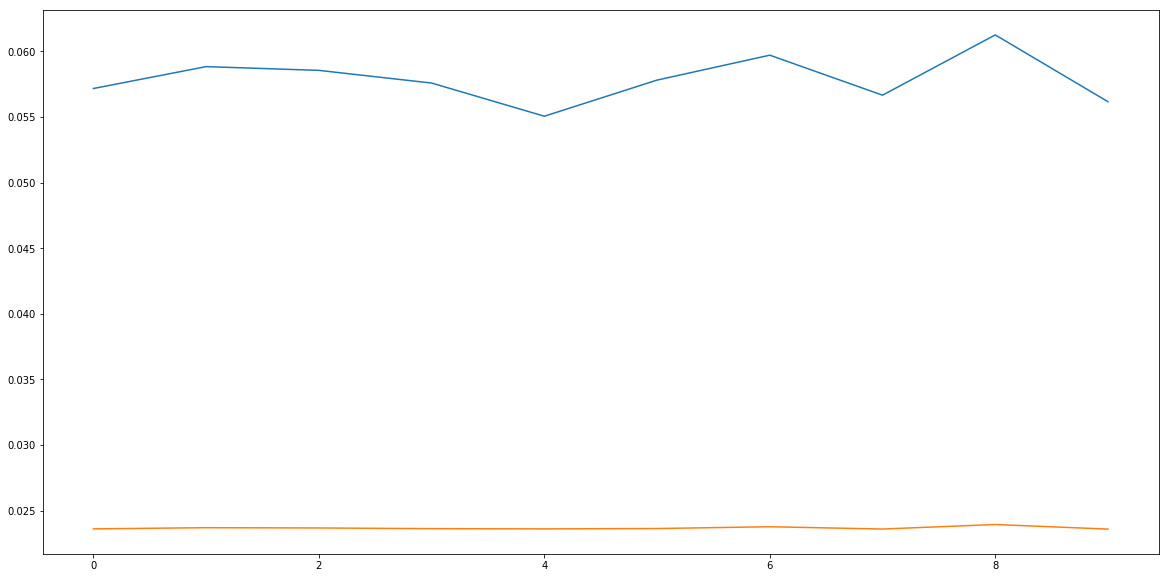

In [44]:
plt.figure(figsize=(20, 10))
plt.plot(val_main_loss)
plt.plot(test_main_loss)

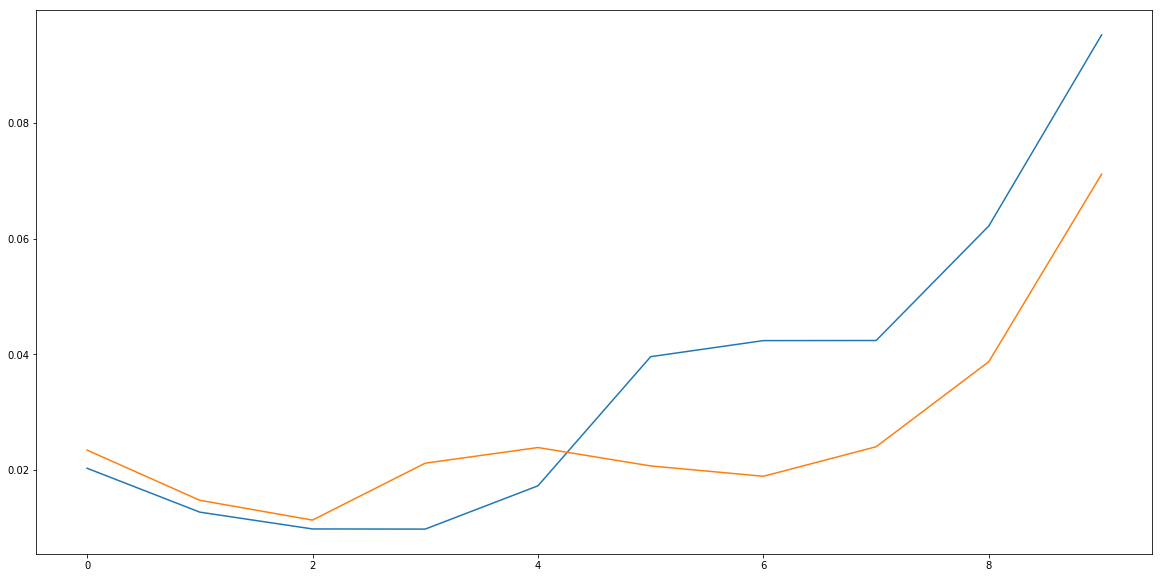

In [45]:
plt.figure(figsize=(20, 10))
plt.plot(val_aux_loss)
plt.plot(test_aux_loss)

In [46]:
min(val_main_loss), min(test_main_loss)

(0.055059182047843935, 0.02358669087290764)

#### Test with imf features and without multitask learning

In [48]:

X = np.zeros((len(data), depth, len(cols) + len(imf_cols)))
for j, name in enumerate(cols + imf_cols):
    for k in range(depth):
        X[:, k, j] = data[name].shift(depth - k - 1).fillna(method='bfill')

X_train = X[:train_length]
X_val = X[train_length:train_length+val_length]
X_test = X[-val_length:]

y_train = y[:train_length]
y_val = y[train_length:train_length+val_length]
y_test = y[-val_length:]

X_train_min, X_train_max = X_train.min(axis=0), X_train.max(axis=0)
X_train = (X_train - X_train_min)/(X_train_max - X_train_min + 1e-9)
X_val = (X_val - X_train_min)/(X_train_max - X_train_min + 1e-9)
X_test = (X_test - X_train_min)/(X_train_max - X_train_min + 1e-9)

y_train_min, y_train_max = y_train.min(axis=0), y_train.max(axis=0)
y_train = (y_train - y_train_min)/(y_train_max - y_train_min + 1e-9)
y_val = (y_val - y_train_min)/(y_train_max - y_train_min + 1e-9)
y_test = (y_test - y_train_min)/(y_train_max - y_train_min + 1e-9)

X_train_t = torch.Tensor(X_train)
X_val_t = torch.Tensor(X_val)
X_test_t = torch.Tensor(X_test)

y_train_t = torch.Tensor(y_train)
y_val_t = torch.Tensor(y_val)
y_test_t = torch.Tensor(y_test)

train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), shuffle=True, batch_size=64)
val_loader = DataLoader(TensorDataset(X_val_t, y_val_t), shuffle=False, batch_size=64)
test_loader = DataLoader(TensorDataset(X_test_t, y_test_t), shuffle=False, batch_size=64)

model = SelfBoostedNet(X_train_t.shape[2], i, 32, 3, 64).cuda()
opt = torch.optim.Adam(model.parameters(), lr=0.001)
loss = nn.MSELoss()
val_loss = 99999
for e in range(200):
    train_main_loss, train_aux_loss = 0, 0
    for batch_x, batch_y in tqdm_notebook(train_loader):
        opt.zero_grad()
        batch_x = batch_x.cuda()
        batch_y = batch_y.cuda()
        
        main_output, _ = model(batch_x)
        main_loss = loss(main_output, batch_y)
        total_loss = main_loss #+ alpha*aux_loss
        total_loss.backward()
        opt.step()
        train_main_loss += main_loss.item()*batch_x.shape[0]
        
    with torch.no_grad():
        val_main_loss, val_aux_loss = 0, 0
        for batch_x, batch_y in val_loader:
            batch_x = batch_x.cuda()
            batch_y = batch_y.cuda()
            main_output, _ = model(batch_x)
            main_loss = loss(main_output, batch_y)
            val_main_loss += main_loss.item()*batch_x.shape[0]
            
        train_main_loss /= X_train_t.shape[0]
        
        val_main_loss /= X_val_t.shape[0]
        
        if val_loss > val_main_loss:
            val_loss = val_main_loss
            torch.save(model.state_dict(), 'self_boost_sml.pt')

    print("Iter: ", e,
          "train main loss: ", train_main_loss, 
          "val main loss: ", val_main_loss)

model.load_state_dict(torch.load('self_boost_sml.pt'))

with torch.no_grad():
    val_main_loss = 0
    for batch_x, batch_y in val_loader:
        batch_x = batch_x.cuda()
        batch_y = batch_y.cuda()
        main_output, _= model(batch_x)
        main_loss = loss(main_output, batch_y)

        val_main_loss += main_loss.item()*batch_x.shape[0]

    test_main_loss = 0
    for batch_x, batch_y in test_loader:
        batch_x = batch_x.cuda()
        batch_y = batch_y.cuda()

        main_output, _ = model(batch_x)
        main_loss = loss(main_output, batch_y)

        test_main_loss += main_loss.item()*batch_x.shape[0]

    val_main_loss = val_main_loss/len(X_val_t)
    test_main_loss = test_main_loss/len(X_test_t)



Iter:  0 train main loss:  0.06828944083303214 val main loss:  0.06079612359404564



Iter:  1 train main loss:  0.039054052457213405 val main loss:  0.06290910482406616



Iter:  2 train main loss:  0.03914538875222206 val main loss:  0.06075165674090385



Iter:  3 train main loss:  0.039112173542380335 val main loss:  0.06942397385835647



Iter:  4 train main loss:  0.039117838442325595 val main loss:  0.07633335798978806



Iter:  5 train main loss:  0.03901807099580765 val main loss:  0.07211613476276398



Iter:  6 train main loss:  0.039272931441664695 val main loss:  0.0662975898385048



Iter:  7 train main loss:  0.039029837884008885 val main loss:  0.07381241798400878



Iter:  8 train main loss:  0.03926590774208307 val main loss:  0.06924987405538559



Iter:  9 train main loss:  0.039146394059062006 val main loss:  0.05987133547663689



Iter:  10 train main loss:  0.03955785743892193 val main loss:  0.0738875326514244



Iter:  11 train main loss:  0.03921990346163511 val main loss:  0.06517507791519166



Iter:  12 train main loss:  0.03921822030097246 val main loss:  0.06849495470523834



Iter:  13 train main loss:  0.03954497843980789 val main loss:  0.06827599465847016



Iter:  14 train main loss:  0.039240640811622145 val main loss:  0.06733113035559654



Iter:  15 train main loss:  0.03910588160157204 val main loss:  0.07204600393772126



Iter:  16 train main loss:  0.038980014584958554 val main loss:  0.06854230403900147



Iter:  17 train main loss:  0.03891791623085737 val main loss:  0.06978251159191132



Iter:  18 train main loss:  0.03888761956244707 val main loss:  0.06998000651597977



Iter:  19 train main loss:  0.03901360493153334 val main loss:  0.07271384924650193



Iter:  20 train main loss:  0.03934594940394163 val main loss:  0.08339422762393951



Iter:  21 train main loss:  0.03904791310429573 val main loss:  0.07960872888565064



Iter:  22 train main loss:  0.03907019823789597 val main loss:  0.06319016486406326



Iter:  23 train main loss:  0.03901027422398329 val main loss:  0.06781385377049447



Iter:  24 train main loss:  0.03914419438689947 val main loss:  0.06740032374858856



Iter:  25 train main loss:  0.03909404713660478 val main loss:  0.07695393979549409



Iter:  26 train main loss:  0.039451445005834106 val main loss:  0.06715736284852028



Iter:  27 train main loss:  0.03897659283131361 val main loss:  0.07599182397127152



Iter:  28 train main loss:  0.03906379111111164 val main loss:  0.07175874531269073



Iter:  29 train main loss:  0.03890441130846739 val main loss:  0.07677413433790208



Iter:  30 train main loss:  0.03943516340106726 val main loss:  0.07998518526554108



Iter:  31 train main loss:  0.03901068191975355 val main loss:  0.060176172852516176



Iter:  32 train main loss:  0.0389951453730464 val main loss:  0.07318081617355347



Iter:  33 train main loss:  0.039102200604975226 val main loss:  0.06915941596031189



Iter:  34 train main loss:  0.03889652237296105 val main loss:  0.07081692427396774



Iter:  35 train main loss:  0.03926116984337568 val main loss:  0.06362824335694313



Iter:  36 train main loss:  0.03924441110342741 val main loss:  0.06655025616288185



Iter:  37 train main loss:  0.03914234507828951 val main loss:  0.06755023315548897



Iter:  38 train main loss:  0.03877531439065933 val main loss:  0.06278079643845558



Iter:  39 train main loss:  0.03912096634507179 val main loss:  0.06696409106254578



Iter:  40 train main loss:  0.038959738202393054 val main loss:  0.06673190265893936



Iter:  41 train main loss:  0.038942401744425294 val main loss:  0.07241712480783463



Iter:  42 train main loss:  0.03900050710886717 val main loss:  0.07052724182605744



Iter:  43 train main loss:  0.039013824239373204 val main loss:  0.06967692703008652



Iter:  44 train main loss:  0.0388681984692812 val main loss:  0.06847633838653565



Iter:  45 train main loss:  0.038964750580489635 val main loss:  0.06422759205102921



Iter:  46 train main loss:  0.039032421968877316 val main loss:  0.07389826774597168



Iter:  47 train main loss:  0.03926018472760916 val main loss:  0.07408588826656341



Iter:  48 train main loss:  0.03889052022248506 val main loss:  0.06793185740709305



Iter:  49 train main loss:  0.03906060315668583 val main loss:  0.06436071813106536



Iter:  50 train main loss:  0.03912388652563095 val main loss:  0.0640456573665142



Iter:  51 train main loss:  0.03952856034040451 val main loss:  0.06014602690935135



Iter:  52 train main loss:  0.03890933681279421 val main loss:  0.06922710716724395



Iter:  53 train main loss:  0.038870757631957534 val main loss:  0.07365090698003769



Iter:  54 train main loss:  0.03896998643875122 val main loss:  0.06618449345231056



Iter:  55 train main loss:  0.03913859941065311 val main loss:  0.06952958524227143



Iter:  56 train main loss:  0.039204477518796924 val main loss:  0.07312880635261536



Iter:  57 train main loss:  0.03891623537987471 val main loss:  0.0628620570898056



Iter:  58 train main loss:  0.03911991782486439 val main loss:  0.07091698914766312



Iter:  59 train main loss:  0.03892709393054247 val main loss:  0.07268294990062714



Iter:  60 train main loss:  0.03911516577005386 val main loss:  0.06360771983861924



Iter:  61 train main loss:  0.03905113935470581 val main loss:  0.06902972832322121



Iter:  62 train main loss:  0.039230414032936096 val main loss:  0.05940102756023407



Iter:  63 train main loss:  0.0390773743391037 val main loss:  0.06559144139289856



Iter:  64 train main loss:  0.038926497139036655 val main loss:  0.07300802648067474



Iter:  65 train main loss:  0.0389157872274518 val main loss:  0.07170511096715927



Iter:  66 train main loss:  0.03898634508252144 val main loss:  0.07375169068574905



Iter:  67 train main loss:  0.03896338671445847 val main loss:  0.0682296797633171



Iter:  68 train main loss:  0.03887821864336729 val main loss:  0.06382054001092911



Iter:  69 train main loss:  0.03897429633885622 val main loss:  0.06279782399535179



Iter:  70 train main loss:  0.03888535812497139 val main loss:  0.062317180633544925



Iter:  71 train main loss:  0.03896592829376459 val main loss:  0.07343975335359573



Iter:  72 train main loss:  0.038892527595162395 val main loss:  0.06976053535938263



Iter:  73 train main loss:  0.03889349773526192 val main loss:  0.07273407280445099



Iter:  74 train main loss:  0.03898916896432638 val main loss:  0.07117897272109985



Iter:  75 train main loss:  0.03889374531805515 val main loss:  0.06225704357028008



Iter:  76 train main loss:  0.03906823959201575 val main loss:  0.07311638683080673



Iter:  77 train main loss:  0.039125703684985635 val main loss:  0.07131966888904571



Iter:  78 train main loss:  0.03892436243593693 val main loss:  0.06795565485954284



Iter:  79 train main loss:  0.03891094468533993 val main loss:  0.05552585184574127



Iter:  80 train main loss:  0.03918182492256164 val main loss:  0.07216660261154174



Iter:  81 train main loss:  0.03884108621627092 val main loss:  0.07130499511957168



Iter:  82 train main loss:  0.03889218021184206 val main loss:  0.06979012250900268



Iter:  83 train main loss:  0.03922890607267618 val main loss:  0.06689775511622428



Iter:  84 train main loss:  0.038873465694487096 val main loss:  0.06643770024180412



Iter:  85 train main loss:  0.03900275945663452 val main loss:  0.06355883941054344



Iter:  86 train main loss:  0.03896173469722271 val main loss:  0.0781370285153389



Iter:  87 train main loss:  0.03907700542360544 val main loss:  0.06582752123475075



Iter:  88 train main loss:  0.03890597097575665 val main loss:  0.06827227219939232



Iter:  89 train main loss:  0.038917903304100034 val main loss:  0.06935342341661453



Iter:  90 train main loss:  0.038911626785993574 val main loss:  0.0685608696937561



Iter:  91 train main loss:  0.03901170145720243 val main loss:  0.0629726618528366



Iter:  92 train main loss:  0.03908789087086916 val main loss:  0.06972920656204223



Iter:  93 train main loss:  0.03904935851693153 val main loss:  0.07600693374872208



Iter:  94 train main loss:  0.0391256283223629 val main loss:  0.07601233512163162



Iter:  95 train main loss:  0.03885082345455885 val main loss:  0.07642868846654892



Iter:  96 train main loss:  0.03912137296050787 val main loss:  0.07770546615123748



Iter:  97 train main loss:  0.039109313301742075 val main loss:  0.07436945378780364



Iter:  98 train main loss:  0.03910300519317388 val main loss:  0.06436630800366401



Iter:  99 train main loss:  0.03913528330624103 val main loss:  0.07113968968391418



Iter:  100 train main loss:  0.038999249301850794 val main loss:  0.08367709845304488



Iter:  101 train main loss:  0.03920063927769661 val main loss:  0.07546193450689316



Iter:  102 train main loss:  0.038991013392806056 val main loss:  0.06933433681726456



Iter:  103 train main loss:  0.03900382623076439 val main loss:  0.07003319084644317



Iter:  104 train main loss:  0.03897706370800733 val main loss:  0.07440421044826508



Iter:  105 train main loss:  0.038957135193049906 val main loss:  0.056371778547763825



Iter:  106 train main loss:  0.03916573088616133 val main loss:  0.06621949598193169



Iter:  107 train main loss:  0.03889094278216362 val main loss:  0.07466922581195831



Iter:  108 train main loss:  0.03899206683039665 val main loss:  0.0651724523305893



Iter:  109 train main loss:  0.03888985112309456 val main loss:  0.07372801691293716



Iter:  110 train main loss:  0.038945240750908855 val main loss:  0.06197902143001557



Iter:  111 train main loss:  0.0389573385193944 val main loss:  0.06092409133911133



Iter:  112 train main loss:  0.039059983268380165 val main loss:  0.0672688865661621



Iter:  113 train main loss:  0.03886046588420868 val main loss:  0.064794961810112



Iter:  114 train main loss:  0.03896997306495905 val main loss:  0.07220457971096039



Iter:  115 train main loss:  0.03893206547945738 val main loss:  0.07331951797008514



Iter:  116 train main loss:  0.039237362518906596 val main loss:  0.07750758856534957



Iter:  117 train main loss:  0.03906531862914562 val main loss:  0.0758509448170662



Iter:  118 train main loss:  0.039171837382018564 val main loss:  0.06774224758148194



Iter:  119 train main loss:  0.038921280018985274 val main loss:  0.06523593932390213



Iter:  120 train main loss:  0.03895638581365347 val main loss:  0.06739190220832825



Iter:  121 train main loss:  0.03895942181348801 val main loss:  0.0632302138209343



Iter:  122 train main loss:  0.038897614441812035 val main loss:  0.07390239715576172



Iter:  123 train main loss:  0.038992843851447107 val main loss:  0.08020750969648362



Iter:  124 train main loss:  0.038898375518620014 val main loss:  0.07432338804006576



Iter:  125 train main loss:  0.0389935652166605 val main loss:  0.06561549335718155



Iter:  126 train main loss:  0.038965490981936454 val main loss:  0.06629302829504014



Iter:  127 train main loss:  0.0389290028065443 val main loss:  0.08003329485654831



Iter:  128 train main loss:  0.03890616096556187 val main loss:  0.06325414001941682



Iter:  129 train main loss:  0.03906856946647167 val main loss:  0.06699725866317749



Iter:  130 train main loss:  0.038940478190779684 val main loss:  0.08153537034988403



Iter:  131 train main loss:  0.038873263411223886 val main loss:  0.06538380563259125



Iter:  132 train main loss:  0.03888015940785408 val main loss:  0.0693188339471817



Iter:  133 train main loss:  0.03892731875181198 val main loss:  0.07080754935741425



Iter:  134 train main loss:  0.038878264650702474 val main loss:  0.06351998686790467



Iter:  135 train main loss:  0.03902484964579344 val main loss:  0.06768643900752068



Iter:  136 train main loss:  0.03902677826583385 val main loss:  0.07399514794349671



Iter:  137 train main loss:  0.0388151615858078 val main loss:  0.06547528326511383



Iter:  138 train main loss:  0.03900456201285124 val main loss:  0.06830320537090301



Iter:  139 train main loss:  0.03912282895296812 val main loss:  0.06974413007497787



Iter:  140 train main loss:  0.03914064943790436 val main loss:  0.06226829737424851



Iter:  141 train main loss:  0.039048618003726006 val main loss:  0.07958777219057084



Iter:  142 train main loss:  0.03913937989622354 val main loss:  0.06947290927171706



Iter:  143 train main loss:  0.03896811835467815 val main loss:  0.06861860096454621



Iter:  144 train main loss:  0.03893652640283108 val main loss:  0.07382814228534698



Iter:  145 train main loss:  0.039005388282239435 val main loss:  0.07498181760311126



Iter:  146 train main loss:  0.03900574158877134 val main loss:  0.06488319456577302



Iter:  147 train main loss:  0.039123061820864675 val main loss:  0.07323856711387634



Iter:  148 train main loss:  0.03891759283840656 val main loss:  0.06033430084586144



Iter:  149 train main loss:  0.03894496653228998 val main loss:  0.06915094822645187



Iter:  150 train main loss:  0.039094569869339464 val main loss:  0.07712084829807281



Iter:  151 train main loss:  0.039027954638004306 val main loss:  0.07454311549663543



Iter:  152 train main loss:  0.039198368601500985 val main loss:  0.07254318118095399



Iter:  153 train main loss:  0.03893015444278717 val main loss:  0.07255755722522736



Iter:  154 train main loss:  0.03898638267070055 val main loss:  0.06193750977516174



Iter:  155 train main loss:  0.03923223957419395 val main loss:  0.0623831245303154



Iter:  156 train main loss:  0.038890185691416265 val main loss:  0.07031935125589371



Iter:  157 train main loss:  0.03895194672048092 val main loss:  0.07400080054998398



Iter:  158 train main loss:  0.03887580581009388 val main loss:  0.06704124480485917



Iter:  159 train main loss:  0.03889843195676804 val main loss:  0.06860809922218322



Iter:  160 train main loss:  0.03892132617533207 val main loss:  0.06496605068445206



Iter:  161 train main loss:  0.038905304968357084 val main loss:  0.06393216133117675



Iter:  162 train main loss:  0.03892786700278521 val main loss:  0.06611186146736145



Iter:  163 train main loss:  0.038867478482425215 val main loss:  0.06980880677700042



Iter:  164 train main loss:  0.03884794622659683 val main loss:  0.06807963579893112



Iter:  165 train main loss:  0.039082558527588844 val main loss:  0.0745488703250885



Iter:  166 train main loss:  0.039022552706301214 val main loss:  0.0682439449429512



Iter:  167 train main loss:  0.03896781027317047 val main loss:  0.06974412351846696



Iter:  168 train main loss:  0.038820275142788886 val main loss:  0.0725625628232956



Iter:  169 train main loss:  0.03892249148339033 val main loss:  0.06805247709155082



Iter:  170 train main loss:  0.038861959092319015 val main loss:  0.07429918706417084



Iter:  171 train main loss:  0.03893413461744785 val main loss:  0.06094806611537933



Iter:  172 train main loss:  0.03905282609164715 val main loss:  0.07156361997127533



Iter:  173 train main loss:  0.03899563830345869 val main loss:  0.06761783495545387



Iter:  174 train main loss:  0.03931899663060903 val main loss:  0.06809356302022934



Iter:  175 train main loss:  0.03896110657602549 val main loss:  0.07081582397222519



Iter:  176 train main loss:  0.03891335010528565 val main loss:  0.06871805861592292



Iter:  177 train main loss:  0.03882862389087677 val main loss:  0.05996319681406021



Iter:  178 train main loss:  0.03889235876500607 val main loss:  0.06807569906115532



Iter:  179 train main loss:  0.038876038007438184 val main loss:  0.0689954388141632



Iter:  180 train main loss:  0.03929197680205107 val main loss:  0.06424803927540779



Iter:  181 train main loss:  0.03893202044069767 val main loss:  0.0653210750222206



Iter:  182 train main loss:  0.03884557295590639 val main loss:  0.07502935975790023



Iter:  183 train main loss:  0.038917367085814475 val main loss:  0.061841794103384015



Iter:  184 train main loss:  0.038959379754960534 val main loss:  0.07039494782686234



Iter:  185 train main loss:  0.03882700350135565 val main loss:  0.06298899859189987



Iter:  186 train main loss:  0.03893400643020868 val main loss:  0.0728553456068039



Iter:  187 train main loss:  0.03914449721574784 val main loss:  0.07223746776580811



Iter:  188 train main loss:  0.03901840802282095 val main loss:  0.06522030130028725



Iter:  189 train main loss:  0.038900930546224115 val main loss:  0.07340538263320923



Iter:  190 train main loss:  0.03894610915333033 val main loss:  0.07159718513488769



Iter:  191 train main loss:  0.03892625596374273 val main loss:  0.05663384228944778



Iter:  192 train main loss:  0.03888345044106245 val main loss:  0.0693998721241951



Iter:  193 train main loss:  0.038947908505797386 val main loss:  0.07391407072544098



Iter:  194 train main loss:  0.03892279520630836 val main loss:  0.06612090840935707



Iter:  195 train main loss:  0.03883738808333874 val main loss:  0.06712312117218971



Iter:  196 train main loss:  0.03883222673088312 val main loss:  0.06975918054580689



Iter:  197 train main loss:  0.03882092621177435 val main loss:  0.06325696438550948



Iter:  198 train main loss:  0.03898391842842102 val main loss:  0.06568039208650589



Iter:  199 train main loss:  0.03887553282082081 val main loss:  0.07221130311489105


In [49]:
val_main_loss, test_main_loss

(0.05552585184574127, 0.023591050356626512)

#### Test without imf features and without multitask learning

In [51]:

X = np.zeros((len(data), depth, len(cols)))
for j, name in enumerate(cols):
    for k in range(depth):
        X[:, k, j] = data[name].shift(depth - k - 1).fillna(method='bfill')

X_train = X[:train_length]
X_val = X[train_length:train_length+val_length]
X_test = X[-val_length:]

y_train = y[:train_length]
y_val = y[train_length:train_length+val_length]
y_test = y[-val_length:]

X_train_min, X_train_max = X_train.min(axis=0), X_train.max(axis=0)
X_train = (X_train - X_train_min)/(X_train_max - X_train_min + 1e-9)
X_val = (X_val - X_train_min)/(X_train_max - X_train_min + 1e-9)
X_test = (X_test - X_train_min)/(X_train_max - X_train_min + 1e-9)

y_train_min, y_train_max = y_train.min(axis=0), y_train.max(axis=0)
y_train = (y_train - y_train_min)/(y_train_max - y_train_min + 1e-9)
y_val = (y_val - y_train_min)/(y_train_max - y_train_min + 1e-9)
y_test = (y_test - y_train_min)/(y_train_max - y_train_min + 1e-9)

X_train_t = torch.Tensor(X_train)
X_val_t = torch.Tensor(X_val)
X_test_t = torch.Tensor(X_test)

y_train_t = torch.Tensor(y_train)
y_val_t = torch.Tensor(y_val)
y_test_t = torch.Tensor(y_test)

train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), shuffle=True, batch_size=64)
val_loader = DataLoader(TensorDataset(X_val_t, y_val_t), shuffle=False, batch_size=64)
test_loader = DataLoader(TensorDataset(X_test_t, y_test_t), shuffle=False, batch_size=64)

model = SelfBoostedNet(X_train_t.shape[2], i, 32, 3, 64).cuda()
opt = torch.optim.Adam(model.parameters(), lr=0.001)
loss = nn.MSELoss()
val_loss = 99999
for e in range(200):
    train_main_loss, train_aux_loss = 0, 0
    for batch_x, batch_y in tqdm_notebook(train_loader):
        opt.zero_grad()
        batch_x = batch_x.cuda()
        batch_y = batch_y.cuda()
        
        main_output, _ = model(batch_x)
        main_loss = loss(main_output, batch_y)
        total_loss = main_loss #+ alpha*aux_loss
        total_loss.backward()
        opt.step()
        train_main_loss += main_loss.item()*batch_x.shape[0]
        
    with torch.no_grad():
        val_main_loss, val_aux_loss = 0, 0
        for batch_x, batch_y in val_loader:
            batch_x = batch_x.cuda()
            batch_y = batch_y.cuda()
            main_output, _ = model(batch_x)
            main_loss = loss(main_output, batch_y)
            val_main_loss += main_loss.item()*batch_x.shape[0]
            
        train_main_loss /= X_train_t.shape[0]
        
        val_main_loss /= X_val_t.shape[0]
        
        if val_loss > val_main_loss:
            val_loss = val_main_loss
            torch.save(model.state_dict(), 'self_boost_sml.pt')

    print("Iter: ", e,
          "train main loss: ", train_main_loss, 
          "val main loss: ", val_main_loss)

model.load_state_dict(torch.load('self_boost_sml.pt'))

with torch.no_grad():
    val_main_loss = 0
    for batch_x, batch_y in val_loader:
        batch_x = batch_x.cuda()
        batch_y = batch_y.cuda()
        main_output, _= model(batch_x)
        main_loss = loss(main_output, batch_y)

        val_main_loss += main_loss.item()*batch_x.shape[0]

    test_main_loss = 0
    for batch_x, batch_y in test_loader:
        batch_x = batch_x.cuda()
        batch_y = batch_y.cuda()

        main_output, aux_output = model(batch_x)
        main_loss = loss(main_output, batch_y)

        test_main_loss += main_loss.item()*batch_x.shape[0]

val_main_loss = val_main_loss/len(X_val_t)
test_main_loss = test_main_loss/len(X_test_t)



Iter:  0 train main loss:  0.047280386947095396 val main loss:  0.06744725316762924



Iter:  1 train main loss:  0.03893672320991755 val main loss:  0.06888745293021202



Iter:  2 train main loss:  0.03889579497277737 val main loss:  0.07301781058311463



Iter:  3 train main loss:  0.03918227098882198 val main loss:  0.059838208109140395



Iter:  4 train main loss:  0.039287195168435575 val main loss:  0.06707785680890083



Iter:  5 train main loss:  0.03887845896184444 val main loss:  0.07158258587121963



Iter:  6 train main loss:  0.03906287740916014 val main loss:  0.07108261734247208



Iter:  7 train main loss:  0.03901470009237528 val main loss:  0.07532885283231736



Iter:  8 train main loss:  0.0390398471057415 val main loss:  0.06863482117652893



Iter:  9 train main loss:  0.038861746788024905 val main loss:  0.07602815330028534



Iter:  10 train main loss:  0.038945707716047766 val main loss:  0.06737722665071487



Iter:  11 train main loss:  0.03907499879598617 val main loss:  0.07337092339992524



Iter:  12 train main loss:  0.0388885647803545 val main loss:  0.07104214191436768



Iter:  13 train main loss:  0.03919732503592968 val main loss:  0.06759545922279359



Iter:  14 train main loss:  0.0390725639089942 val main loss:  0.07158942937850953



Iter:  15 train main loss:  0.039066961780190465 val main loss:  0.07237755358219147



Iter:  16 train main loss:  0.03889926176518202 val main loss:  0.0664979587495327



Iter:  17 train main loss:  0.03888819359242916 val main loss:  0.0629575203359127



Iter:  18 train main loss:  0.039075047299265864 val main loss:  0.061757509261369706



Iter:  19 train main loss:  0.039157443530857566 val main loss:  0.06570370197296142



Iter:  20 train main loss:  0.039046682082116604 val main loss:  0.06317157238721847



Iter:  21 train main loss:  0.0390515311807394 val main loss:  0.07105429530143738



Iter:  22 train main loss:  0.039106418006122114 val main loss:  0.06953268468379975



Iter:  23 train main loss:  0.03891317058354616 val main loss:  0.06658922523260116



Iter:  24 train main loss:  0.038983022645115856 val main loss:  0.06981042981147766



Iter:  25 train main loss:  0.038971950821578505 val main loss:  0.08299580276012421



Iter:  26 train main loss:  0.039228351190686225 val main loss:  0.07360111951828002



Iter:  27 train main loss:  0.038921600468456746 val main loss:  0.06706359177827835



Iter:  28 train main loss:  0.038926885426044465 val main loss:  0.0702338719367981



Iter:  29 train main loss:  0.038874252215027806 val main loss:  0.07037820398807526



Iter:  30 train main loss:  0.03896462079137564 val main loss:  0.07041856944561005



Iter:  31 train main loss:  0.038911507651209834 val main loss:  0.06347234547138214



Iter:  32 train main loss:  0.03884649265557528 val main loss:  0.06176013708114624



Iter:  33 train main loss:  0.03907734237611294 val main loss:  0.07837657839059829



Iter:  34 train main loss:  0.03891045045107603 val main loss:  0.07353863537311554



Iter:  35 train main loss:  0.038882420174777506 val main loss:  0.06721524700522423



Iter:  36 train main loss:  0.03885939598083496 val main loss:  0.07247072577476502



Iter:  37 train main loss:  0.0389653005823493 val main loss:  0.06981607615947723



Iter:  38 train main loss:  0.039290240928530694 val main loss:  0.07904380977153778



Iter:  39 train main loss:  0.039011285975575447 val main loss:  0.0609641383588314



Iter:  40 train main loss:  0.039042722173035144 val main loss:  0.06742309466004372



Iter:  41 train main loss:  0.039144595861434935 val main loss:  0.06693239644169807



Iter:  42 train main loss:  0.03888570237904787 val main loss:  0.07738194525241852



Iter:  43 train main loss:  0.03899686761200428 val main loss:  0.06573783054947853



Iter:  44 train main loss:  0.0389525456726551 val main loss:  0.07589002192020416



Iter:  45 train main loss:  0.038992884755134585 val main loss:  0.06675855606794358



Iter:  46 train main loss:  0.03911324631422758 val main loss:  0.07018615394830703



Iter:  47 train main loss:  0.038915086165070535 val main loss:  0.067709891051054



Iter:  48 train main loss:  0.0389153003692627 val main loss:  0.07196002364158631



Iter:  49 train main loss:  0.03908428568392992 val main loss:  0.06731084406375885



Iter:  50 train main loss:  0.03887331198900938 val main loss:  0.06597138971090316



Iter:  51 train main loss:  0.038884775005280973 val main loss:  0.06784204602241516



Iter:  52 train main loss:  0.03898712791502476 val main loss:  0.06877036899328232



Iter:  53 train main loss:  0.038941949643194675 val main loss:  0.07257222384214401



Iter:  54 train main loss:  0.03906233459711075 val main loss:  0.07419179767370224



Iter:  55 train main loss:  0.039123308323323724 val main loss:  0.06875629872083663



Iter:  56 train main loss:  0.03930692493915558 val main loss:  0.07390590220689773



Iter:  57 train main loss:  0.03908260222524405 val main loss:  0.0750020068883896



Iter:  58 train main loss:  0.03889920324087143 val main loss:  0.06665794372558594



Iter:  59 train main loss:  0.03886350620537996 val main loss:  0.0672322829067707



Iter:  60 train main loss:  0.03894008107483387 val main loss:  0.07423473477363586



Iter:  61 train main loss:  0.03908749714493751 val main loss:  0.07259556174278259



Iter:  62 train main loss:  0.03916750978678465 val main loss:  0.06532310277223587



Iter:  63 train main loss:  0.03897419184446335 val main loss:  0.06770040124654769



Iter:  64 train main loss:  0.038896569088101386 val main loss:  0.07027501136064529



Iter:  65 train main loss:  0.038872744478285315 val main loss:  0.0699682131409645



Iter:  66 train main loss:  0.03887812323868275 val main loss:  0.0742039704322815



Iter:  67 train main loss:  0.038981038853526113 val main loss:  0.06279397219419479



Iter:  68 train main loss:  0.03895267363637686 val main loss:  0.06805920094251633



Iter:  69 train main loss:  0.03899083435535431 val main loss:  0.07017435729503632



Iter:  70 train main loss:  0.038931330405175685 val main loss:  0.06850809276103974



Iter:  71 train main loss:  0.03887567415833473 val main loss:  0.07574021279811859



Iter:  72 train main loss:  0.03890503276139498 val main loss:  0.07716486811637878



Iter:  73 train main loss:  0.038887118846178056 val main loss:  0.0711988577246666



Iter:  74 train main loss:  0.03892116453498602 val main loss:  0.07044228821992875



Iter:  75 train main loss:  0.039077140986919404 val main loss:  0.07063301295042038



Iter:  76 train main loss:  0.0389471360296011 val main loss:  0.06744618922472



Iter:  77 train main loss:  0.038988679125905035 val main loss:  0.06484257400035859



Iter:  78 train main loss:  0.03914322927594185 val main loss:  0.07959417760372162



Iter:  79 train main loss:  0.039185989275574686 val main loss:  0.07195012211799622



Iter:  80 train main loss:  0.038859030827879906 val main loss:  0.0692882052063942



Iter:  81 train main loss:  0.03900296282023191 val main loss:  0.06873274341225624



Iter:  82 train main loss:  0.03889236692339182 val main loss:  0.0754146346449852



Iter:  83 train main loss:  0.038934287913143635 val main loss:  0.06971344649791718



Iter:  84 train main loss:  0.03895216595381498 val main loss:  0.06696036636829376



Iter:  85 train main loss:  0.03889716099947691 val main loss:  0.07438144445419312



Iter:  86 train main loss:  0.038971391171216965 val main loss:  0.07381622850894928



Iter:  87 train main loss:  0.038953727036714555 val main loss:  0.07386699020862579



Iter:  88 train main loss:  0.03889320489019155 val main loss:  0.062131520509719845



Iter:  89 train main loss:  0.03887259848415851 val main loss:  0.06499158695340157



Iter:  90 train main loss:  0.03903394564986229 val main loss:  0.0740401542186737



Iter:  91 train main loss:  0.039053851813077925 val main loss:  0.07110186457633973



Iter:  92 train main loss:  0.03891594227403403 val main loss:  0.07461643189191819



Iter:  93 train main loss:  0.038978145271539685 val main loss:  0.06291771426796913



Iter:  94 train main loss:  0.039036206677556036 val main loss:  0.06462232798337936



Iter:  95 train main loss:  0.03885465689003467 val main loss:  0.06684233516454696



Iter:  96 train main loss:  0.038889436312019826 val main loss:  0.06617305994033813



Iter:  97 train main loss:  0.0390742913633585 val main loss:  0.07339599341154099



Iter:  98 train main loss:  0.038900042362511156 val main loss:  0.07216514229774475



Iter:  99 train main loss:  0.03891379743814469 val main loss:  0.0696747013926506



Iter:  100 train main loss:  0.03880398537963629 val main loss:  0.07617106884717942



Iter:  101 train main loss:  0.0389965096861124 val main loss:  0.06453649371862412



Iter:  102 train main loss:  0.038960741870105266 val main loss:  0.06397652015089988



Iter:  103 train main loss:  0.03890567433089018 val main loss:  0.06763664841651916



Iter:  104 train main loss:  0.03890135988593101 val main loss:  0.06195571303367615



Iter:  105 train main loss:  0.038868738450109956 val main loss:  0.06848810076713562



Iter:  106 train main loss:  0.038973733261227606 val main loss:  0.07046647548675537



Iter:  107 train main loss:  0.03886985037475824 val main loss:  0.06670610129833221



Iter:  108 train main loss:  0.038902908004820345 val main loss:  0.06741101771593094



Iter:  109 train main loss:  0.038876476995646954 val main loss:  0.0668334013223648



Iter:  110 train main loss:  0.038824918866157535 val main loss:  0.06175495460629463



Iter:  111 train main loss:  0.0389744034036994 val main loss:  0.06943890184164048



Iter:  112 train main loss:  0.038903937339782715 val main loss:  0.0727155476808548



Iter:  113 train main loss:  0.038984611555933954 val main loss:  0.07853581815958023



Iter:  114 train main loss:  0.039053281992673876 val main loss:  0.07253668069839478



Iter:  115 train main loss:  0.03891062147915363 val main loss:  0.06760957971215248



Iter:  116 train main loss:  0.0388447093591094 val main loss:  0.07057094067335129



Iter:  117 train main loss:  0.03882706563919783 val main loss:  0.0683715657889843



Iter:  118 train main loss:  0.03893011104315519 val main loss:  0.07040637731552124



Iter:  119 train main loss:  0.03895441498607397 val main loss:  0.060873436331748965



Iter:  120 train main loss:  0.038957658931612967 val main loss:  0.07127521812915802



Iter:  121 train main loss:  0.038955067805945875 val main loss:  0.07223195165395736



Iter:  122 train main loss:  0.03889593187719584 val main loss:  0.07658375799655914



Iter:  123 train main loss:  0.03894917704164982 val main loss:  0.07146081626415253



Iter:  124 train main loss:  0.038851442895829674 val main loss:  0.07160286664962769



Iter:  125 train main loss:  0.03886803448200226 val main loss:  0.0717061710357666



Iter:  126 train main loss:  0.0388466826826334 val main loss:  0.068170325756073



Iter:  127 train main loss:  0.03893056571483612 val main loss:  0.07059091597795486



Iter:  128 train main loss:  0.03884563535451889 val main loss:  0.06520195513963699



Iter:  129 train main loss:  0.038908478170633316 val main loss:  0.06899007737636566



Iter:  130 train main loss:  0.03883547268807888 val main loss:  0.06555427998304367



Iter:  131 train main loss:  0.03895435765385628 val main loss:  0.06629685536026955



Iter:  132 train main loss:  0.03888532090932131 val main loss:  0.07440163314342499



Iter:  133 train main loss:  0.03901276629418135 val main loss:  0.0634929458796978



Iter:  134 train main loss:  0.03886287722736597 val main loss:  0.07130409061908721



Iter:  135 train main loss:  0.038911849185824396 val main loss:  0.0677199736237526



Iter:  136 train main loss:  0.0388726944103837 val main loss:  0.07513873964548111



Iter:  137 train main loss:  0.03890057940036058 val main loss:  0.07166822791099549



Iter:  138 train main loss:  0.03903883632272482 val main loss:  0.06787518620491027



Iter:  139 train main loss:  0.038884175084531306 val main loss:  0.06818713411688805



Iter:  140 train main loss:  0.03876589808613062 val main loss:  0.07458728909492493



Iter:  141 train main loss:  0.03893296830356121 val main loss:  0.0683669313788414



Iter:  142 train main loss:  0.038828298412263394 val main loss:  0.07024945914745331



Iter:  143 train main loss:  0.03883498027920723 val main loss:  0.06367034837603569



Iter:  144 train main loss:  0.0388959376886487 val main loss:  0.07149889707565307



Iter:  145 train main loss:  0.03901839960366488 val main loss:  0.06362363383173943



Iter:  146 train main loss:  0.038960051760077476 val main loss:  0.06881826251745224



Iter:  147 train main loss:  0.03886862523853779 val main loss:  0.0635075506567955



Iter:  148 train main loss:  0.03884232506155968 val main loss:  0.07239724218845367



Iter:  149 train main loss:  0.03885071035474539 val main loss:  0.06192329570651054



Iter:  150 train main loss:  0.0390082449093461 val main loss:  0.0678427791595459



Iter:  151 train main loss:  0.038824399299919606 val main loss:  0.06421302437782288



Iter:  152 train main loss:  0.03899459533393383 val main loss:  0.06683531358838081



Iter:  153 train main loss:  0.039103461802005766 val main loss:  0.06702127560973167



Iter:  154 train main loss:  0.03883777230978012 val main loss:  0.07445226550102234



Iter:  155 train main loss:  0.038866105563938616 val main loss:  0.07096441000699998



Iter:  156 train main loss:  0.0388229664042592 val main loss:  0.06583745256066323



Iter:  157 train main loss:  0.03887072179466486 val main loss:  0.06846911832690239



Iter:  158 train main loss:  0.0388443411886692 val main loss:  0.07322228997945786



Iter:  159 train main loss:  0.038876093737781045 val main loss:  0.06919827193021774



Iter:  160 train main loss:  0.03900503147393465 val main loss:  0.07111708045005799



Iter:  161 train main loss:  0.03885184336453676 val main loss:  0.06522585809230805



Iter:  162 train main loss:  0.038857147470116614 val main loss:  0.06715774953365326



Iter:  163 train main loss:  0.03893518723547459 val main loss:  0.06751101344823837



Iter:  164 train main loss:  0.03892175484448671 val main loss:  0.06487564444541931



Iter:  165 train main loss:  0.038893767558038236 val main loss:  0.06432121276855468



Iter:  166 train main loss:  0.039105480536818504 val main loss:  0.06815606474876404



Iter:  167 train main loss:  0.038947609700262543 val main loss:  0.06967645853757859



Iter:  168 train main loss:  0.03889762207865715 val main loss:  0.06841713920235634



Iter:  169 train main loss:  0.03889643136411905 val main loss:  0.06758455201983452



Iter:  170 train main loss:  0.03888138808310032 val main loss:  0.0703971654176712



Iter:  171 train main loss:  0.03890761818736792 val main loss:  0.06783999174833298



Iter:  172 train main loss:  0.03889586690813303 val main loss:  0.0662218038737774



Iter:  173 train main loss:  0.03890390377491713 val main loss:  0.06872940957546234



Iter:  174 train main loss:  0.03889910399913788 val main loss:  0.0659744295477867



Iter:  175 train main loss:  0.03889925252646208 val main loss:  0.07178297311067582



Iter:  176 train main loss:  0.03883352603763342 val main loss:  0.062299406230449675



Iter:  177 train main loss:  0.03894337508827448 val main loss:  0.07446739822626114



Iter:  178 train main loss:  0.038910276256501675 val main loss:  0.06748300671577454



Iter:  179 train main loss:  0.03883187007158995 val main loss:  0.06410681694746018



Iter:  180 train main loss:  0.03877791341394186 val main loss:  0.07521012604236603



Iter:  181 train main loss:  0.03903911206871271 val main loss:  0.06886606708168984



Iter:  182 train main loss:  0.03893130443990231 val main loss:  0.07099831402301789



Iter:  183 train main loss:  0.03897612452507019 val main loss:  0.0678699055314064



Iter:  184 train main loss:  0.03890317466109991 val main loss:  0.06587579905986786



Iter:  185 train main loss:  0.038858946040272714 val main loss:  0.06855693444609642



Iter:  186 train main loss:  0.03889461454004049 val main loss:  0.06975598007440567



Iter:  187 train main loss:  0.03885484300553799 val main loss:  0.06731980443000793



Iter:  188 train main loss:  0.038845725245773795 val main loss:  0.06934588998556138



Iter:  189 train main loss:  0.0388864777982235 val main loss:  0.06943065643310548



Iter:  190 train main loss:  0.038961123190820214 val main loss:  0.0638800311088562



Iter:  191 train main loss:  0.03881621394306421 val main loss:  0.07104905694723129



Iter:  192 train main loss:  0.03889033291488886 val main loss:  0.07181119561195373



Iter:  193 train main loss:  0.038896524384617805 val main loss:  0.07061766475439071



Iter:  194 train main loss:  0.03885718394070864 val main loss:  0.06960899710655212



Iter:  195 train main loss:  0.03895049780607224 val main loss:  0.06803446024656296



Iter:  196 train main loss:  0.03899026695638895 val main loss:  0.06947612941265106



Iter:  197 train main loss:  0.03886579740792513 val main loss:  0.069003986120224



Iter:  198 train main loss:  0.0389011874422431 val main loss:  0.06655612960457802



Iter:  199 train main loss:  0.03885015174746513 val main loss:  0.06499114841222763


In [52]:
val_main_loss, test_main_loss

(0.059838208109140395, 0.02377724401652813)